### This Script Plots the Ablation Curves

import relevant Libraries

In [ ]:
%pip install pyarrow
%pip install plotly
%pip install feature_engine
%pip update pandas

In [1]:
# Base libraries
import pandas as pd
import numpy as np
import os
import math as math
import datetime
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

# Set WD
import os
from pyrsistent import v
os.getcwd()
#os.chdir('/Users/asgerlyngeholst-hansen/Desktop/GEUS-Master-Thesis/')
#os.chdir('C:\\Users\\nifu18ab\\Desktop\\GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/GEUS-Master-Thesis')
os.chdir('/Users/nilsfulde/Desktop/Master_Thesis')

### Load Data

In [2]:
# Load Unique Stations
station_list = pd.read_csv('data/promice/stations.csv')

In [ ]:
# This bit to define the data that is to be loaded
import glob

# Define the directory path where the CSV files are located
input_path = 'data/promice/preprocessed/daily/'

# Define a pattern to match the filenames of the CSV files
pattern = '*.csv'

# Use glob to get a list of all files that match the pattern
filenames = glob.glob(input_path + pattern)

In [ ]:
dfs = []
for file in filenames:
    df = pd.read_csv(file, index_col=False)
    dfs.append(df)
df = pd.concat(dfs)

## All Stations

## KAN_L Daily

In [3]:
os.chdir('/Users/nilsfulde/Desktop/Master_Thesis')
df = pd.read_csv('data/promice/preprocessed/daily/KAN_L.csv')

In [4]:
df['Melting Season'] = df['Melting Season'].fillna('')

In [5]:
df['Melting Season'].unique()

array(['beginning', 'middle', 'pre', 'end', ''], dtype=object)

In [6]:
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%Y-%m-%d")

In [23]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import Category10

def plt_srf_height(Station, input_df=df, y=df['Surface height from combined measurements'], Period="All"):
    df = input_df[input_df['stid'] == Station].copy()

    if Period != "All":
        start_date = Period[0]
        end_date = Period[1]
        df = df[df['Datetime'].between(start_date, end_date)]
        
    # Define the colors for the melting season categories
    colors = {'pre': 'grey', '': 'black', 'beginning': 'green', 'middle': 'orange', 'end': 'red'}
    categories = ['pre', '', 'beginning', 'middle', 'end']
        
    # Define the x-axis and y-axis values
    x = df['Datetime'].values
    y = y.fillna(-999).values
    
    if -999 in y:
        y_without_neg999 = [val for val in y if val != -999]
        minimum = min(y_without_neg999)
    else:
        minimum = min(y)

    data = {}
    for i, category in enumerate(categories):
        # Get the indices where the Melting Season column matches the current category
        indices = df[df['Melting Season'] == category].index
        
        # Create a ColumnDataSource for the current category
        source = ColumnDataSource({'x': x[indices], 'y': y[indices]})
        data[category] = source.data
    
    # Create a figure
    fig = figure(title=Station + " " , x_axis_label='Date', y_axis_label='Surface Height (m)', 
                 x_axis_type='datetime', width=1200, height=500,y_range=(minimum, max(y) + 2))

    # Iterate over the melting season categories and add a scatter plot for each category
    for i, category in enumerate(categories):
        fig.scatter('x', 'y', source=data[category], color=colors[category], alpha=0.7, 
                    legend_label=category, size=4)
    
    # Shade areas with "Ablation" = True
    ablation_mask = df["Ablation"]
    ablation_starts = df["Datetime"][ablation_mask & ~ablation_mask.shift(1, fill_value=False)]
    ablation_ends = df["Datetime"][ablation_mask & ~ablation_mask.shift(-1, fill_value=False)]
    for start, end in zip(ablation_starts, ablation_ends):
        fig.patch([start, end, end, start], [minimum, minimum, max(y), max(y)], fill_color='yellow', alpha=0.2, line_color=None)
    
    # Add a legend to the plot
    fig.legend.location = 'top_right'
    fig.legend.title = 'Melting Season'
    fig.legend.title_text_font_size = '14pt'
    fig.legend.label_text_font_size = '12pt'
    fig.legend.click_policy = 'hide'

    # Show the plot
    show(fig)

In [24]:
plt_srf_height(Station = "KAN_L", input_df = df) 

In [25]:
plt_srf_height(Station = "KAN_L", input_df = df, y = df['Surface height from combined measurements DELTA'])



In [26]:
plt_srf_height(Station = "KAN_L", input_df = df, y = df['Albedo'])



## KAN_L Hourly

In [ ]:
plt_srf_height(Station = "KAN_L", input_df = df) 

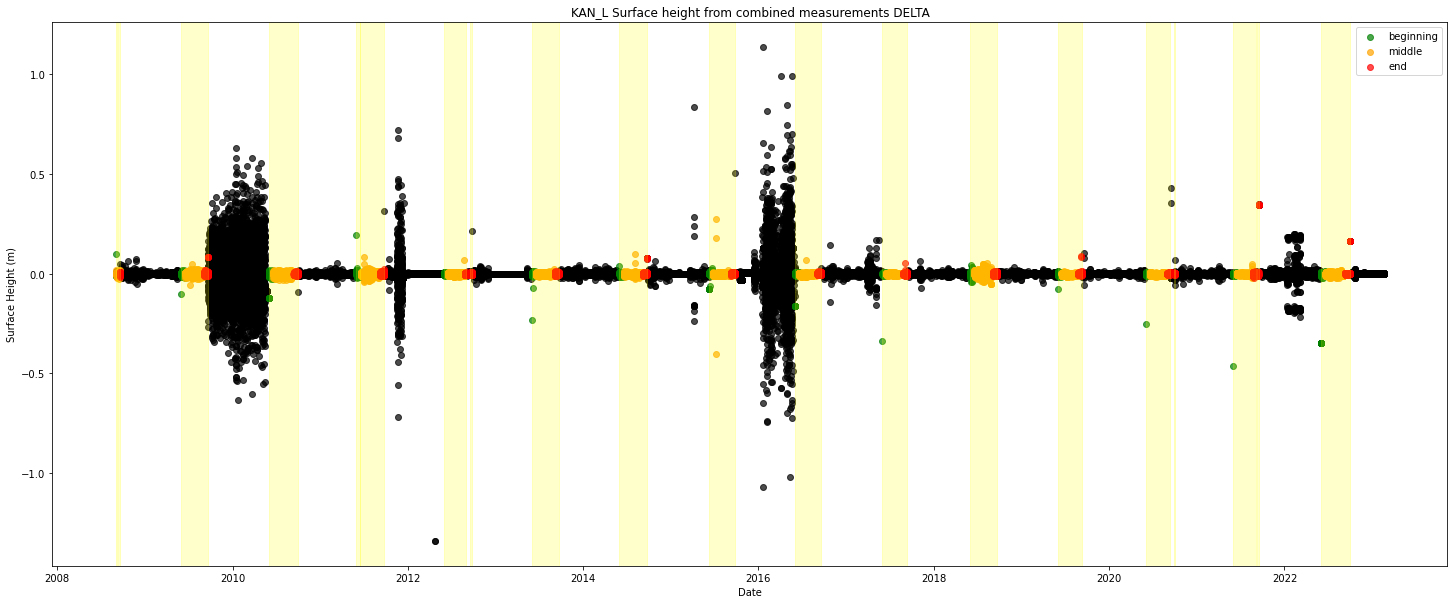

In [30]:
plt_srf_height(Station = "KAN_L", input_df = df, y = df['Surface height from combined measurements DELTA']) 

Zooming in on a specific time period

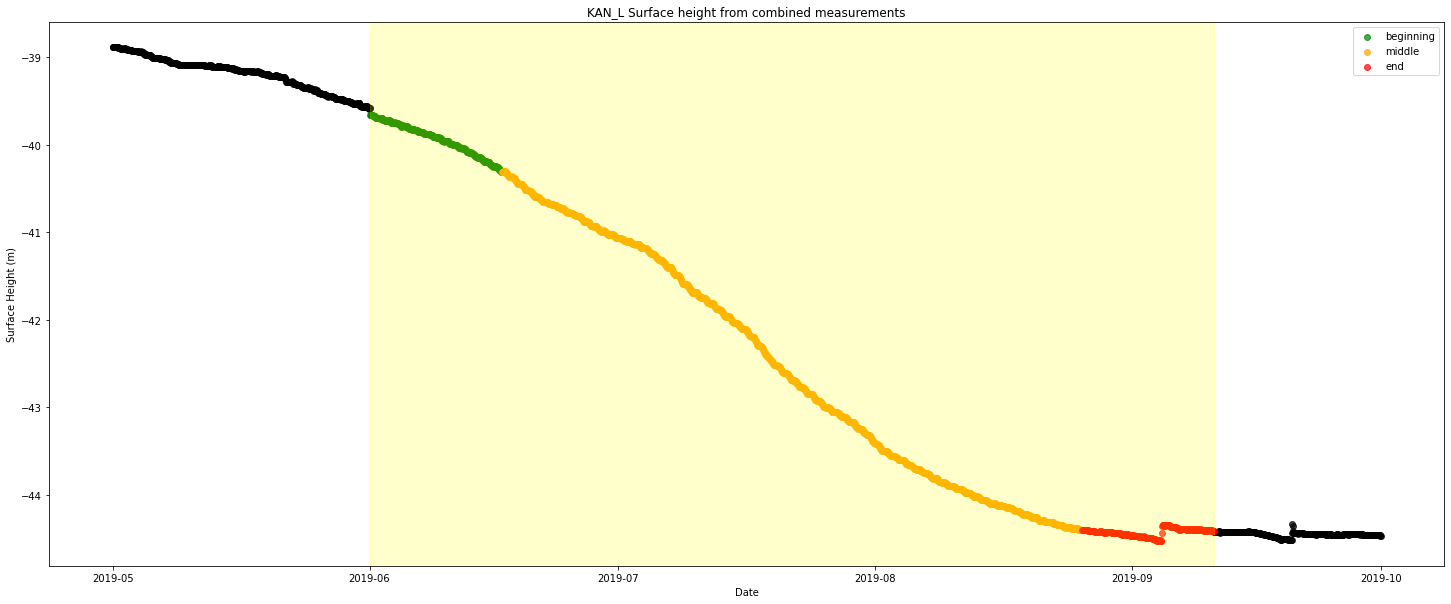

In [33]:
plt_srf_height(Station = "KAN_L", input_df = df, Period = ["2019-05-01", "2019-10-01"])

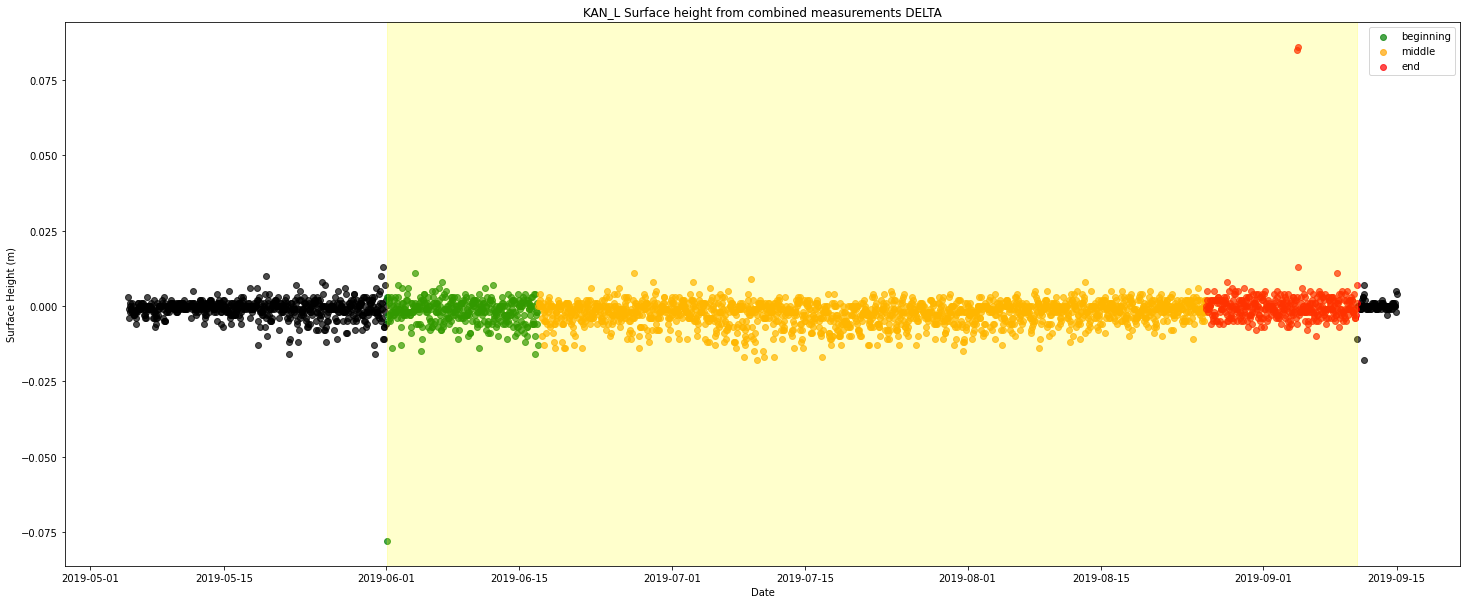

In [35]:
plt_srf_height(Station = "KAN_L", Period = ["2019-05-05", "2019-09-15"], y = df['Surface height from combined measurements DELTA'])

## Plot All: Hourly

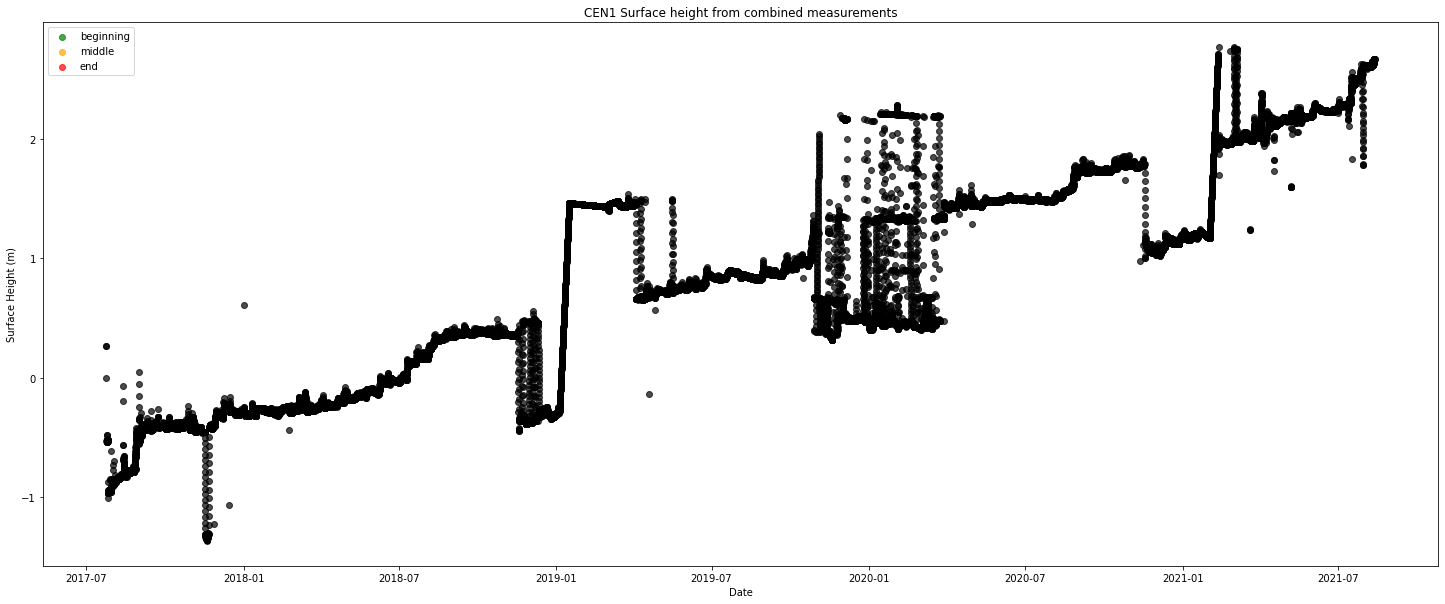

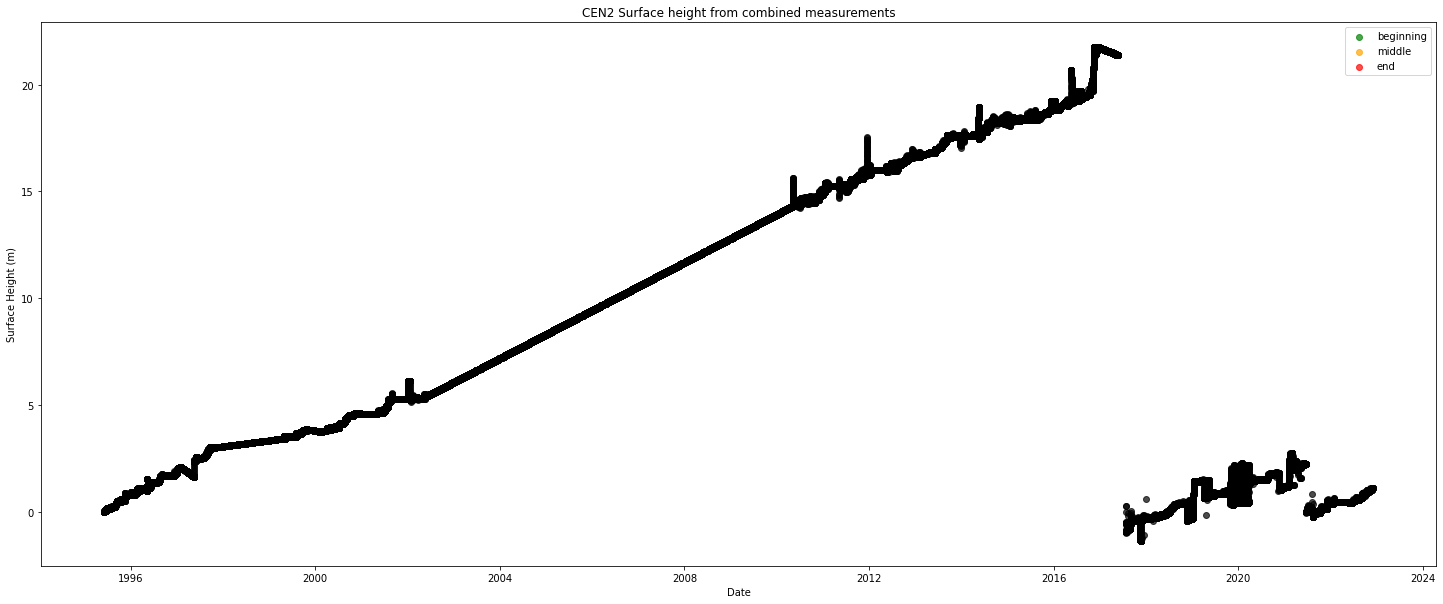

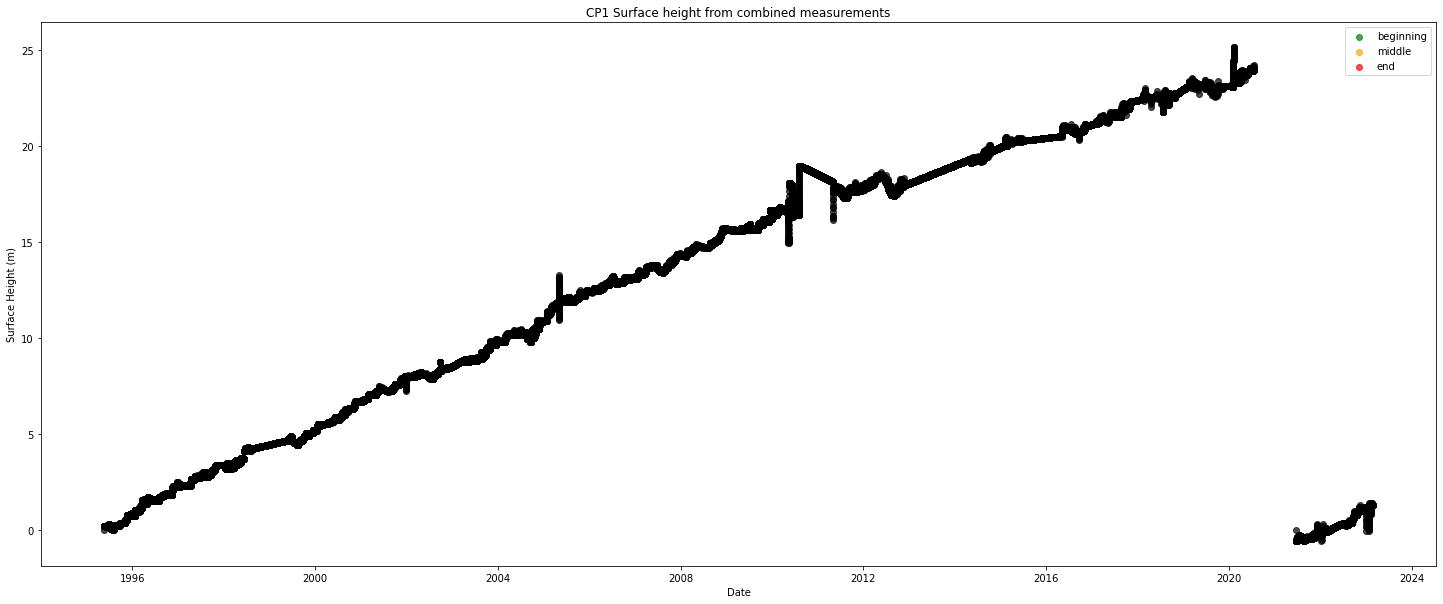

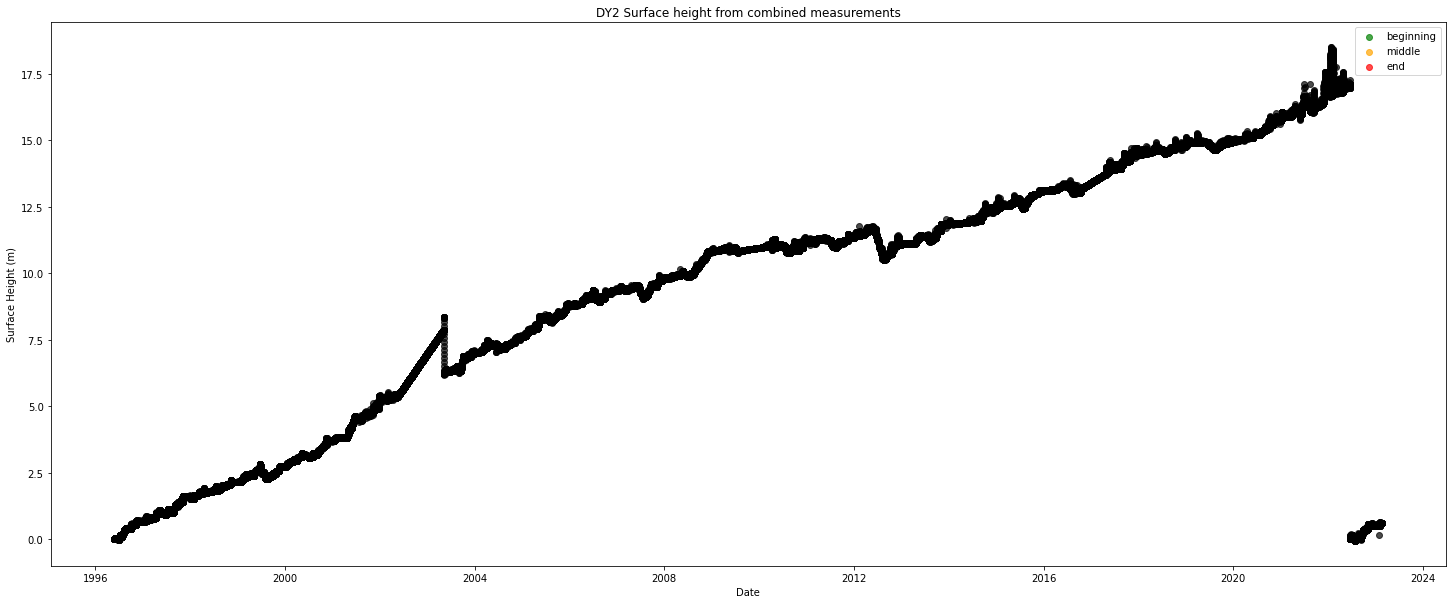

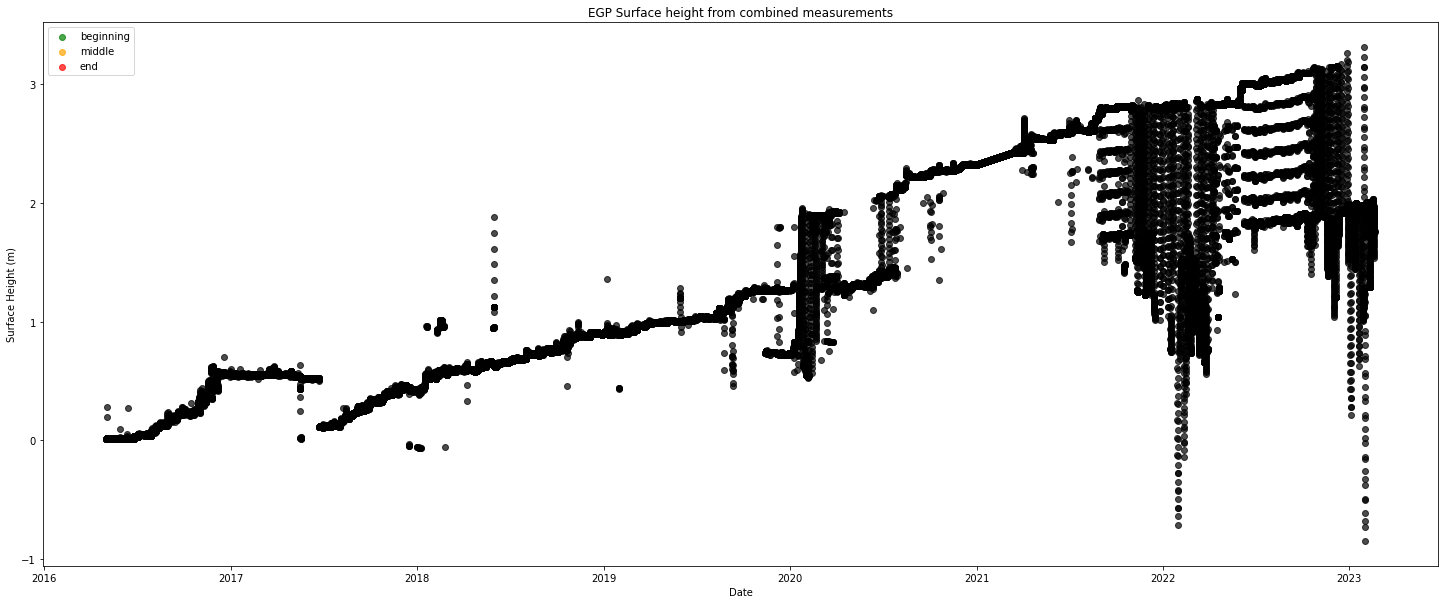

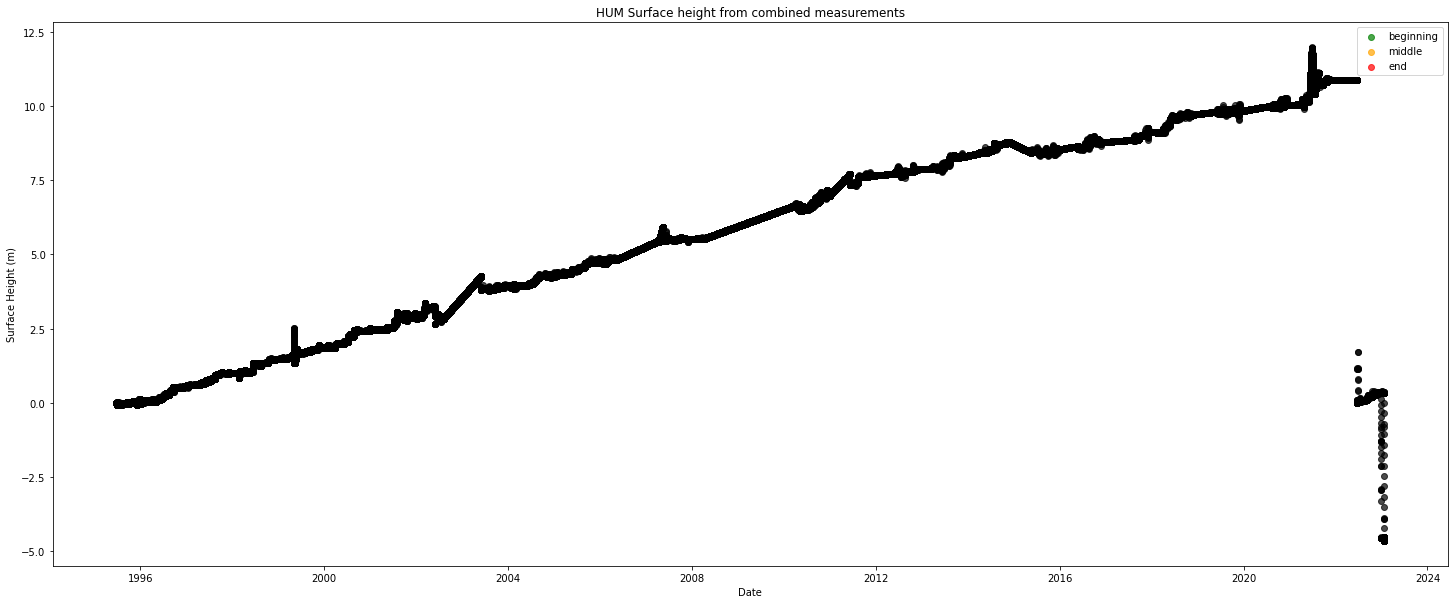

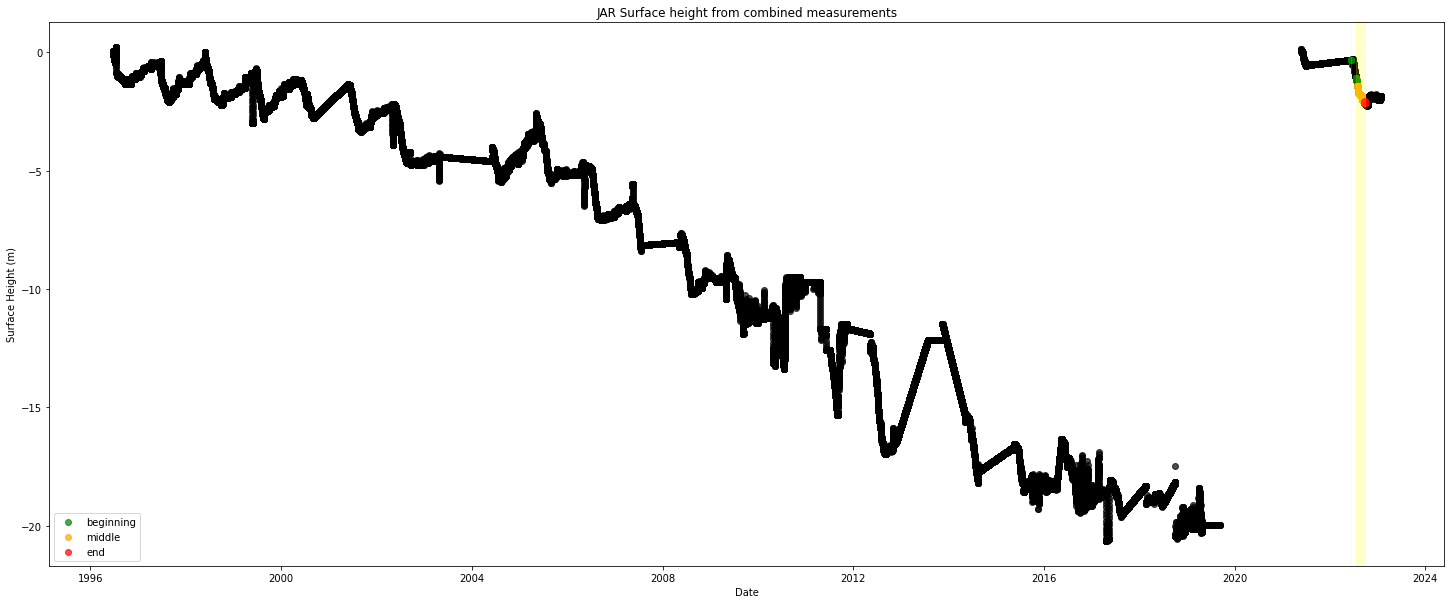

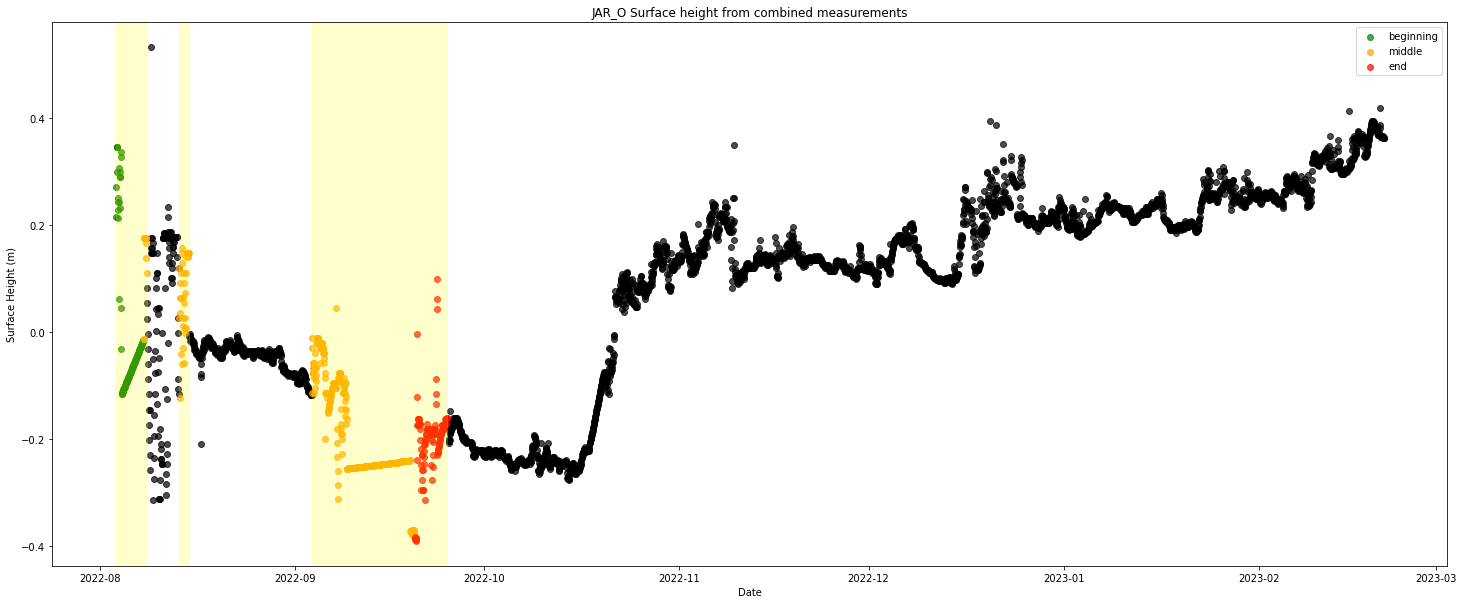

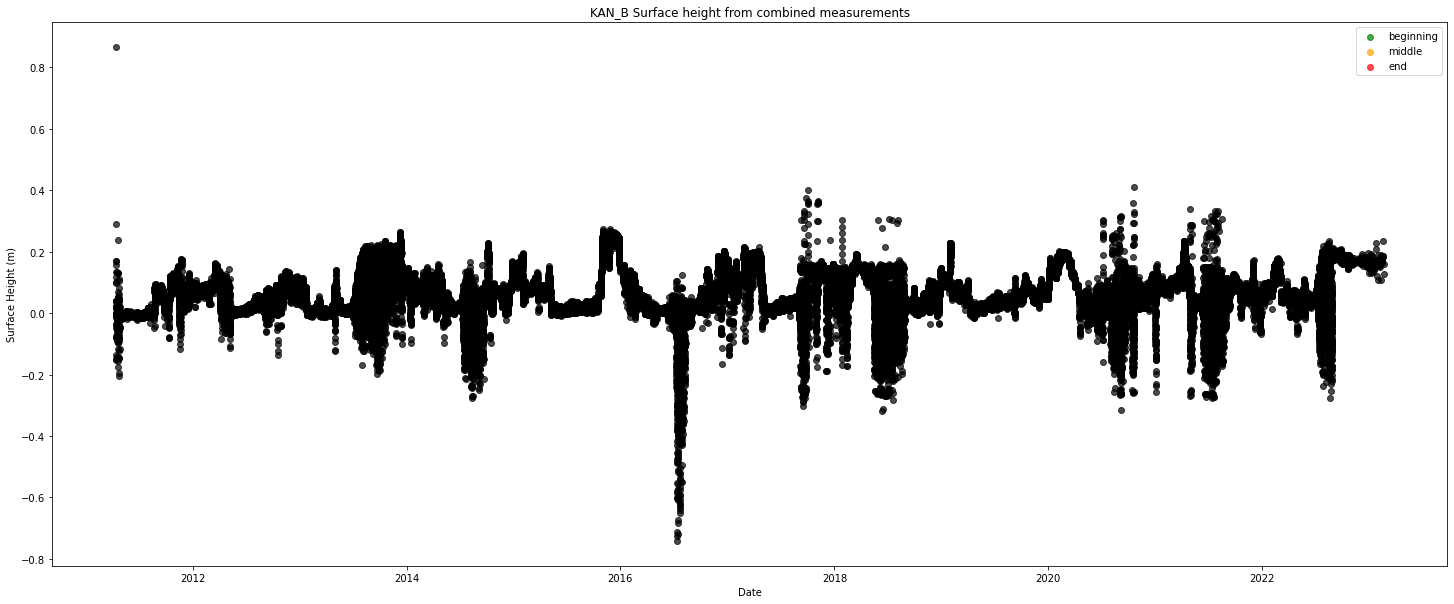

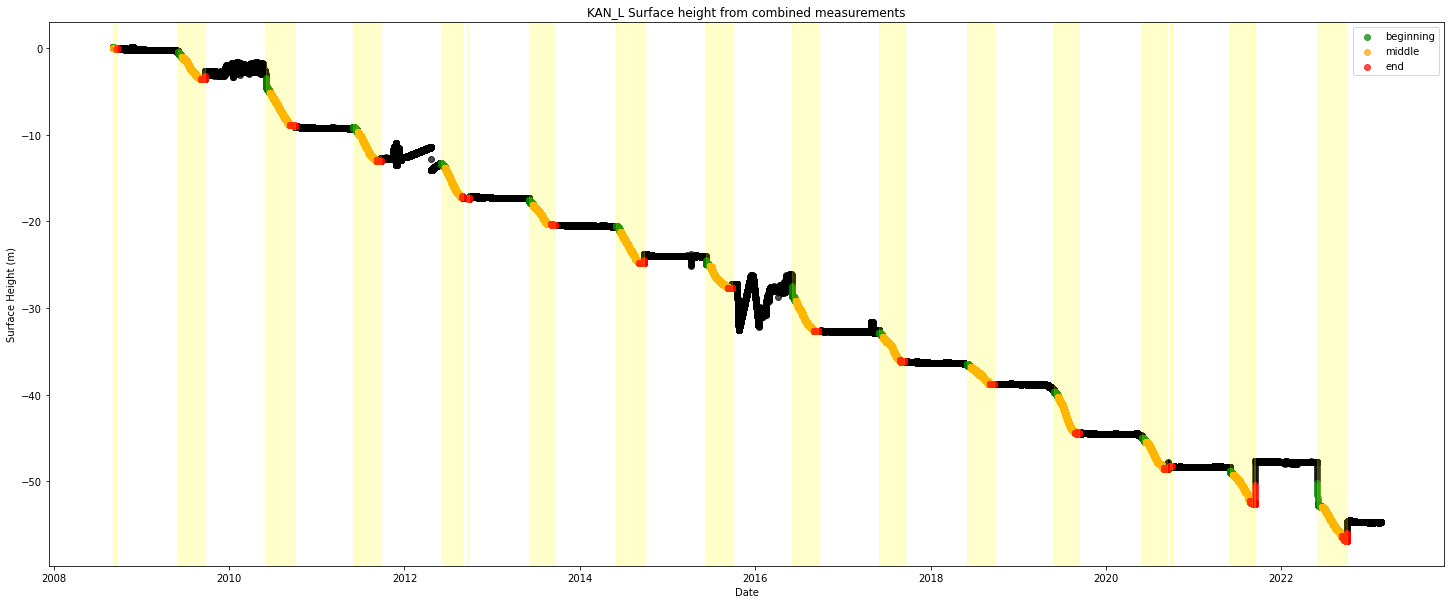

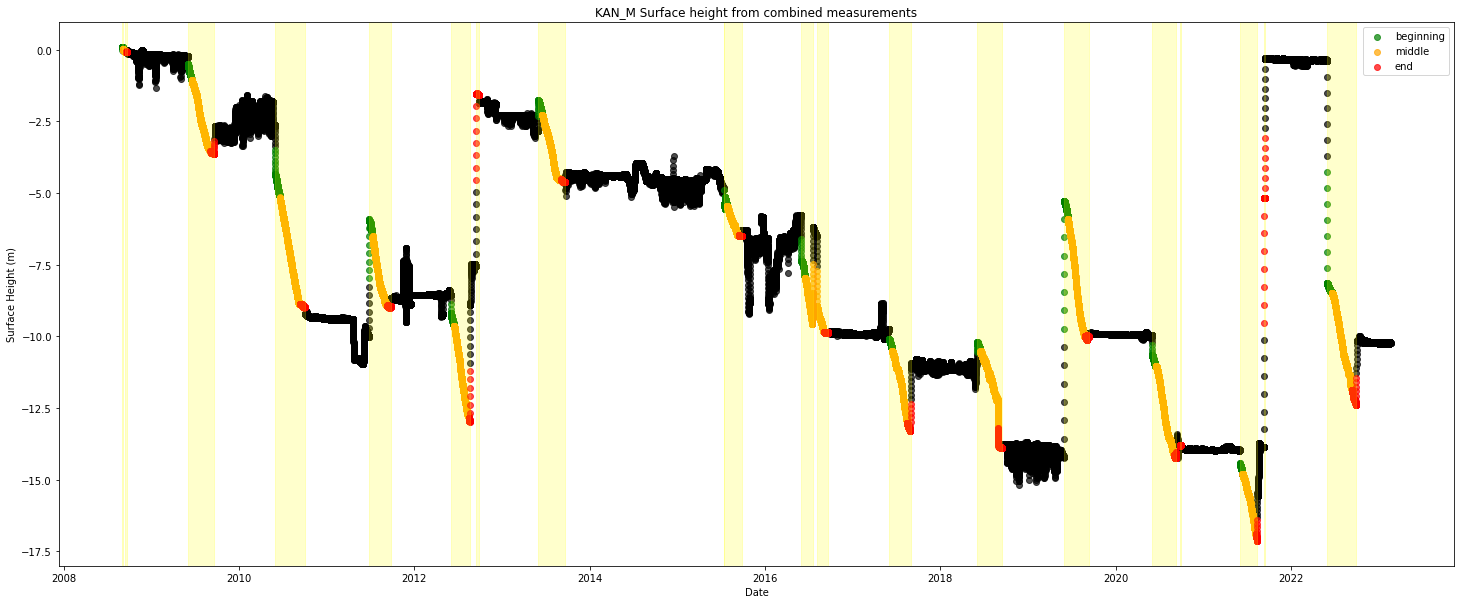

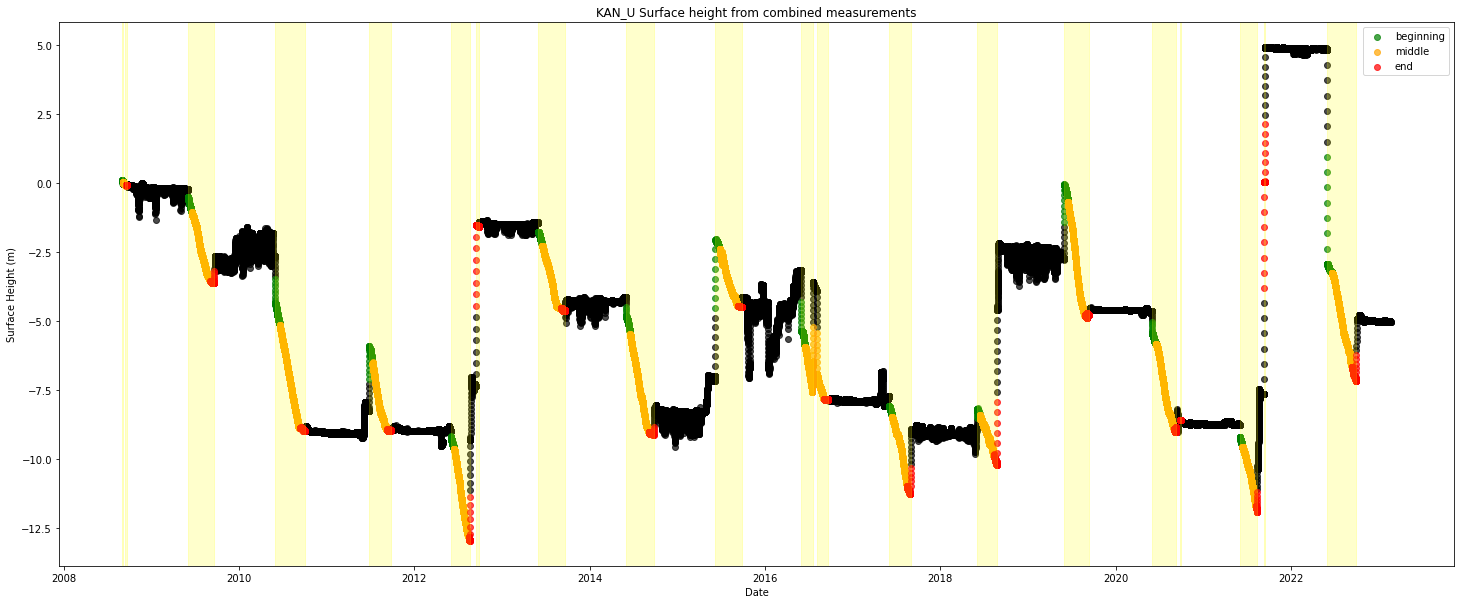

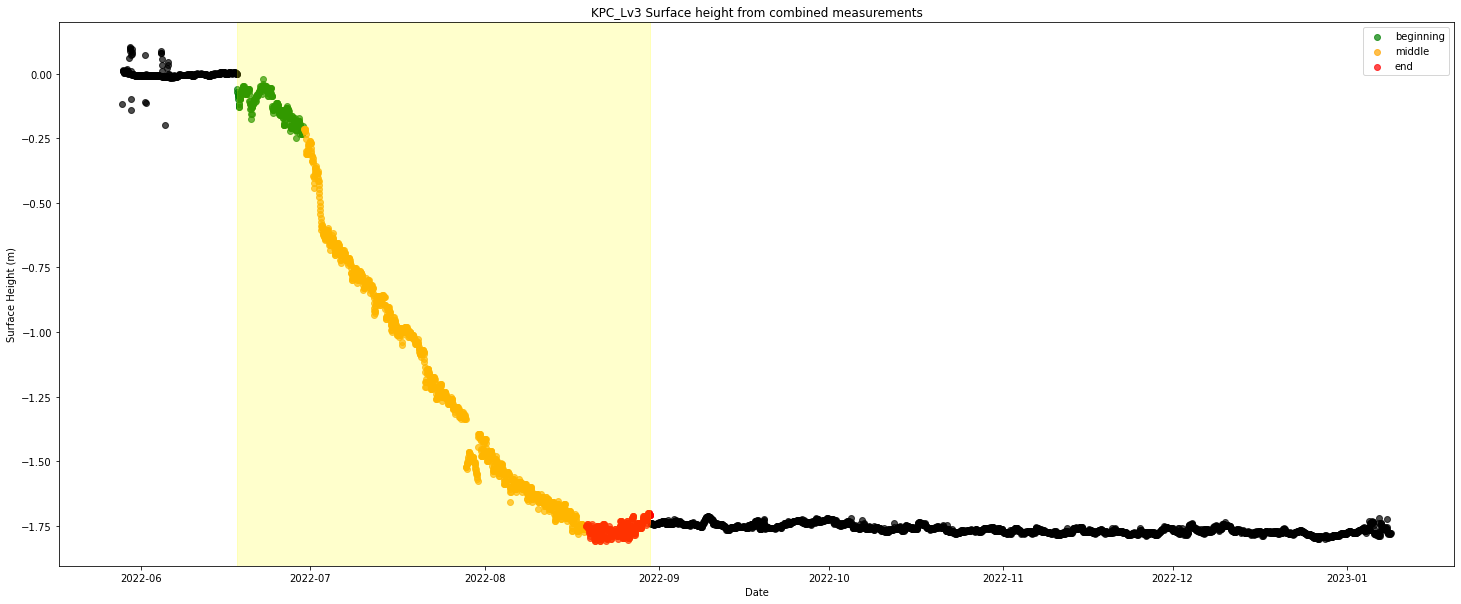

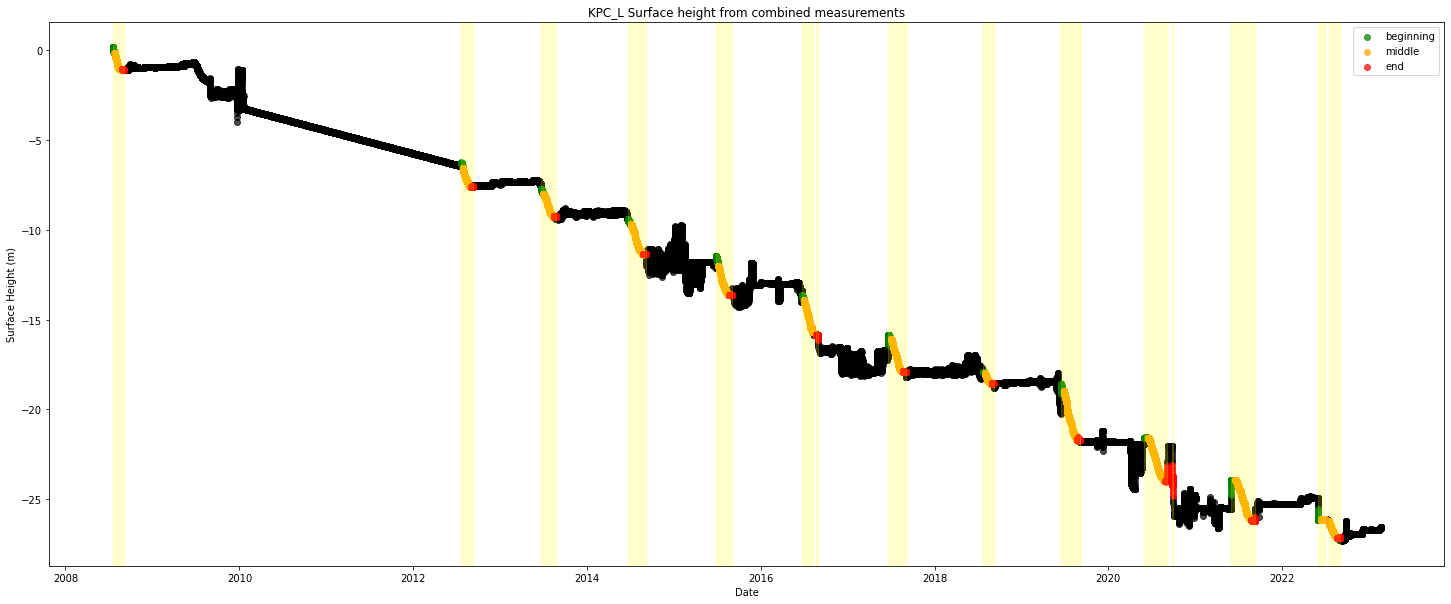

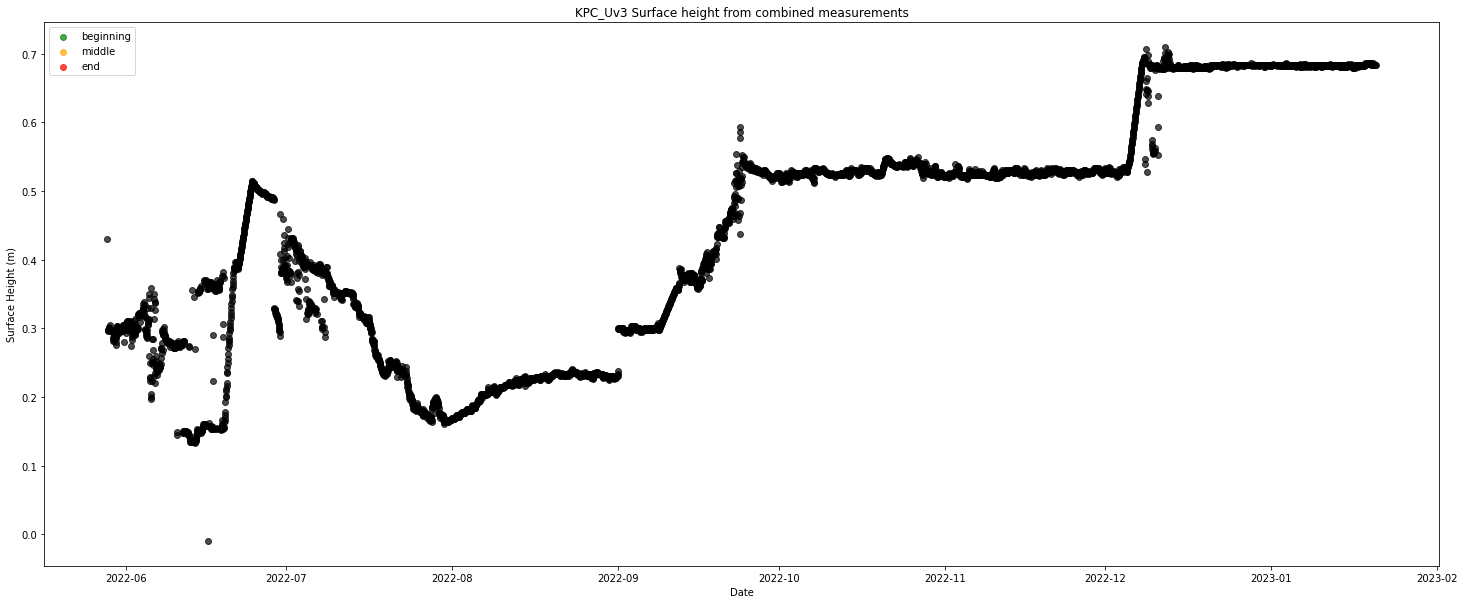

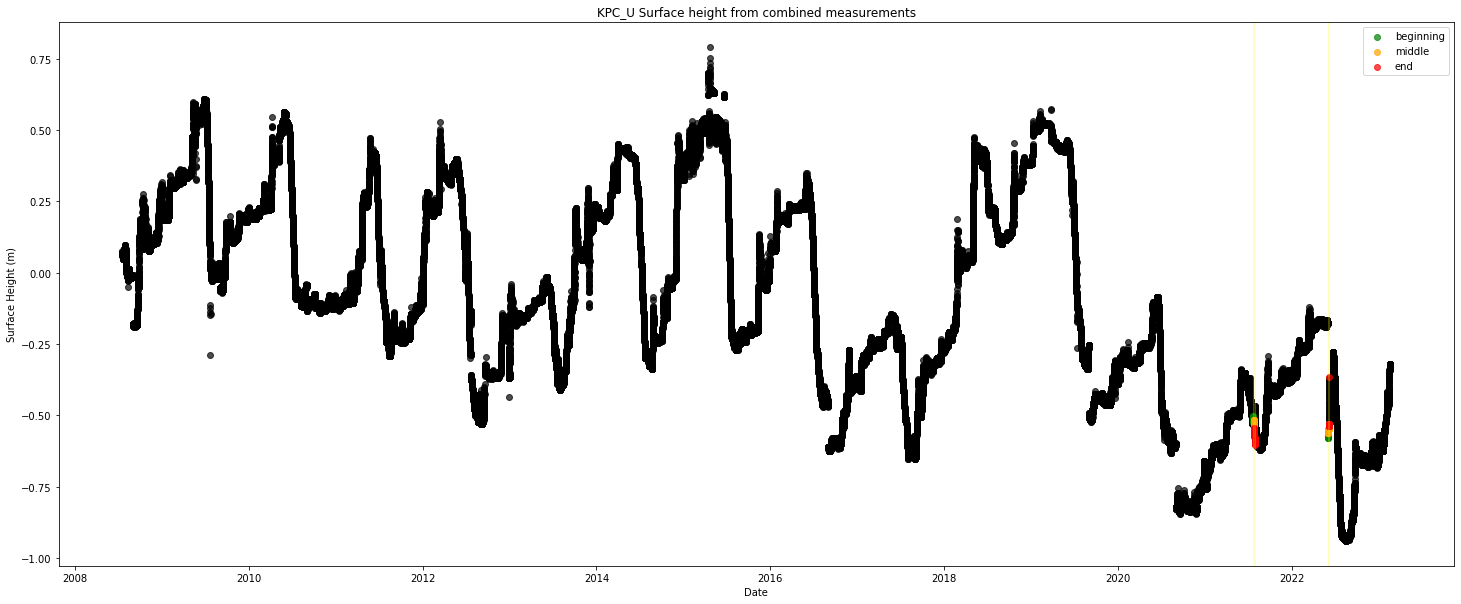

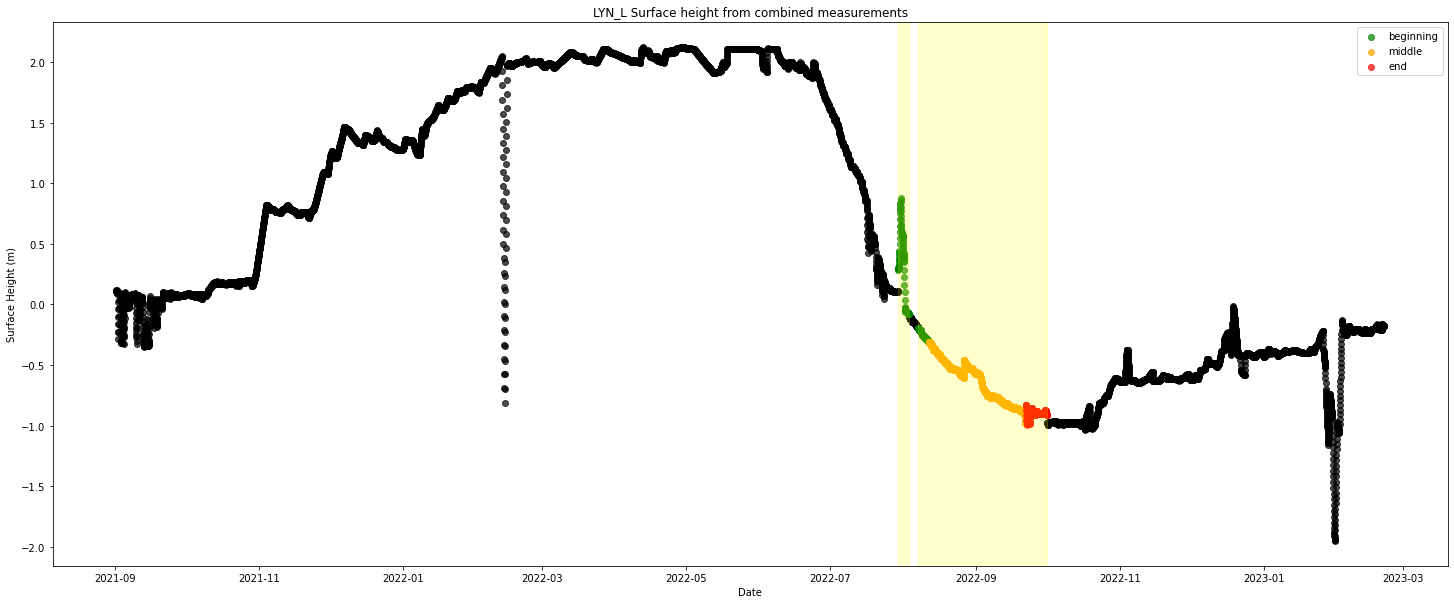

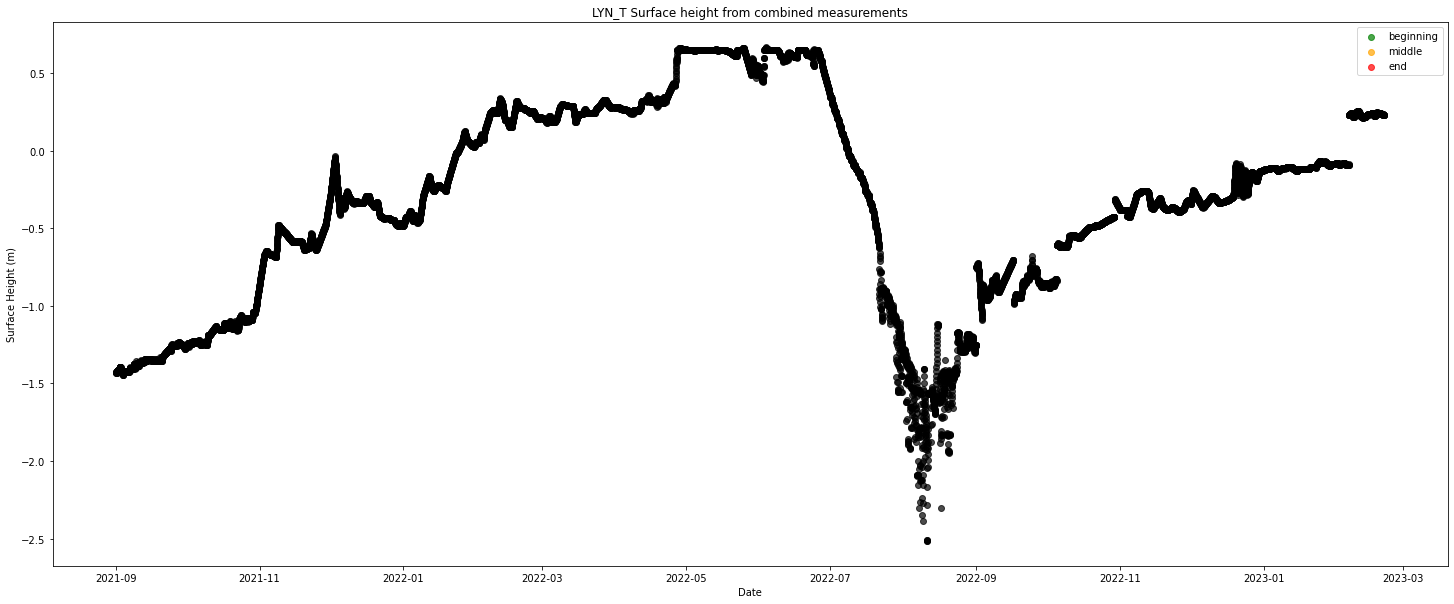

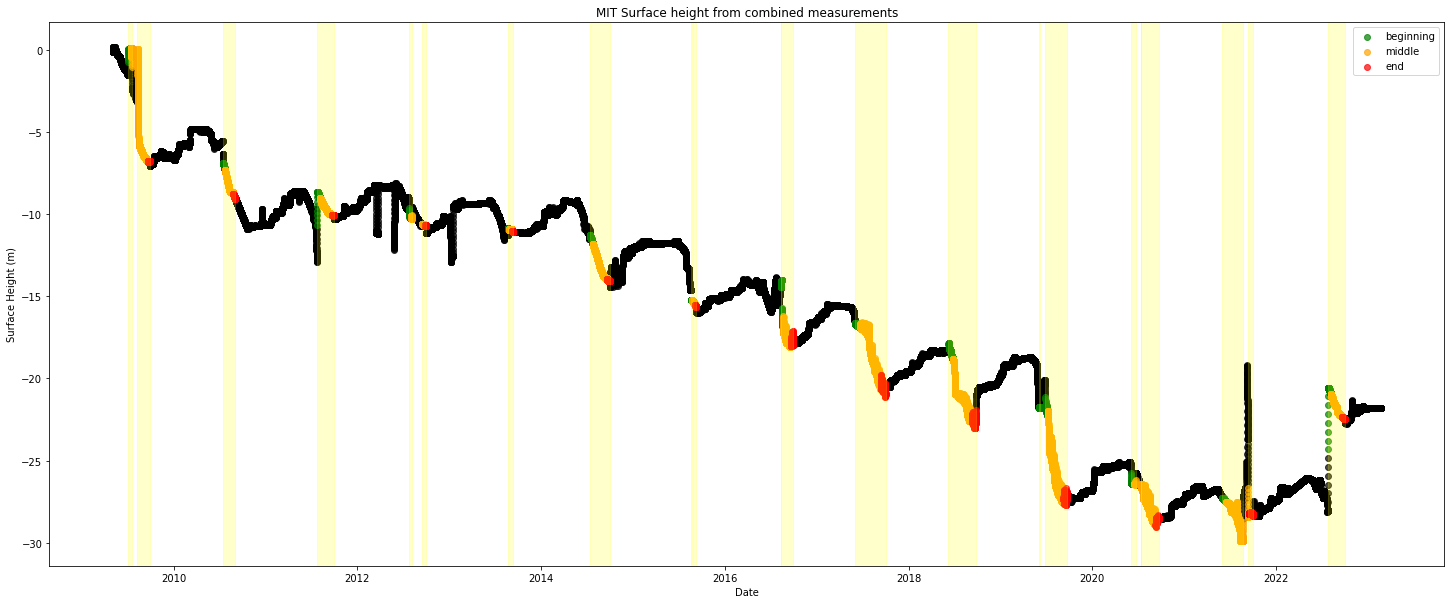

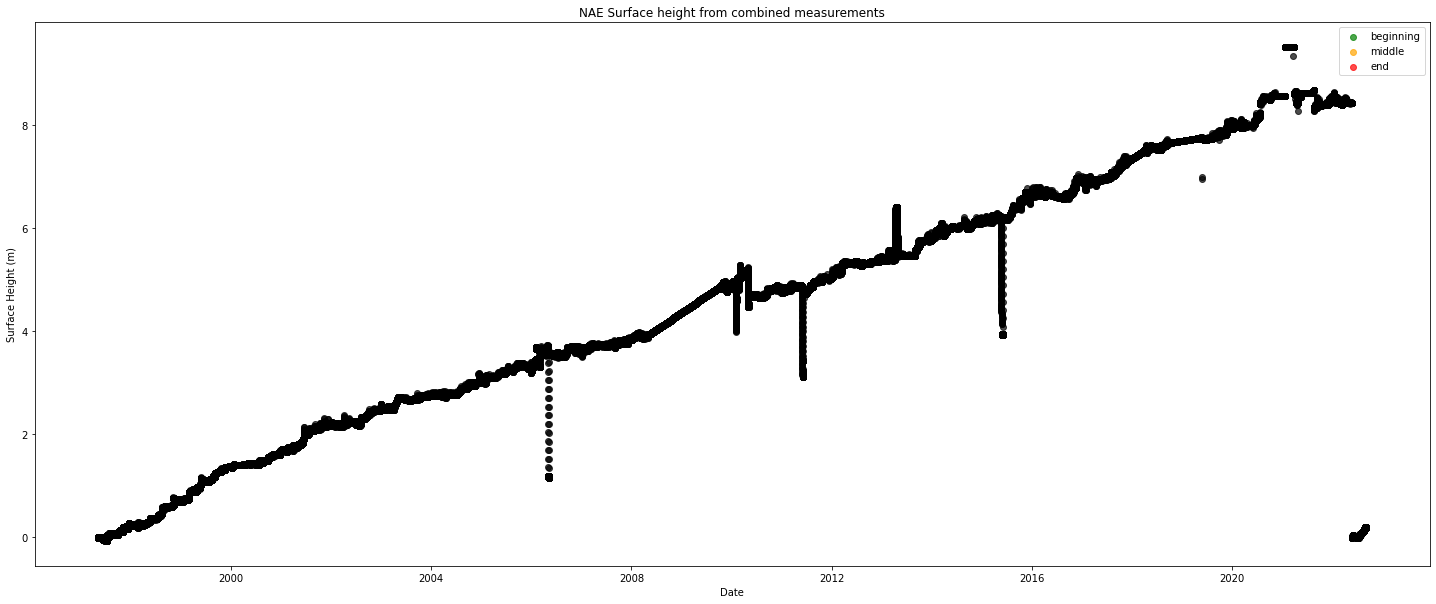

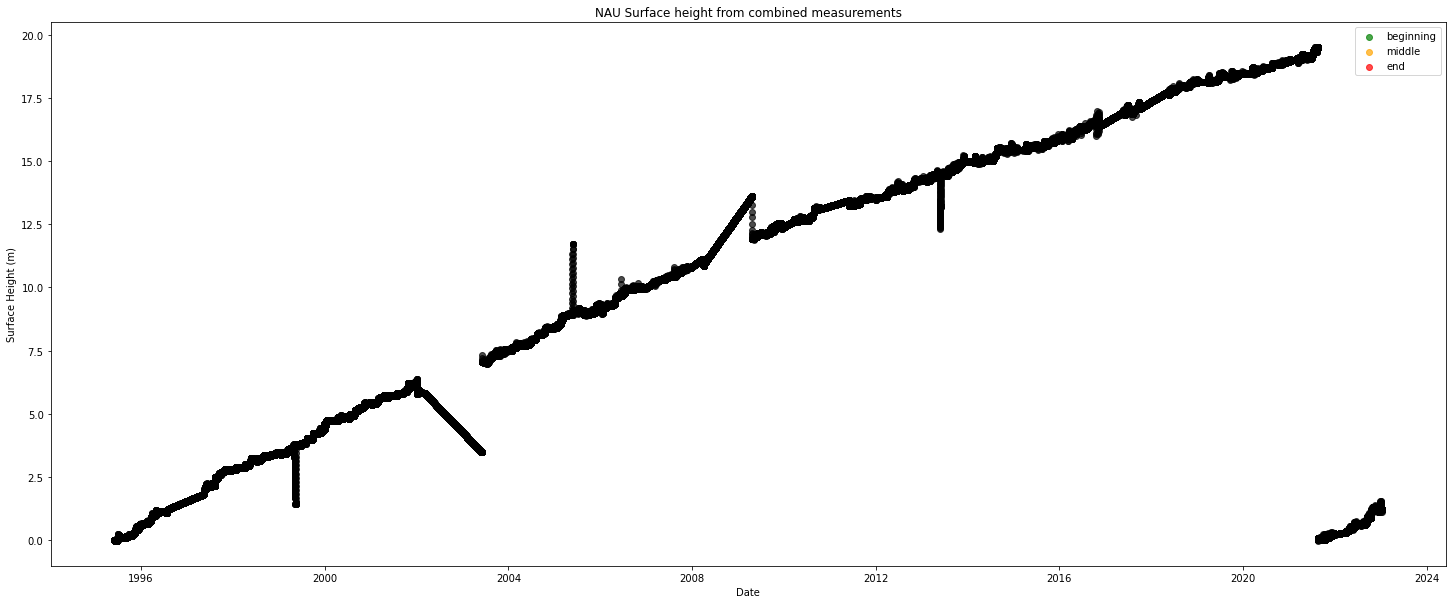

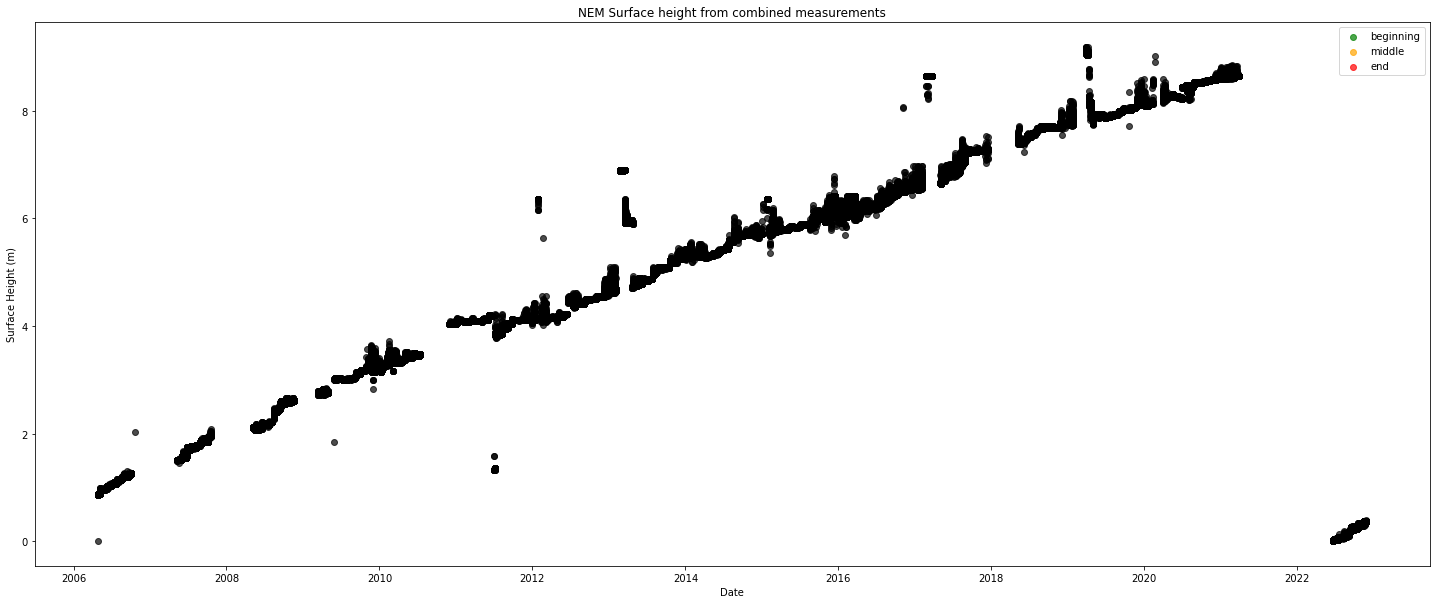

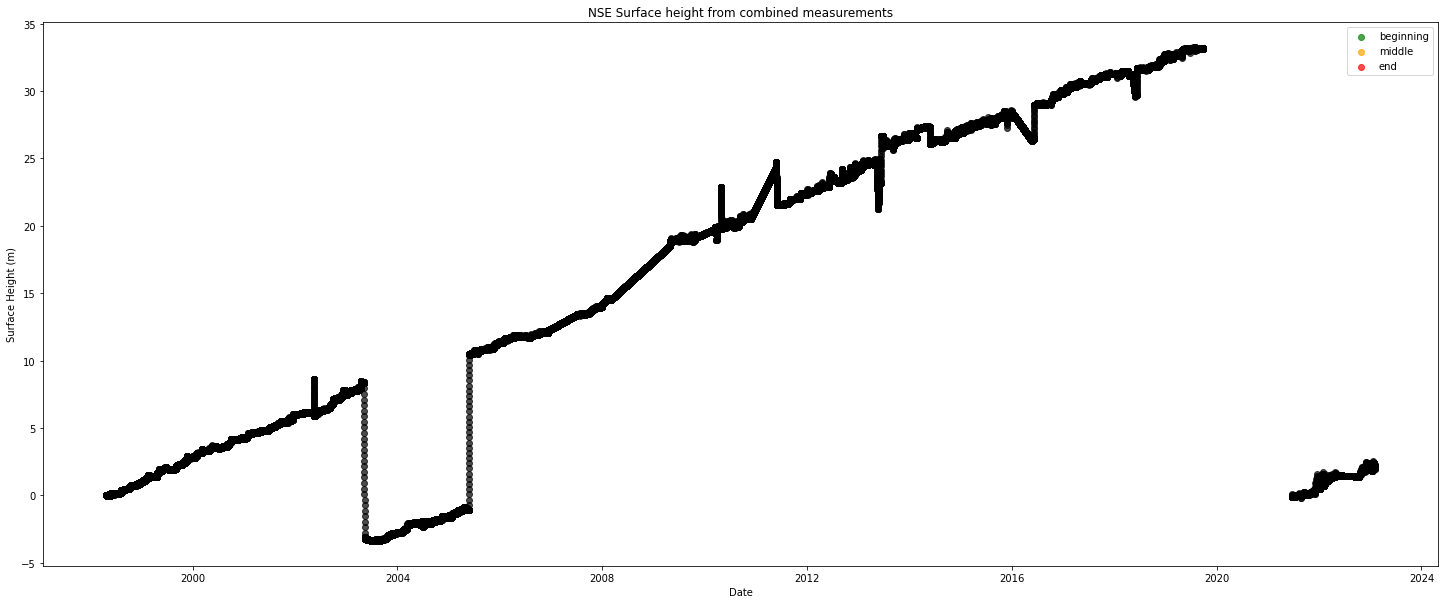

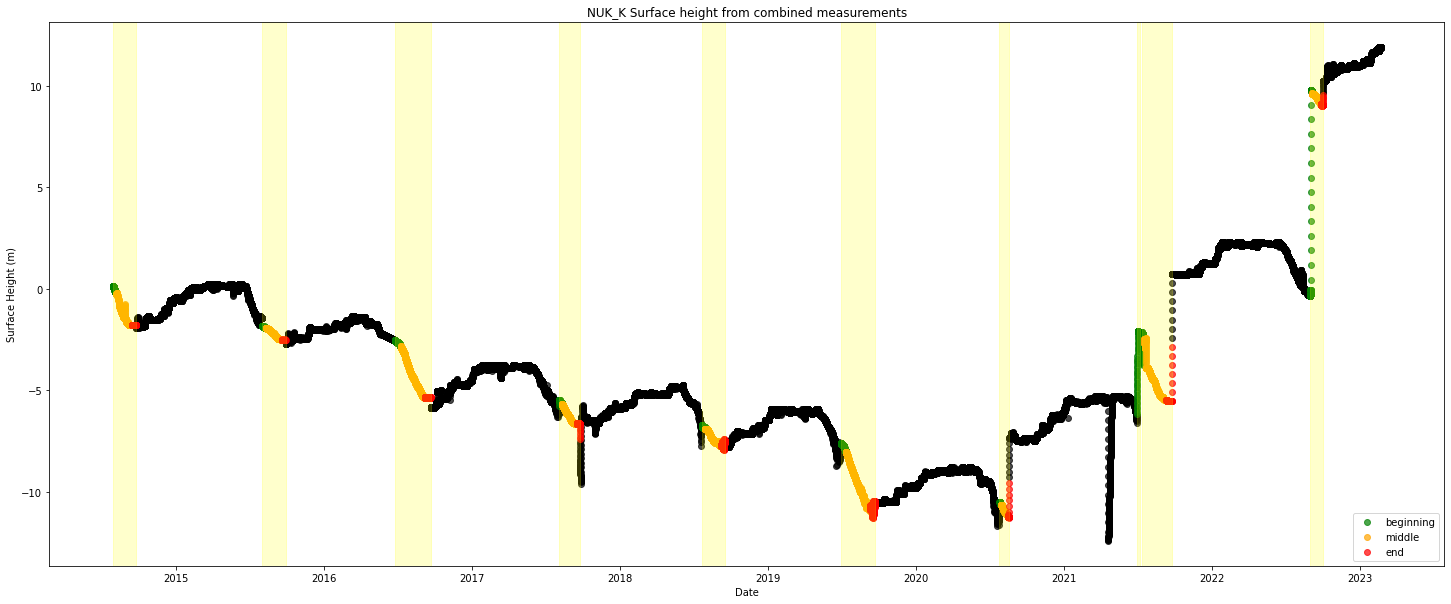

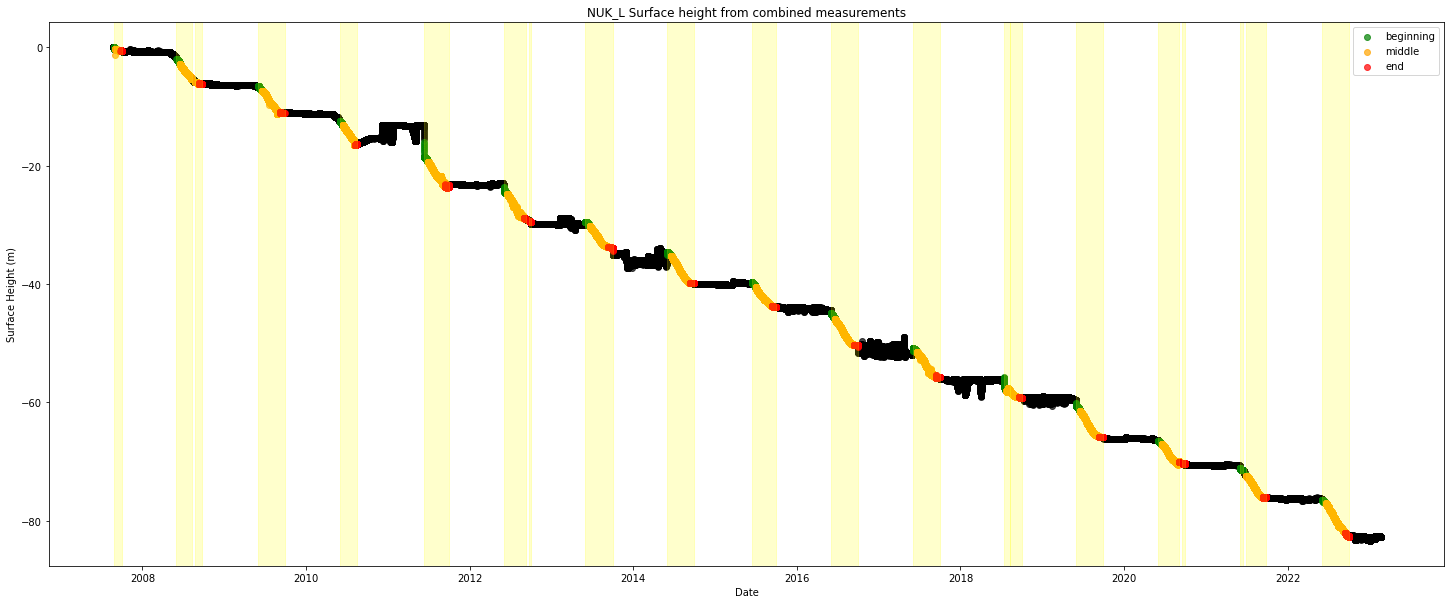

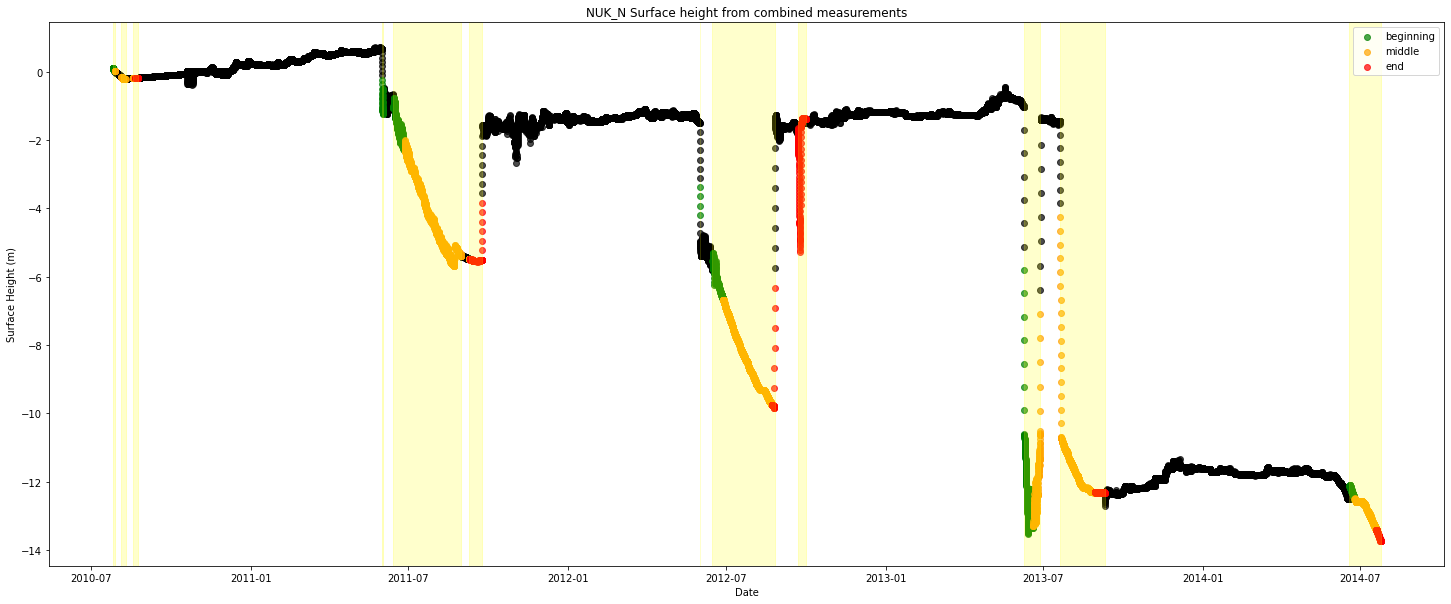

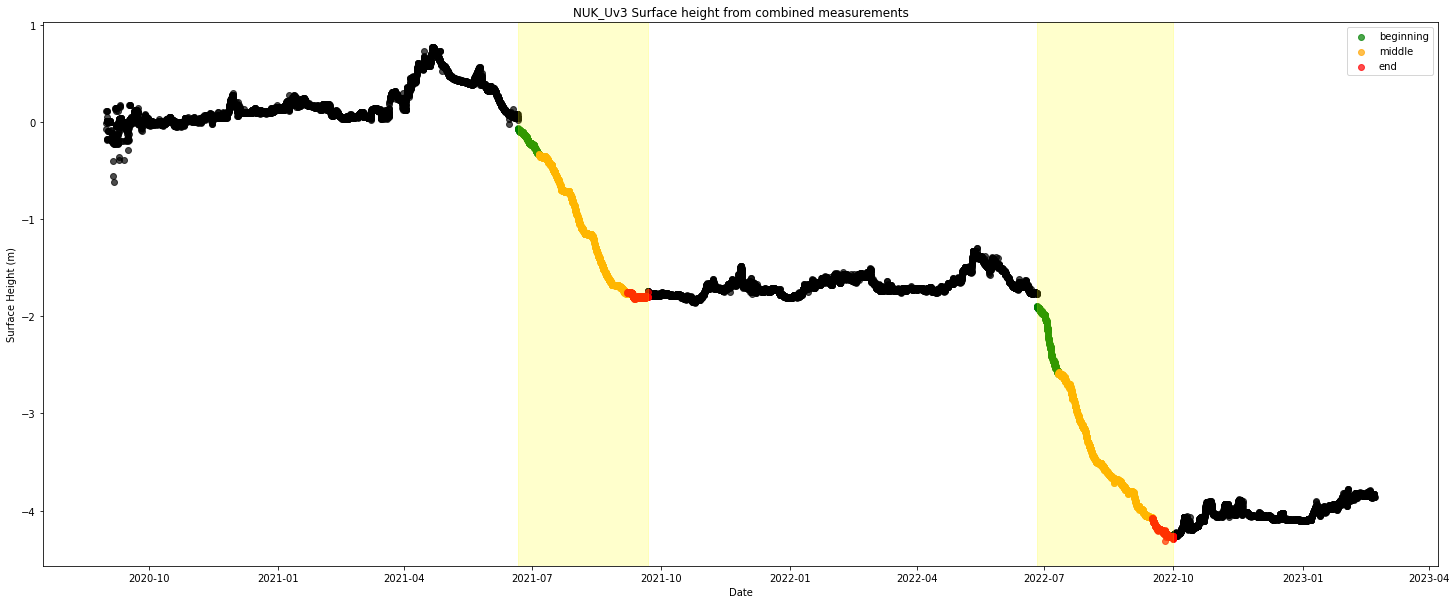

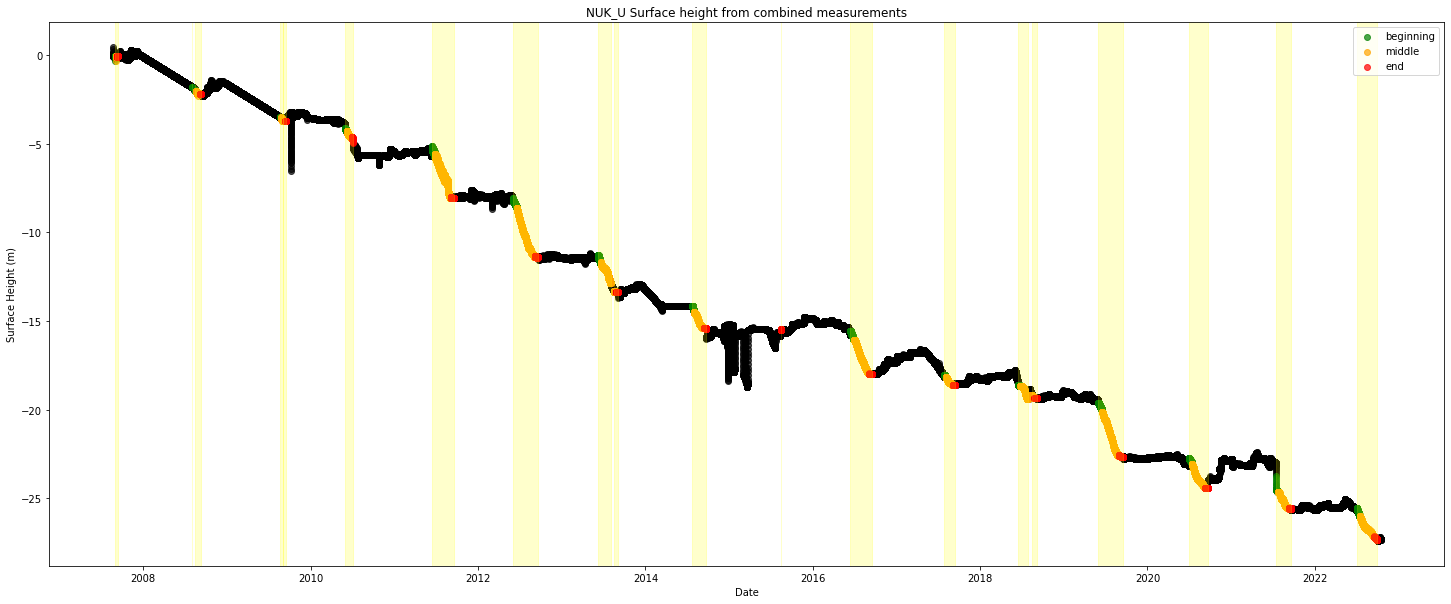

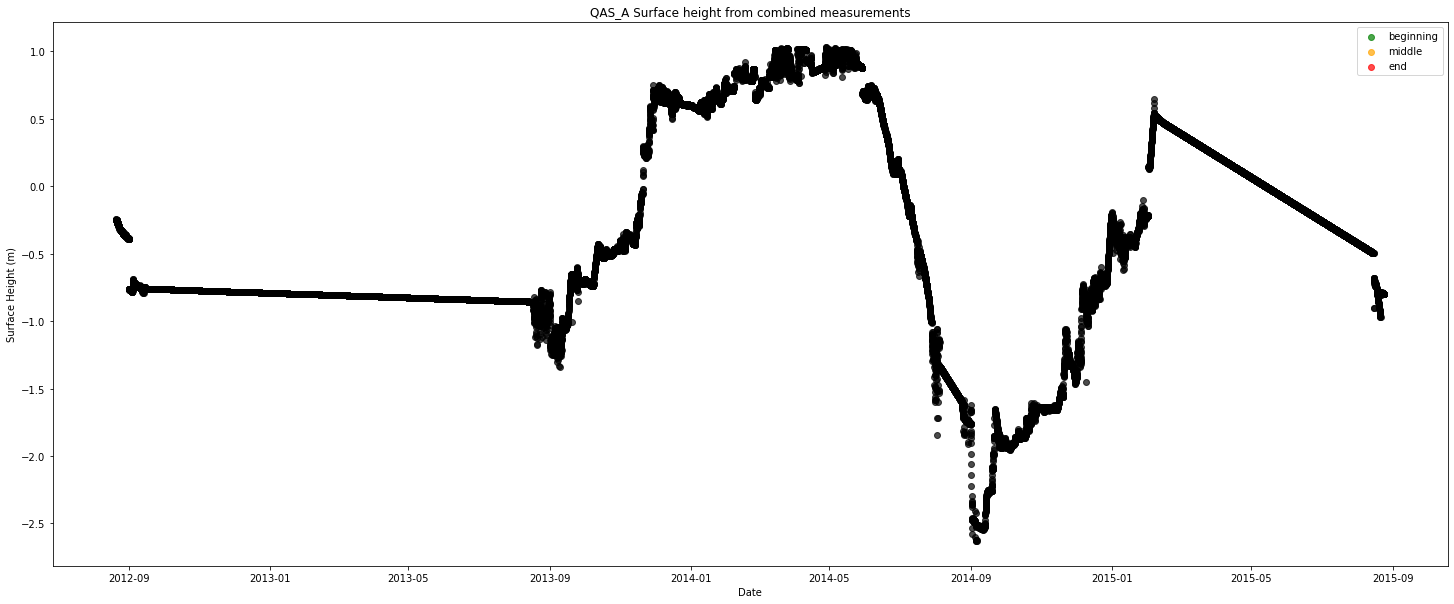

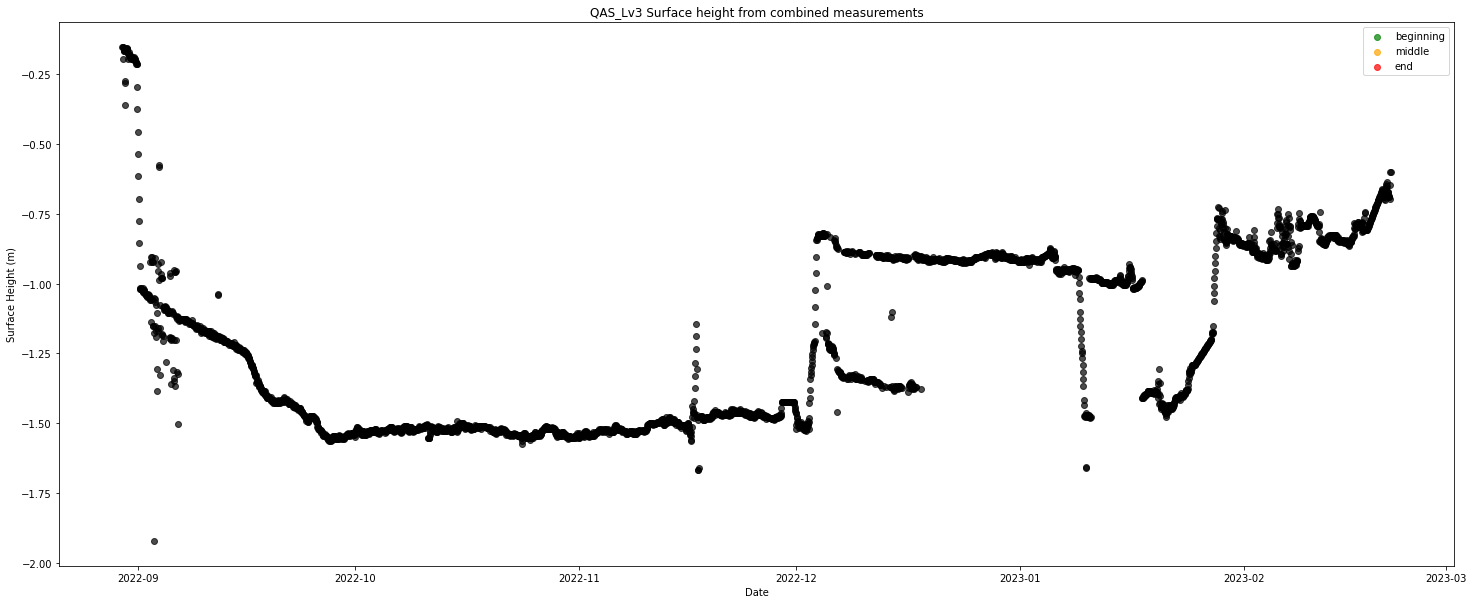

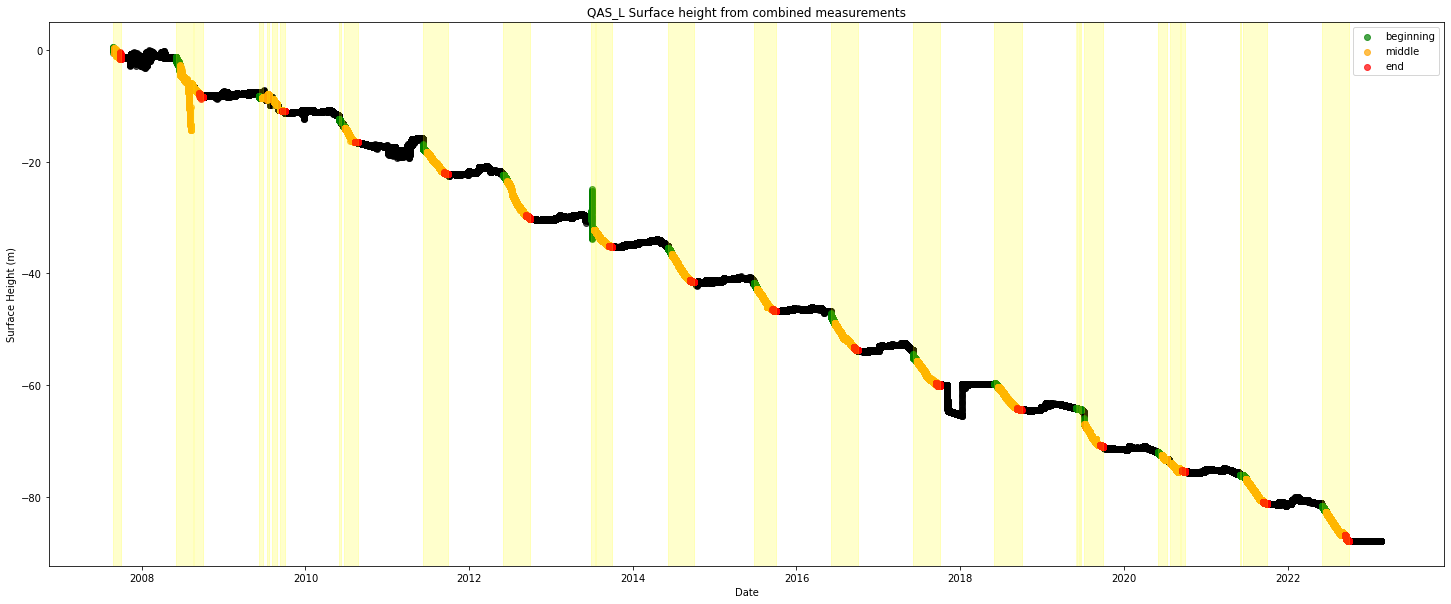

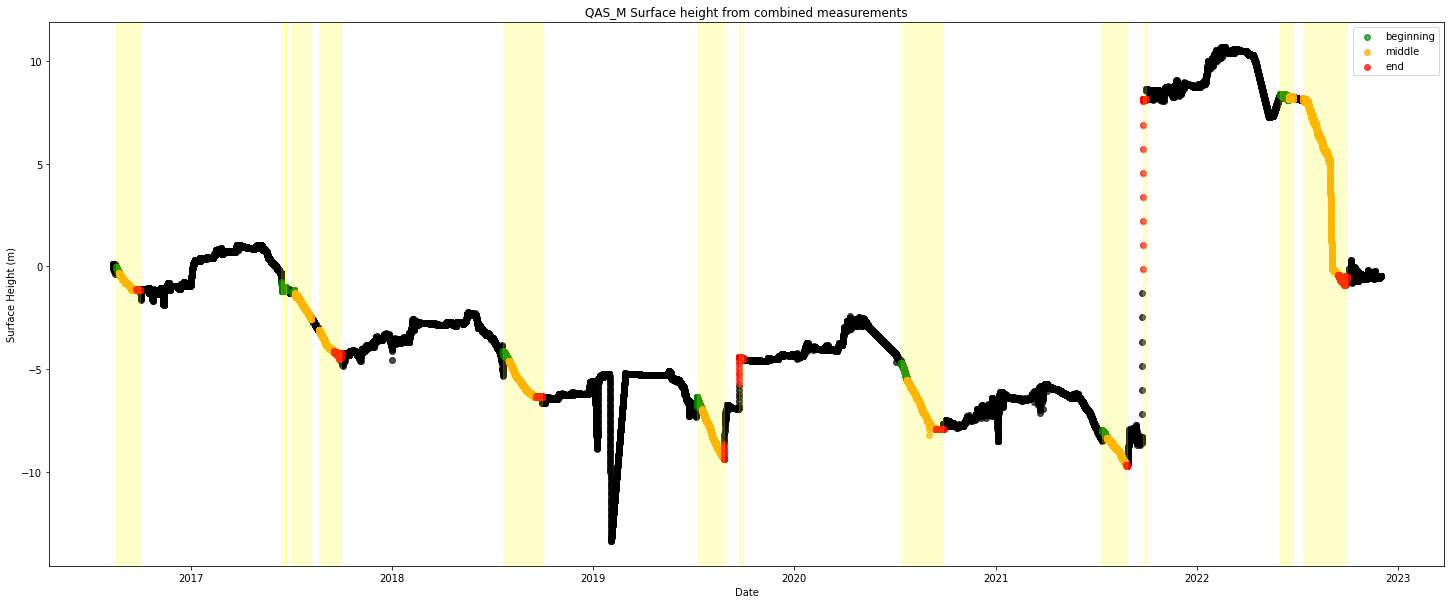

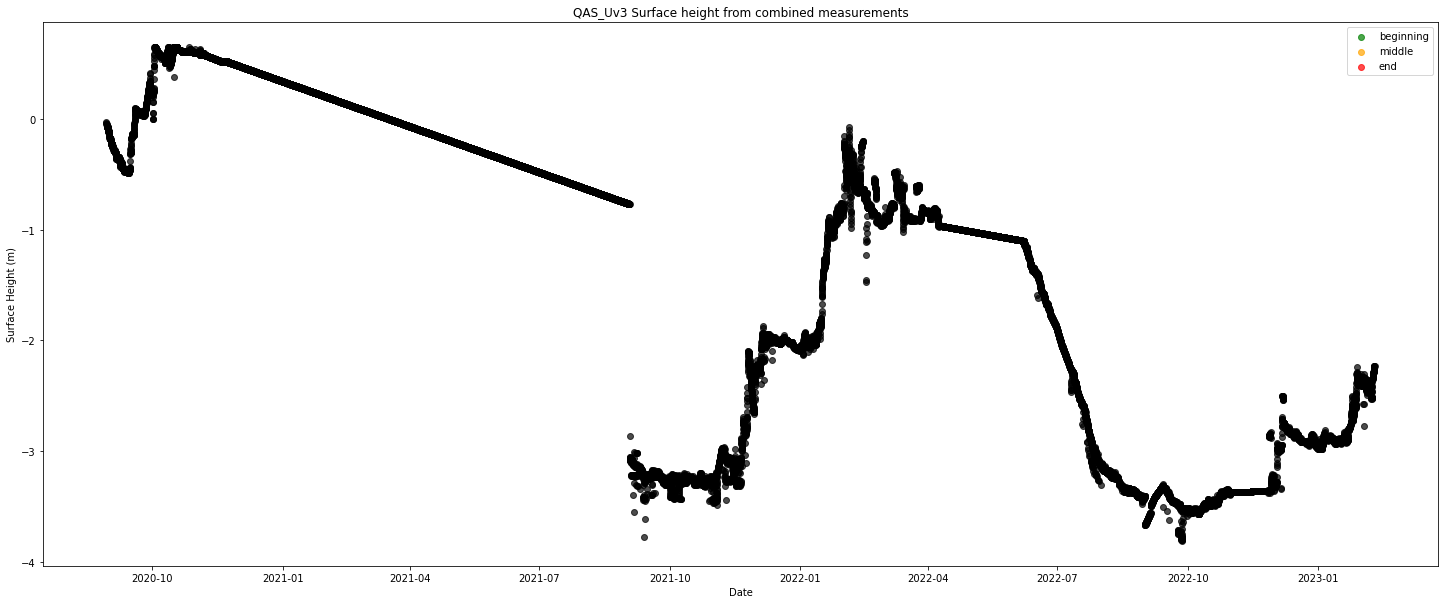

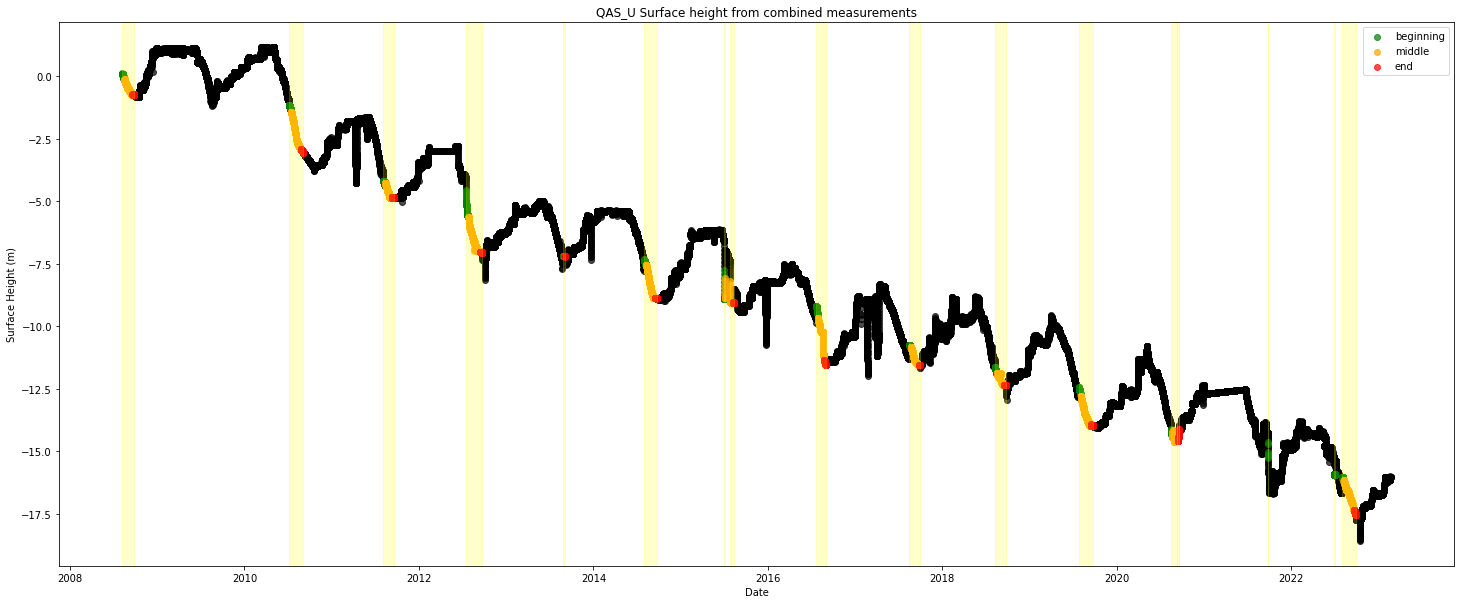

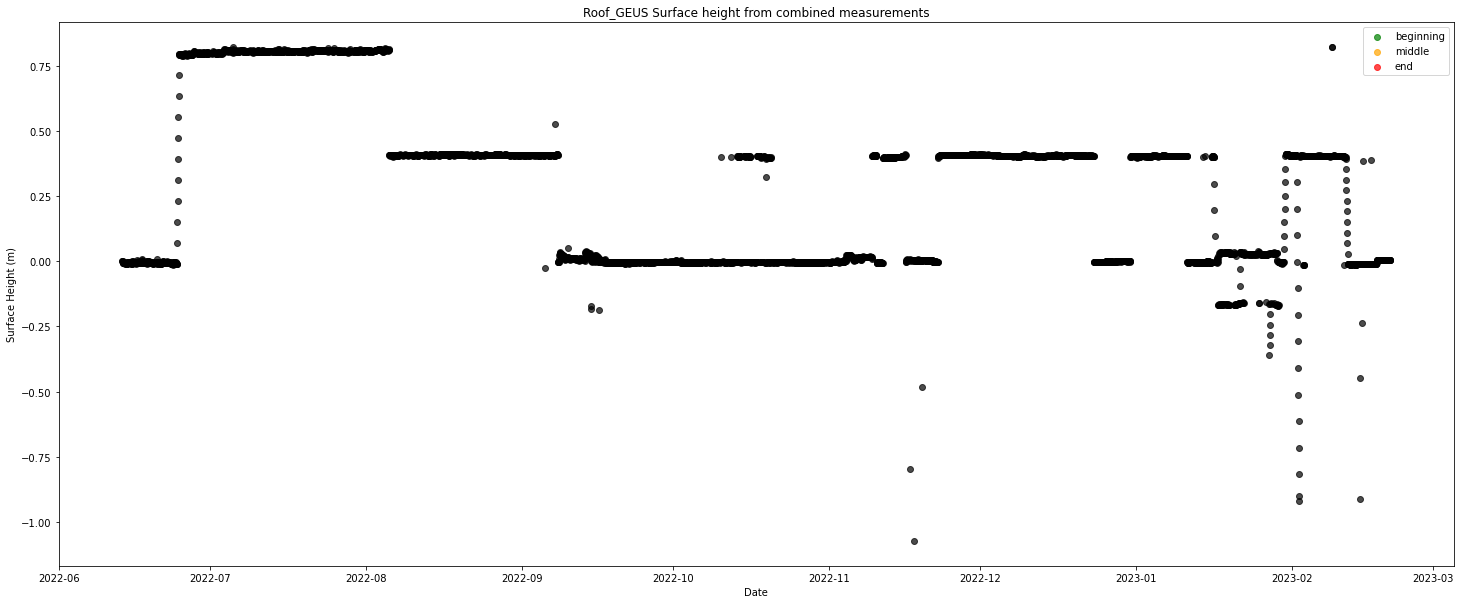

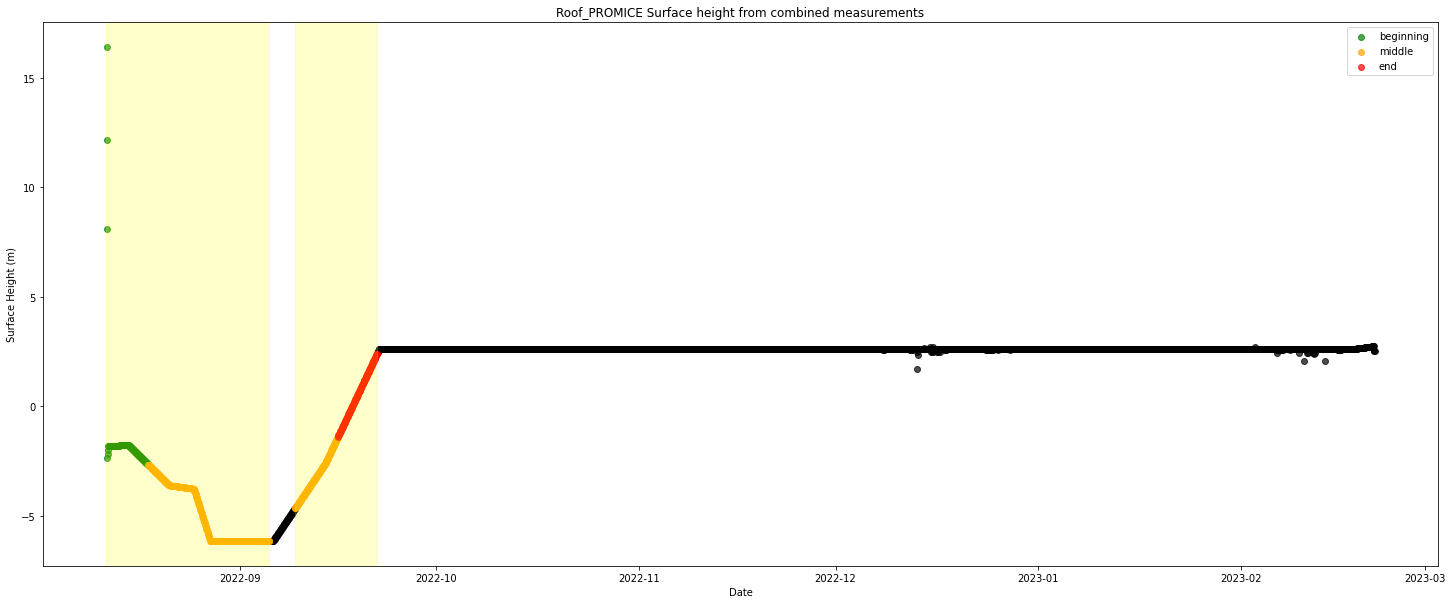

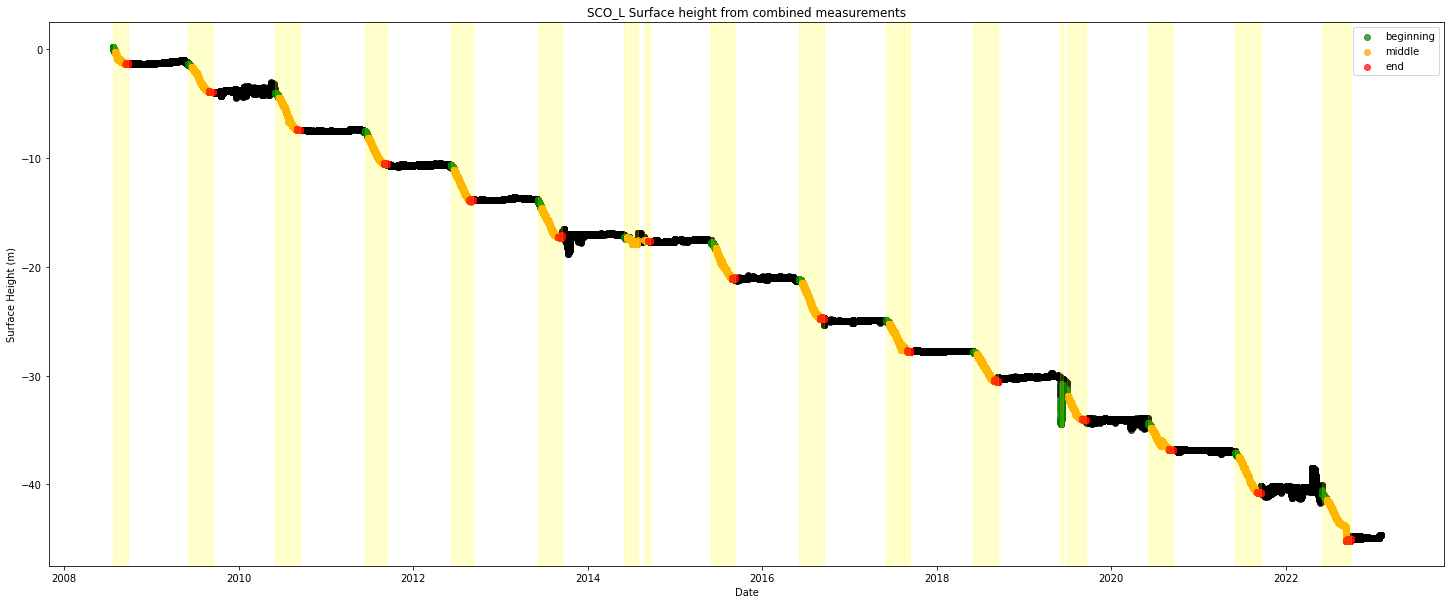

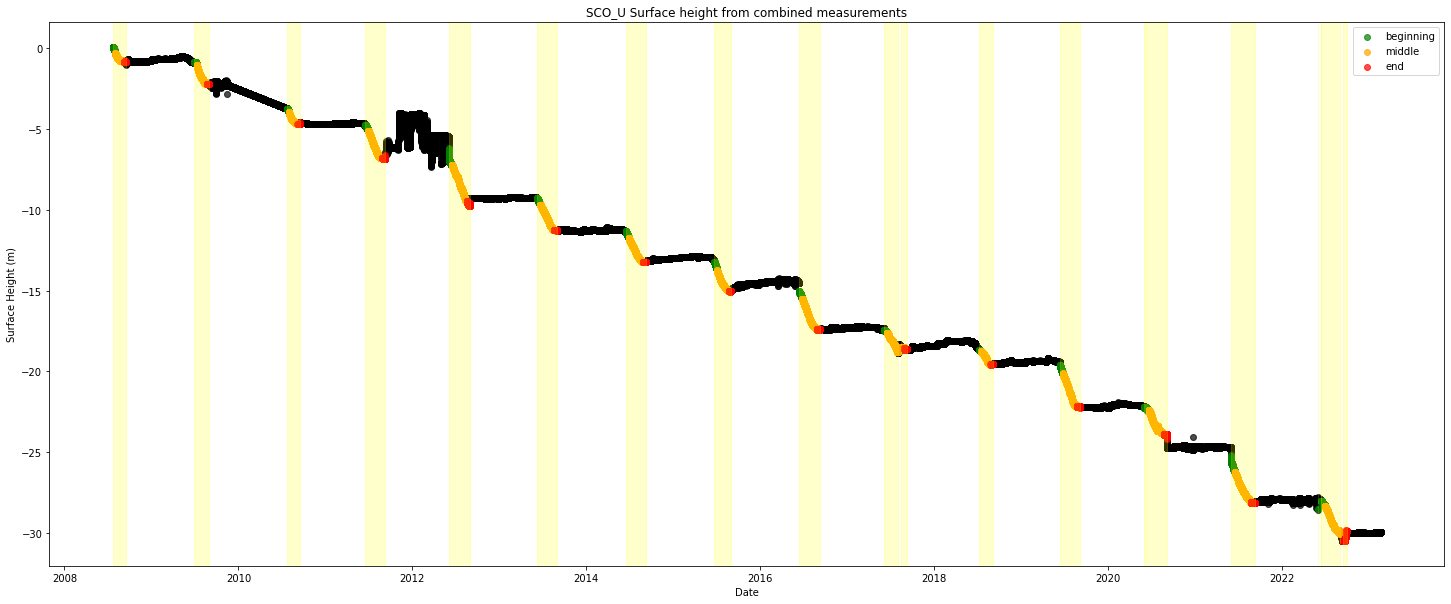

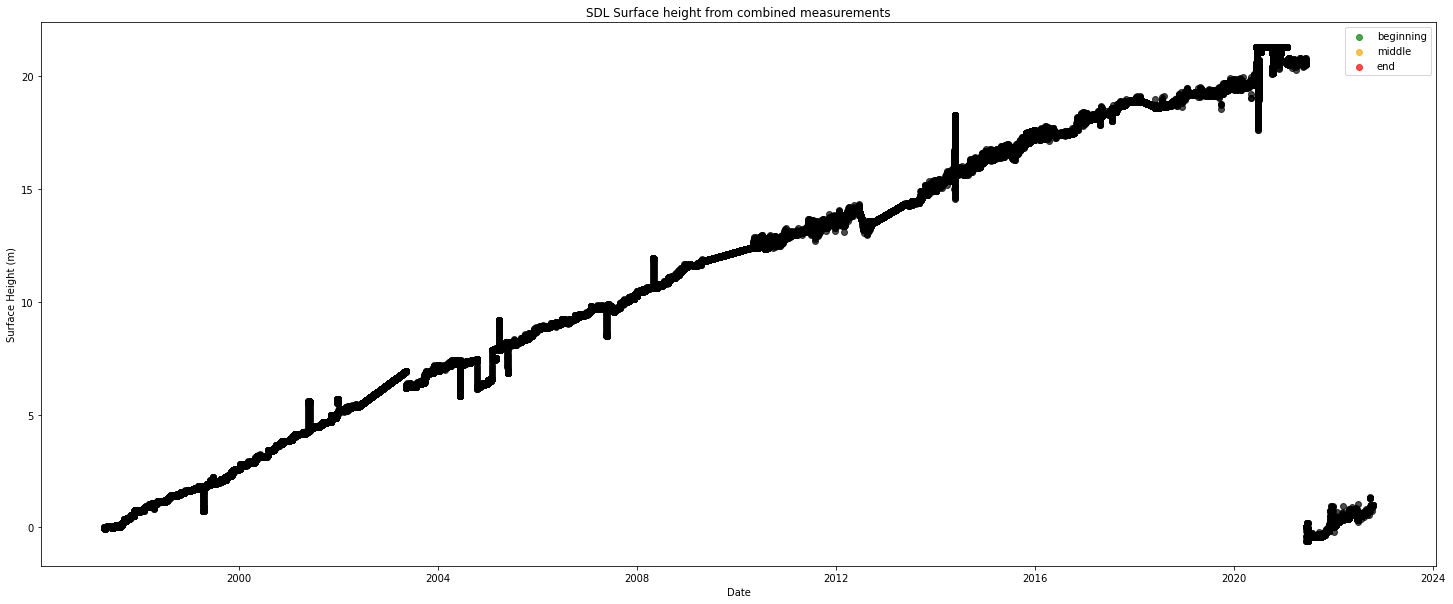

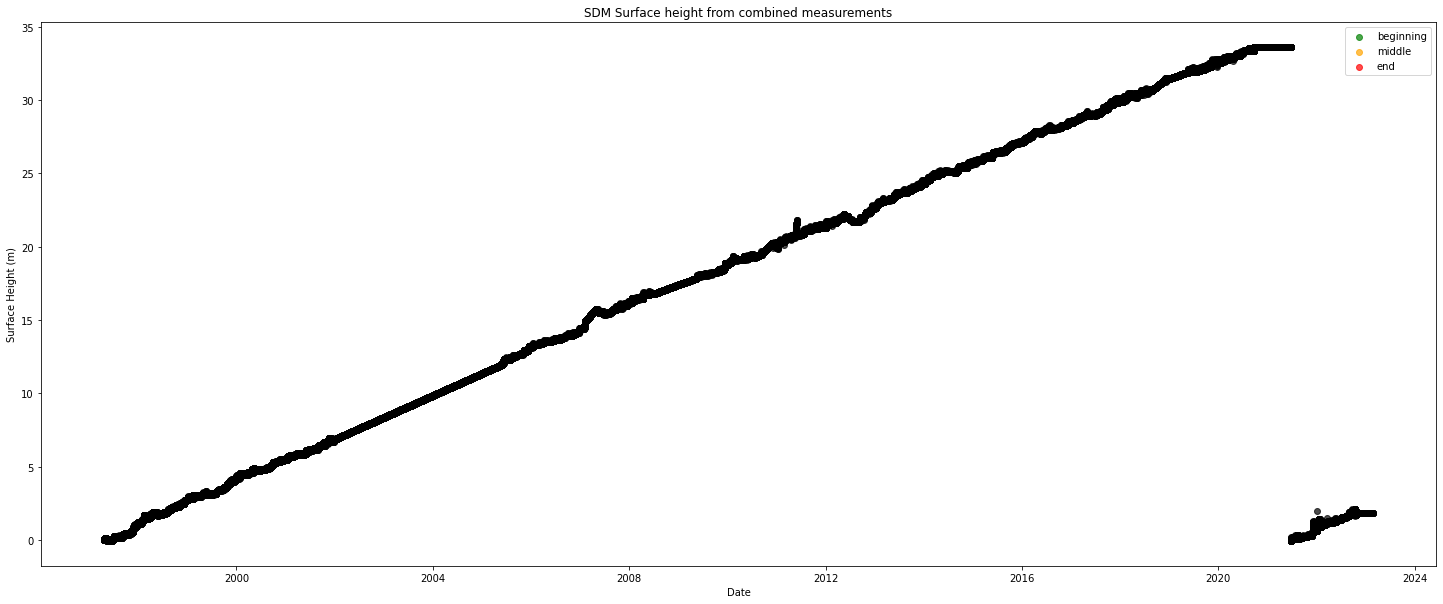

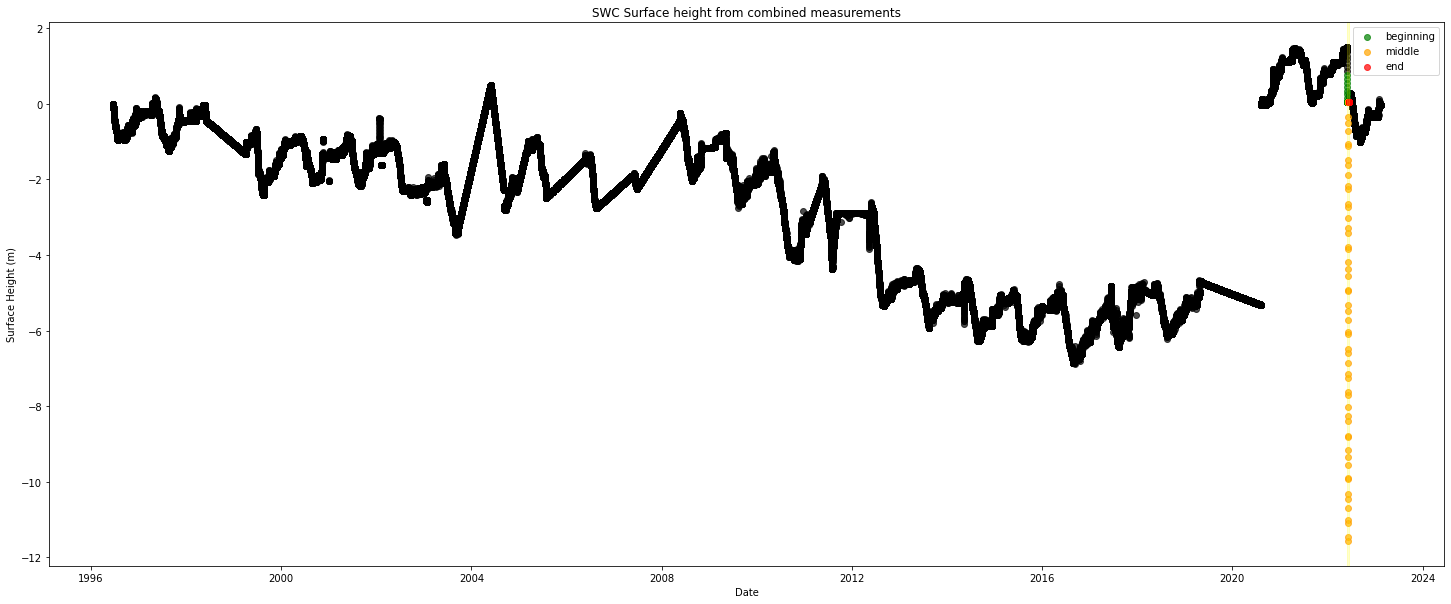

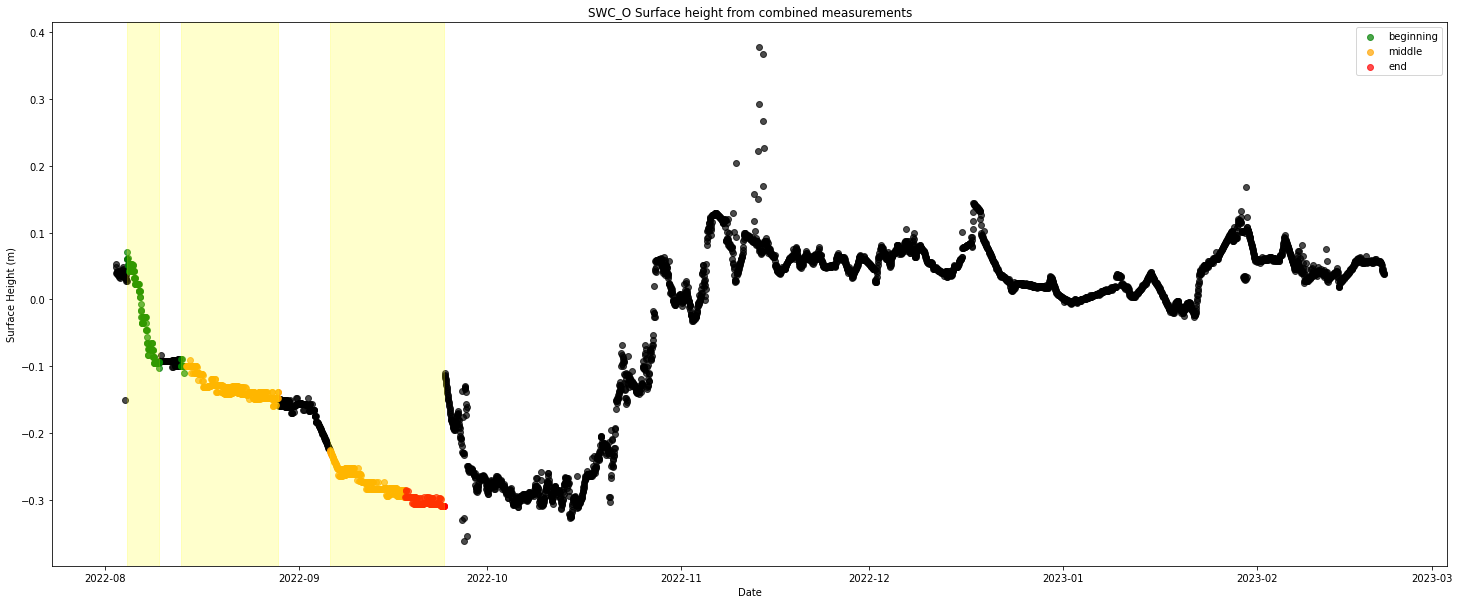

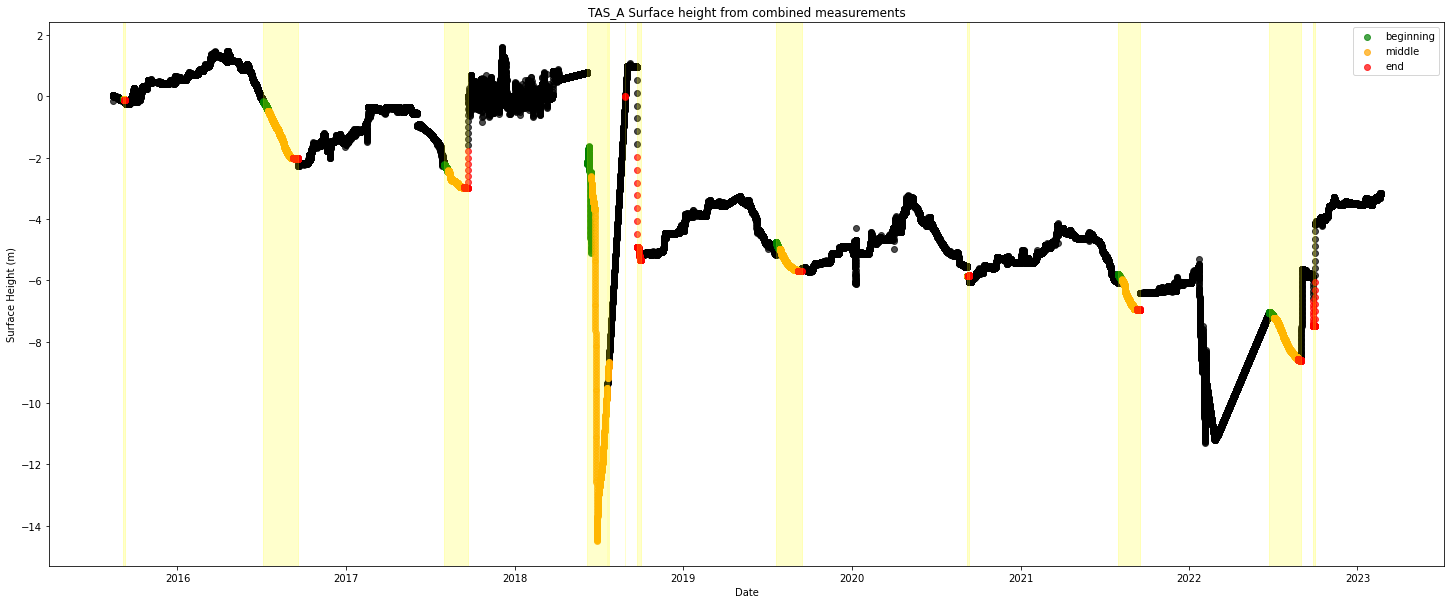

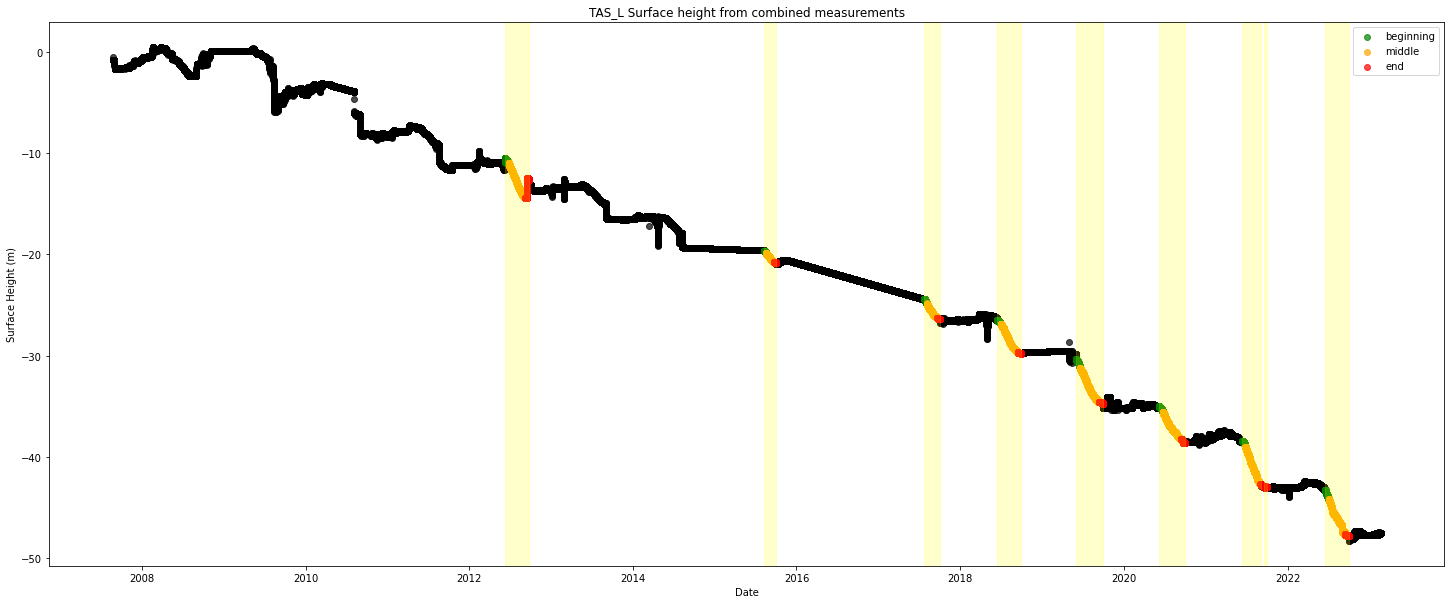

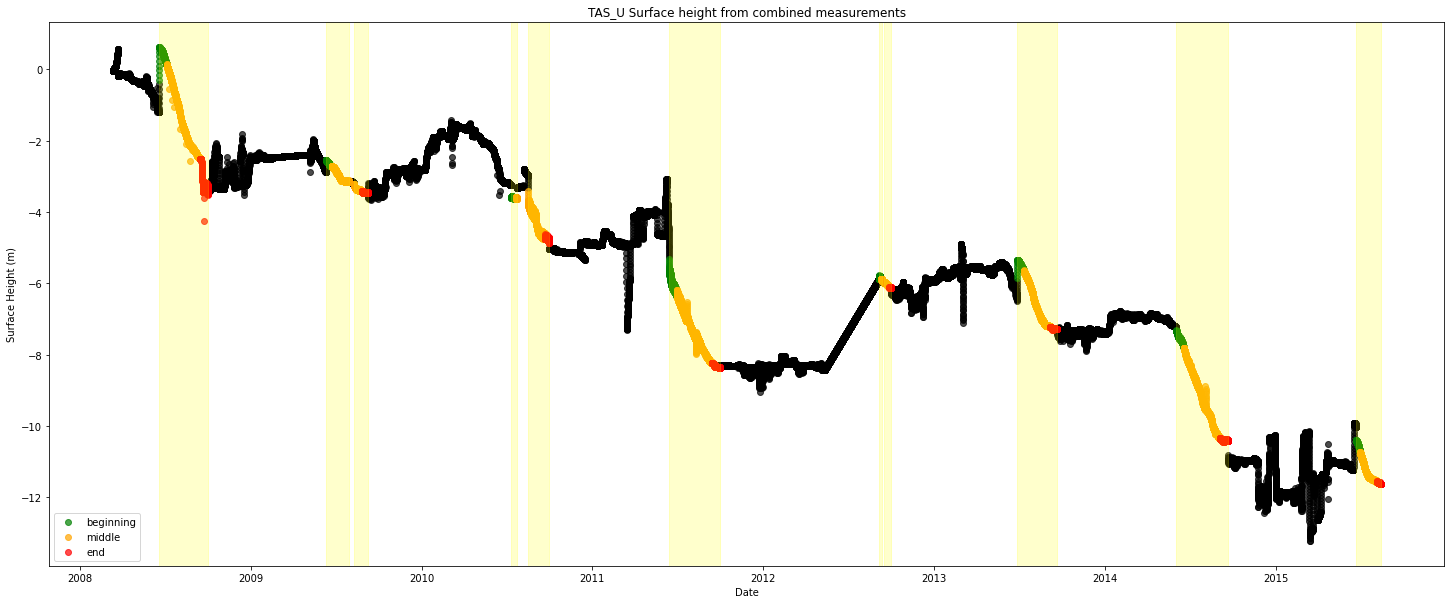

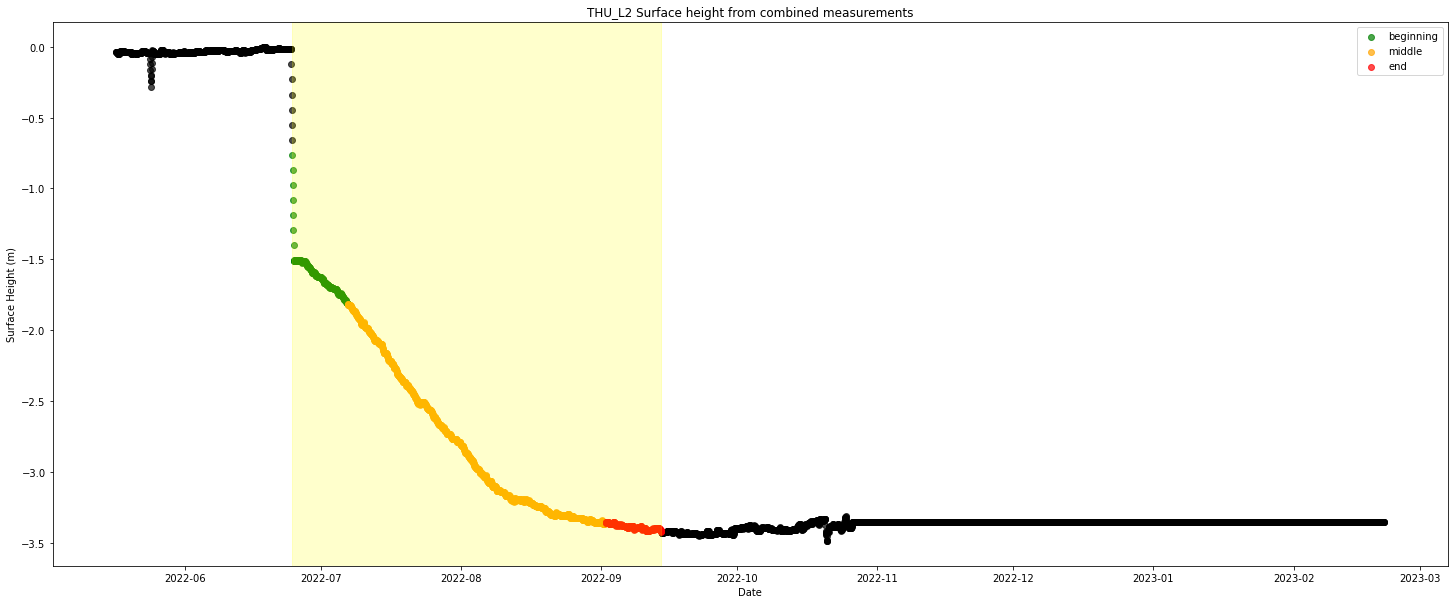

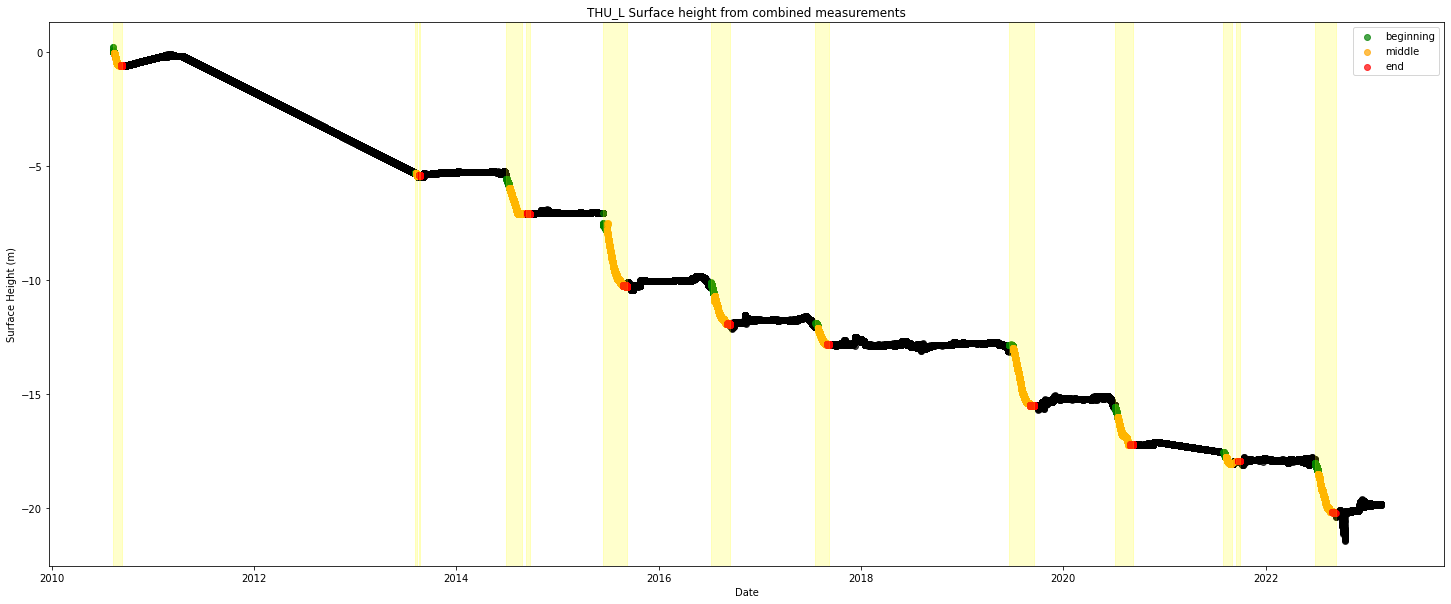

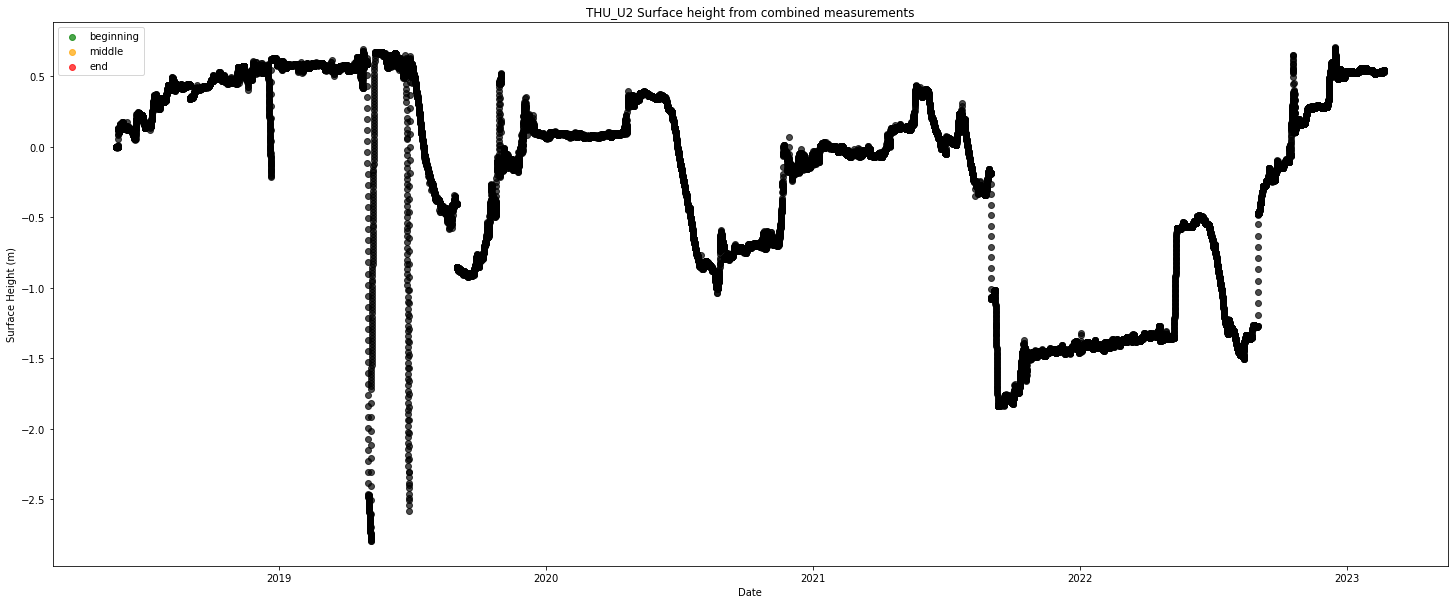

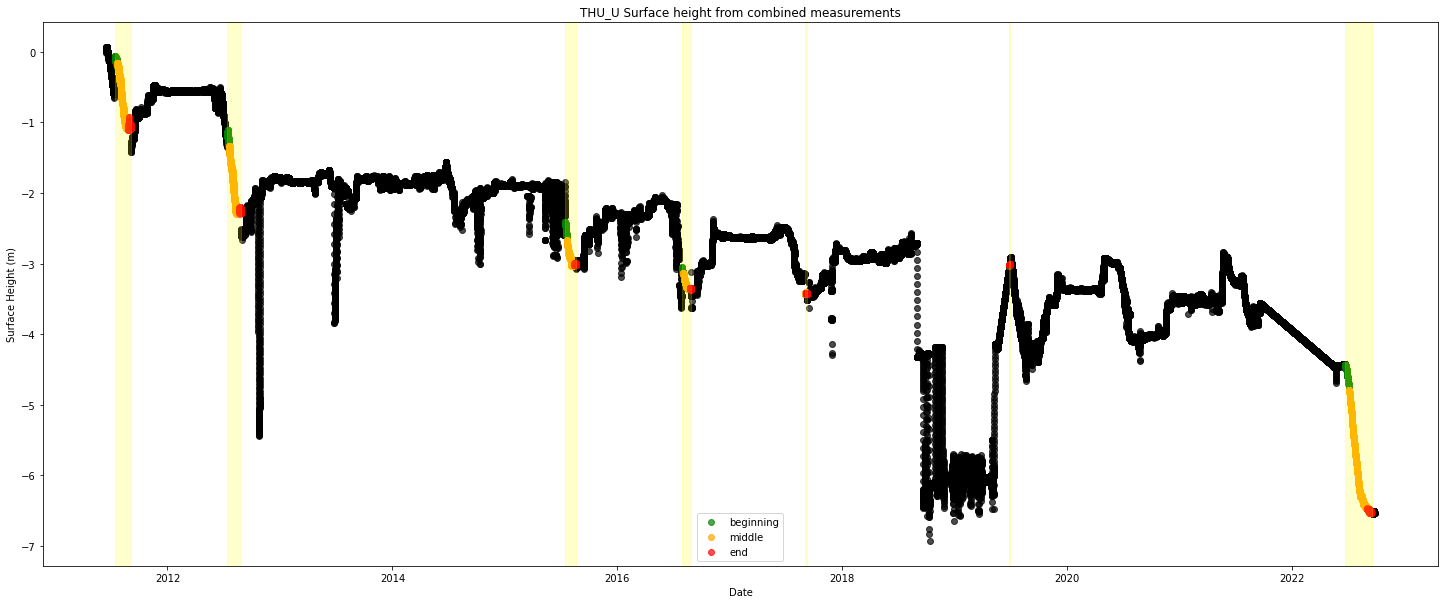

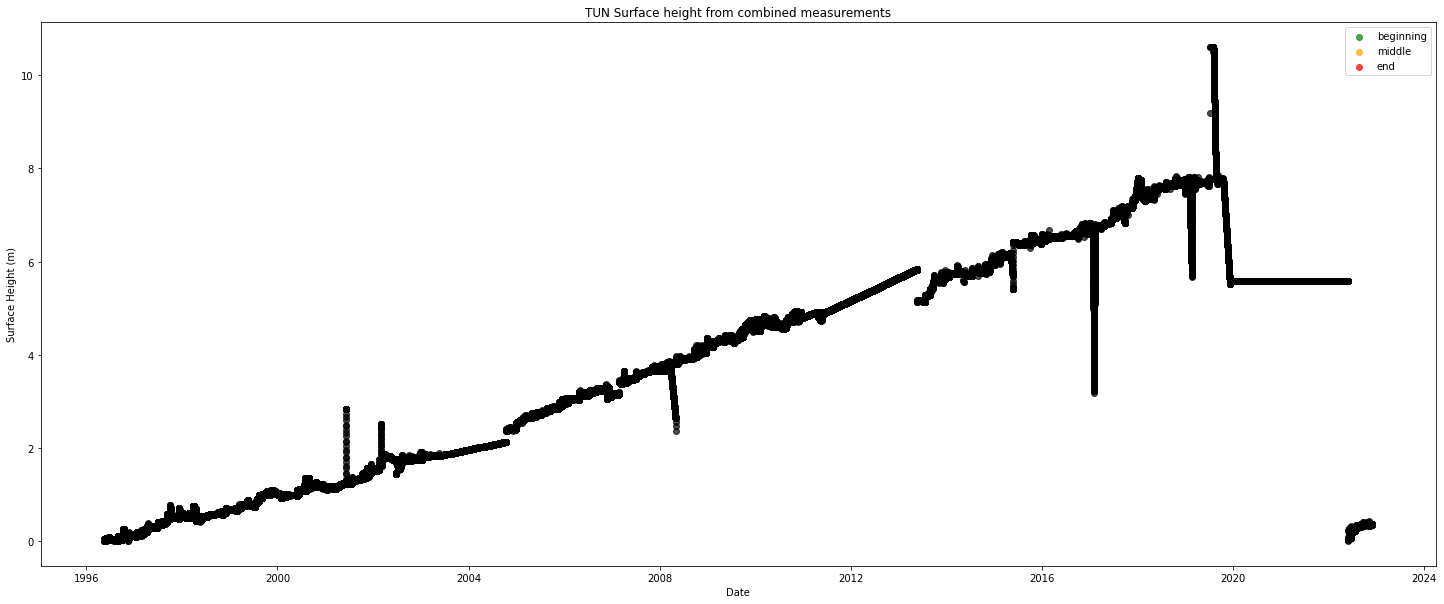

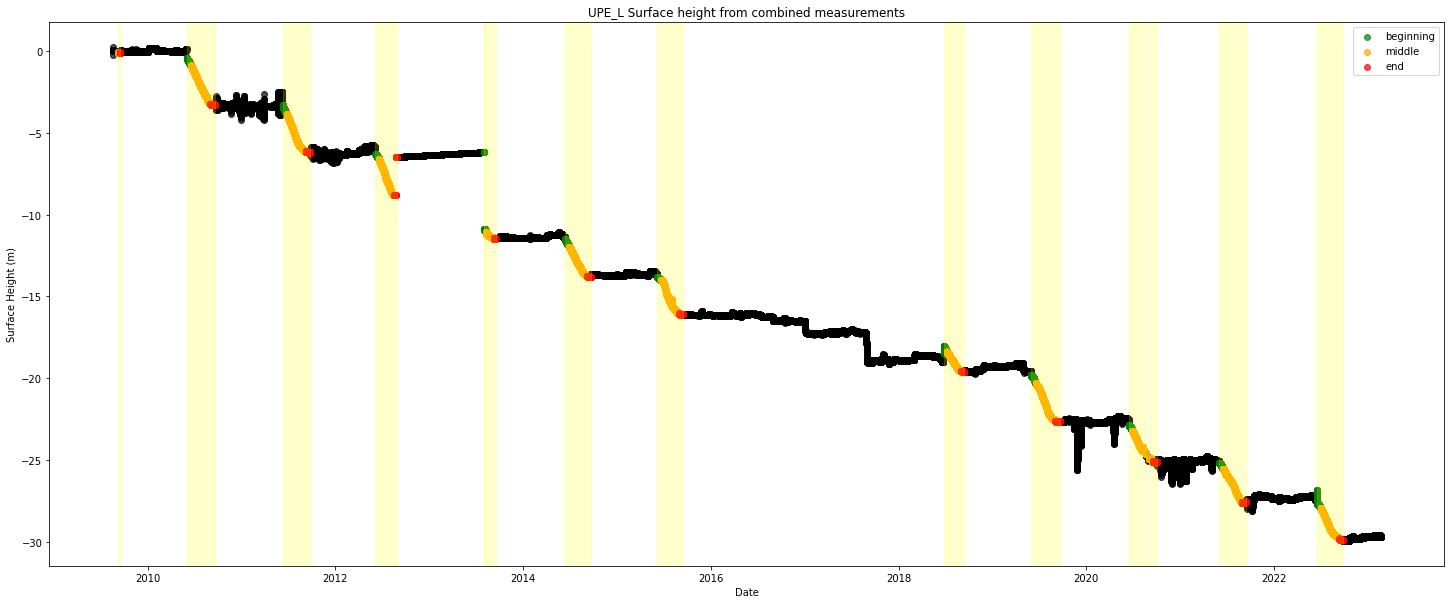

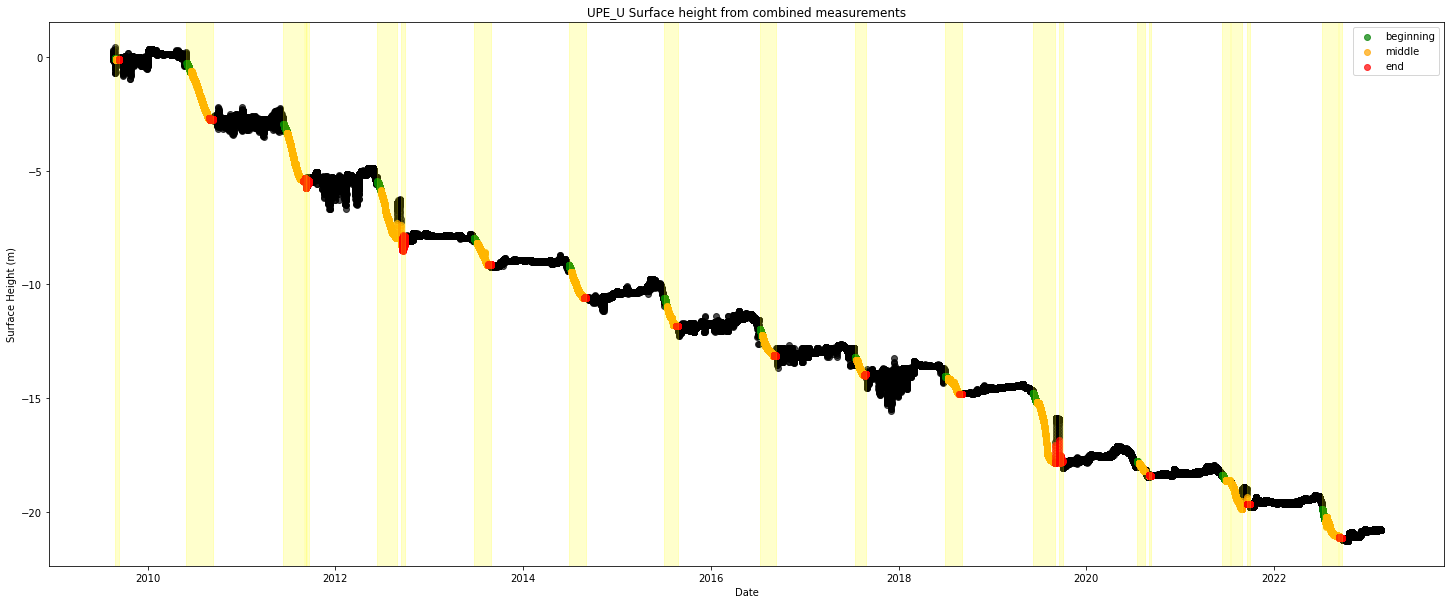

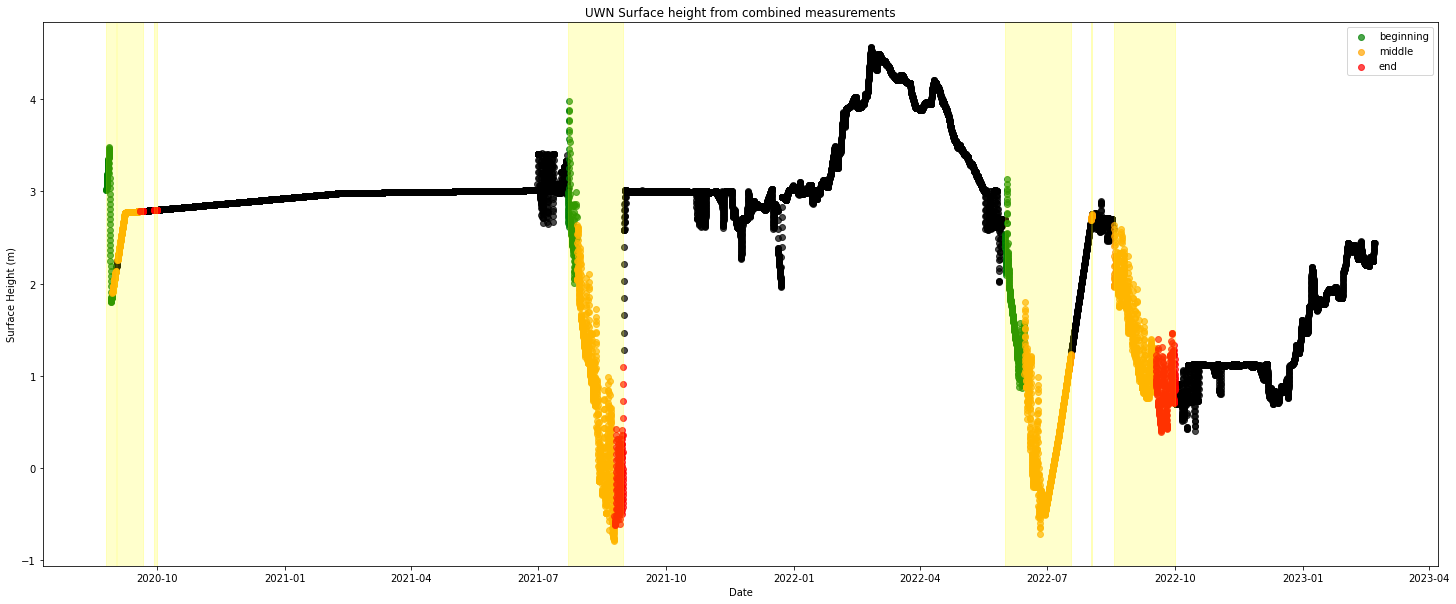

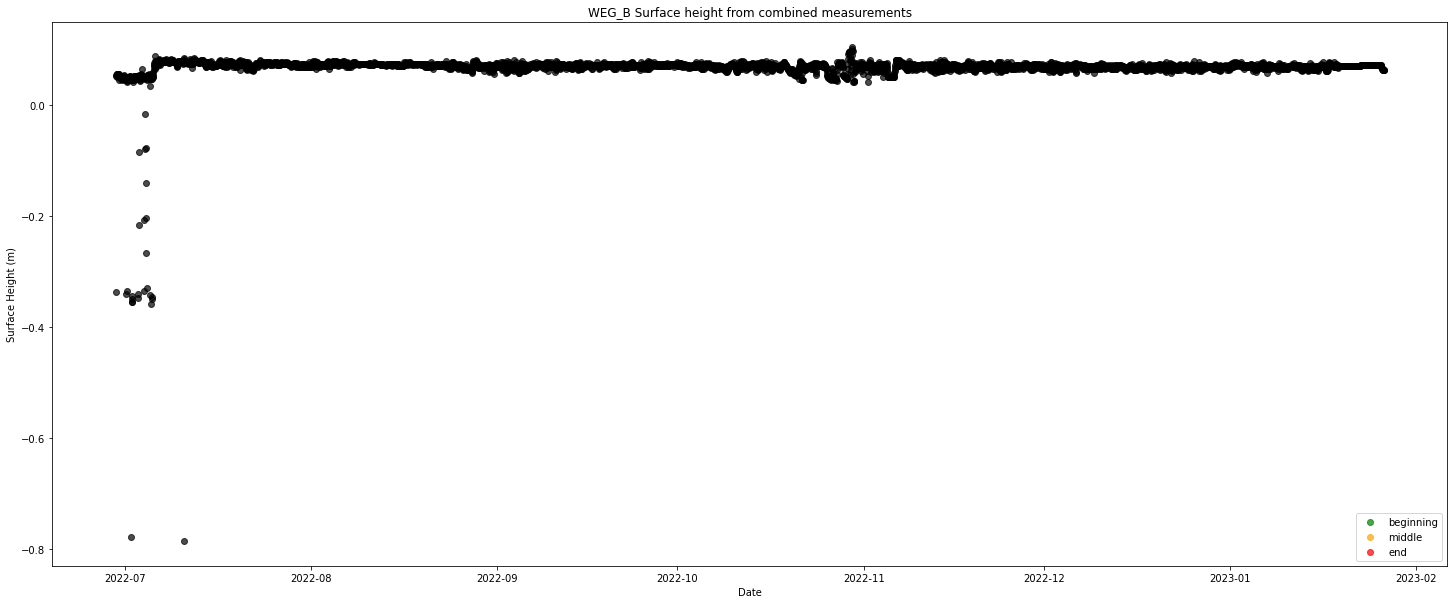

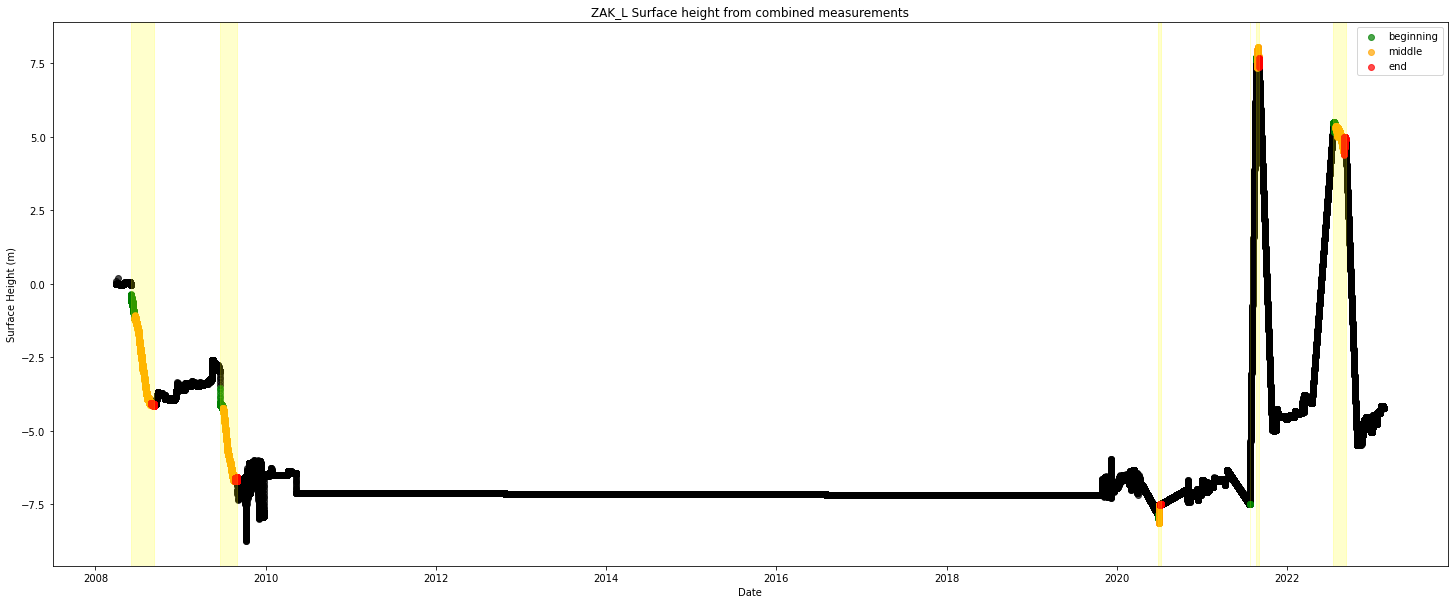

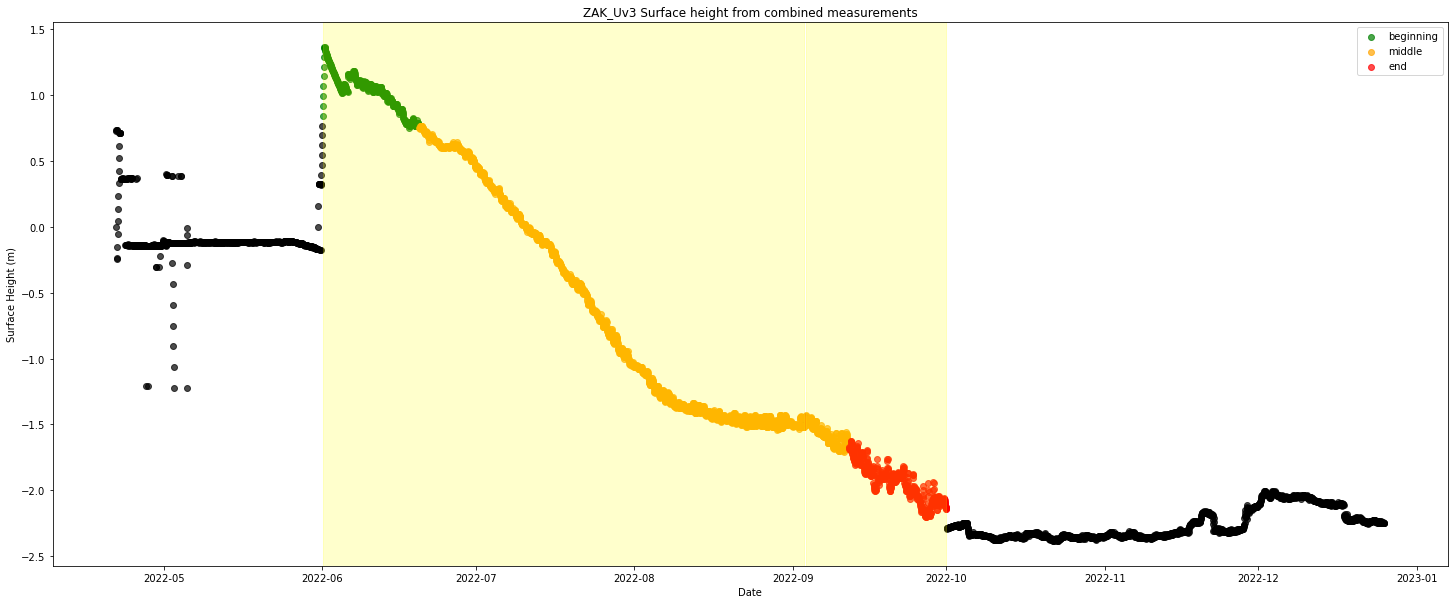

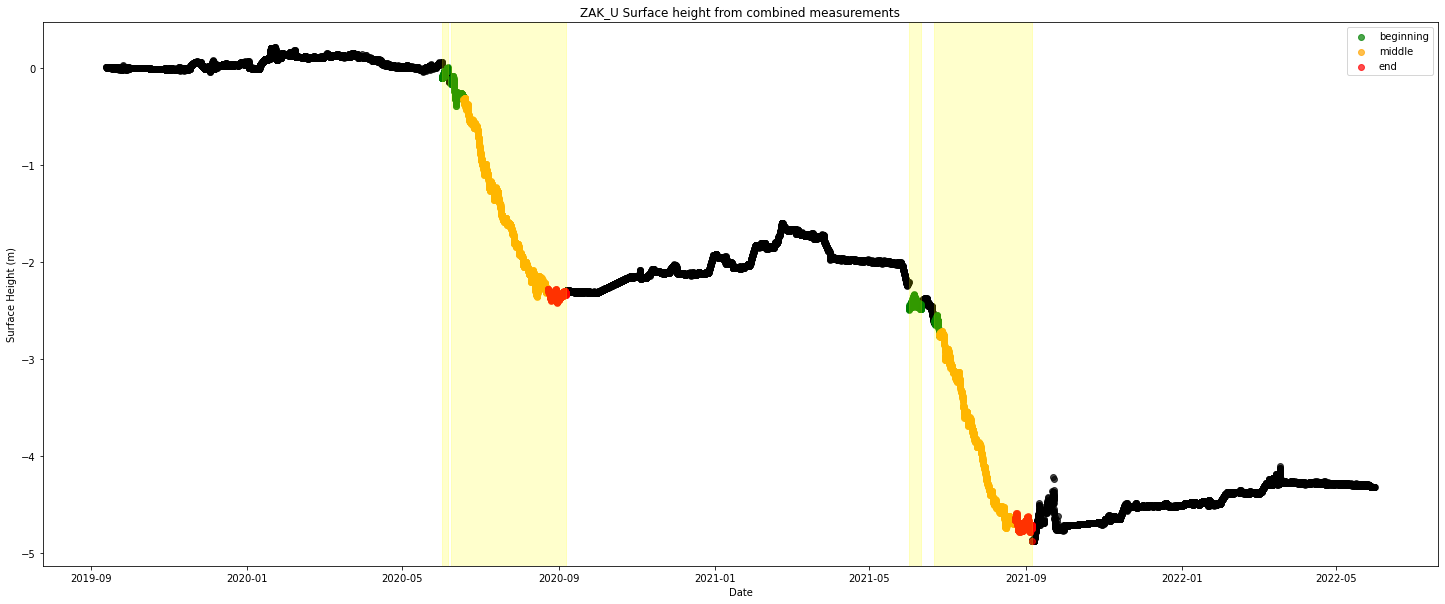

In [29]:
for station in station_list:
    plt_srf_height(Station = station, input_df = df) 

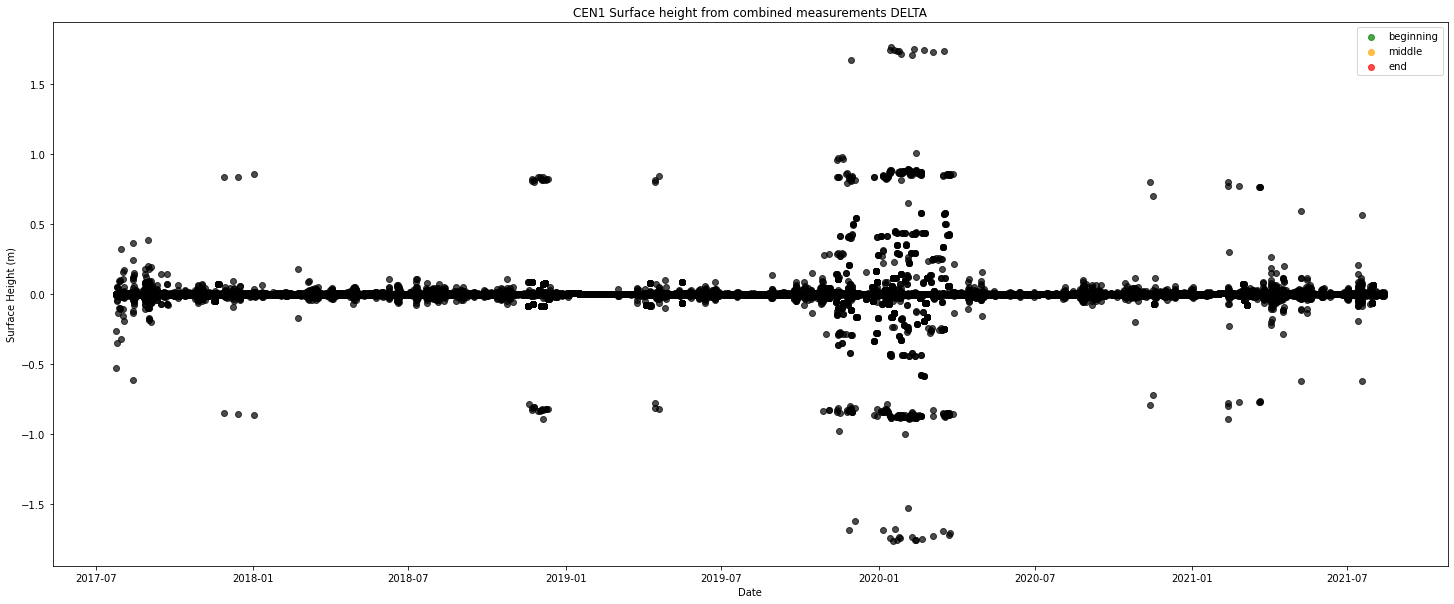

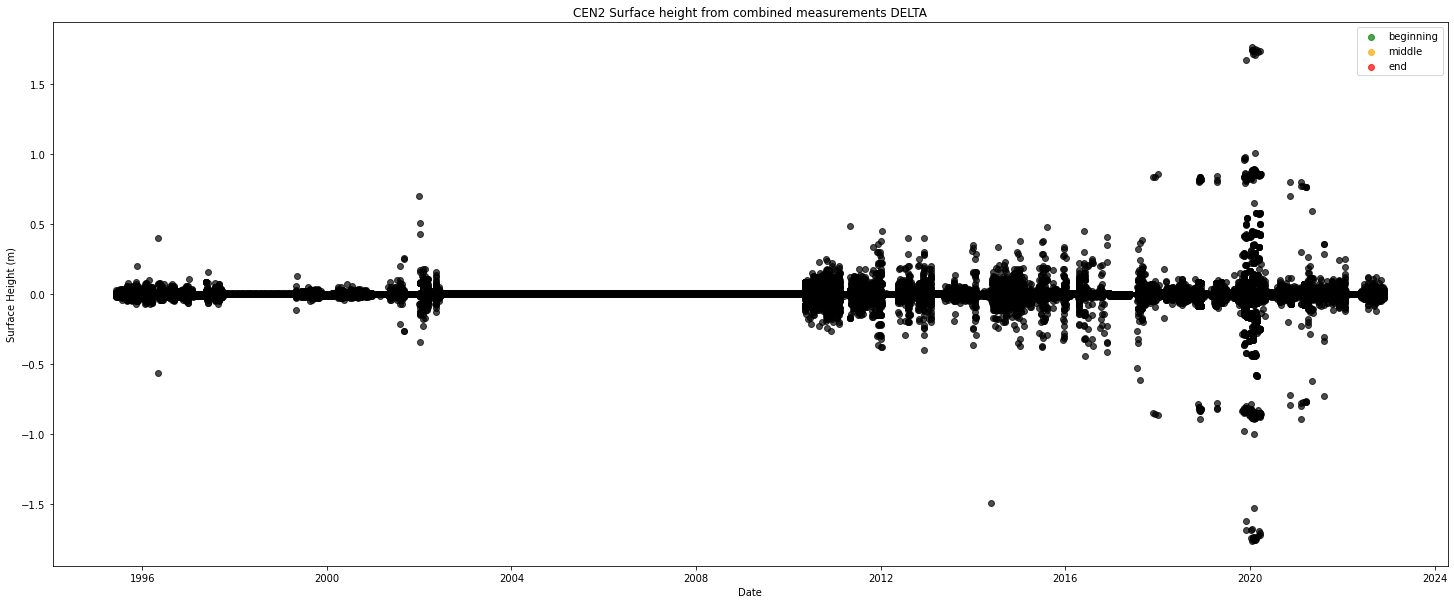

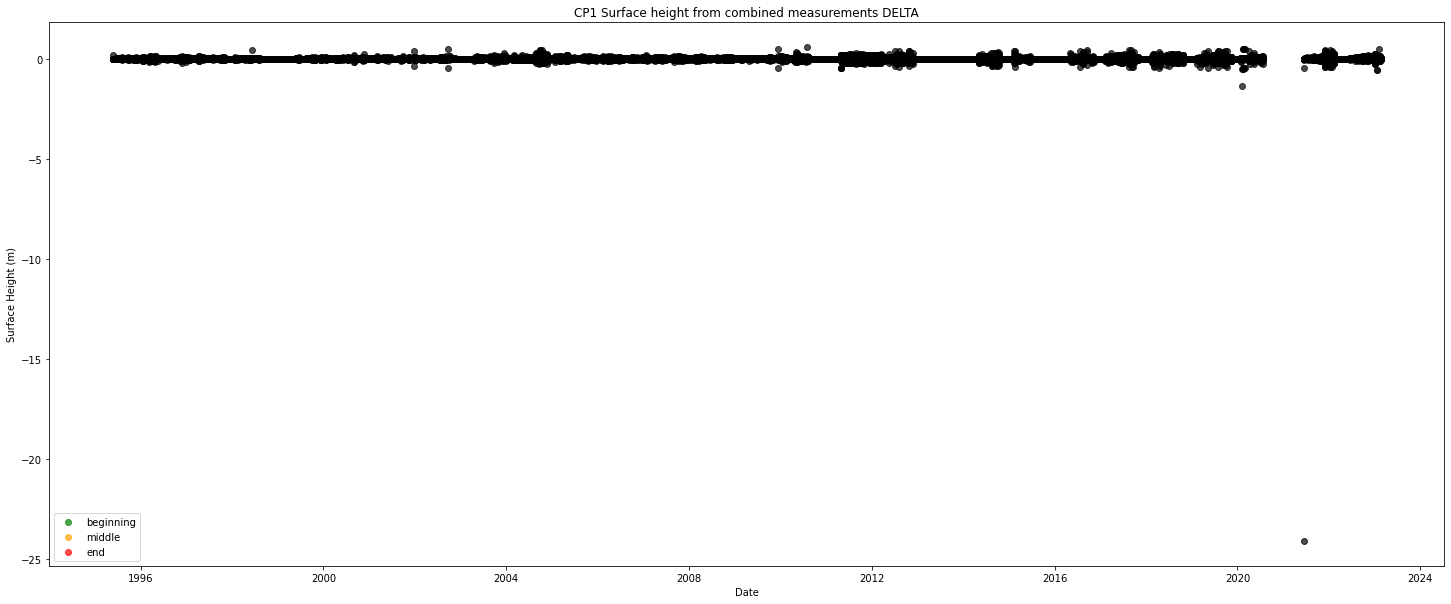

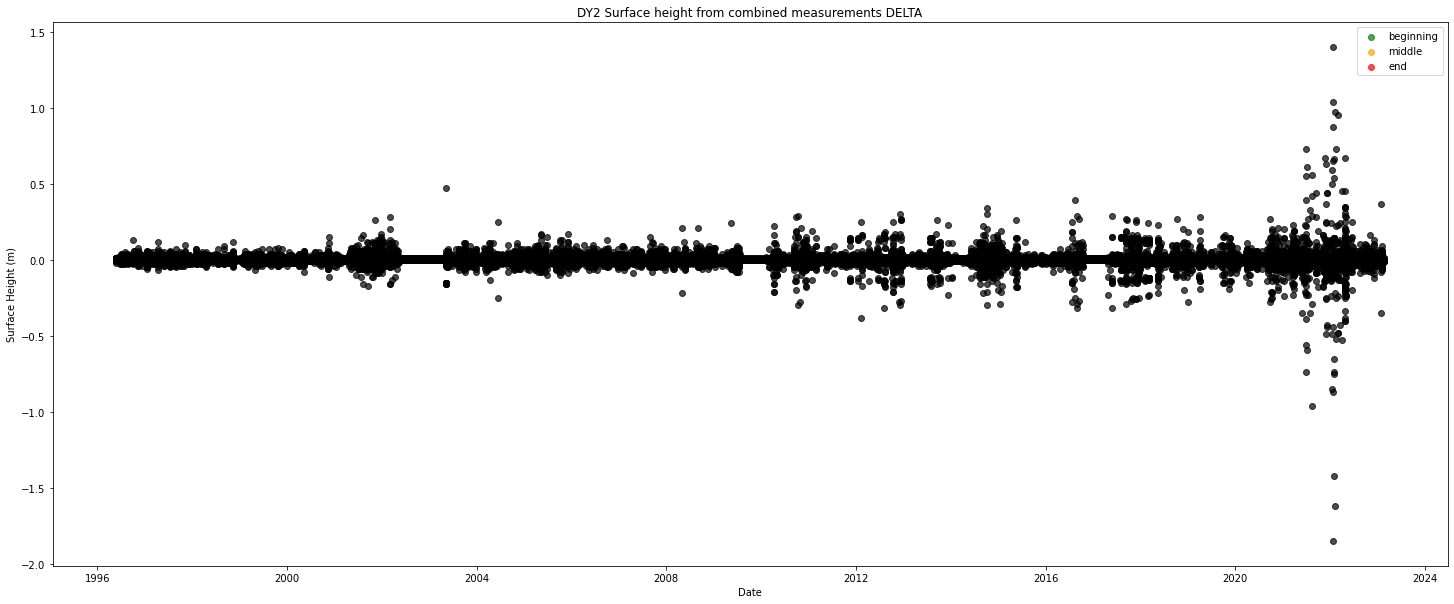

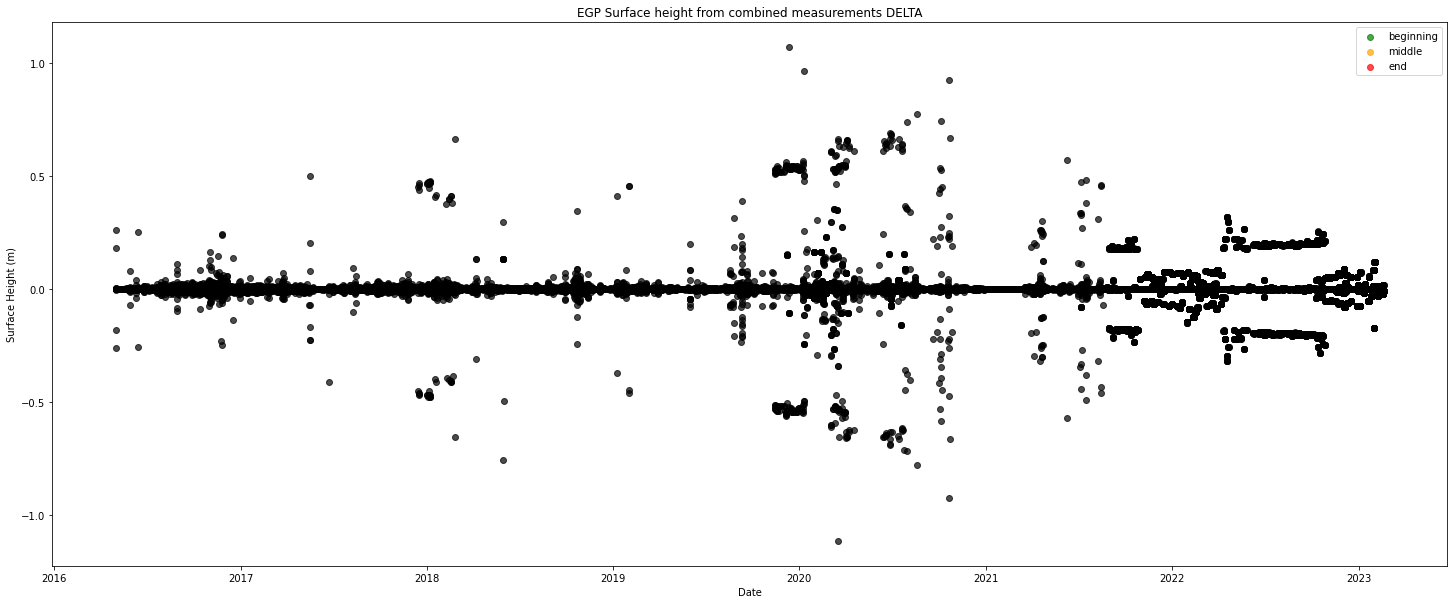

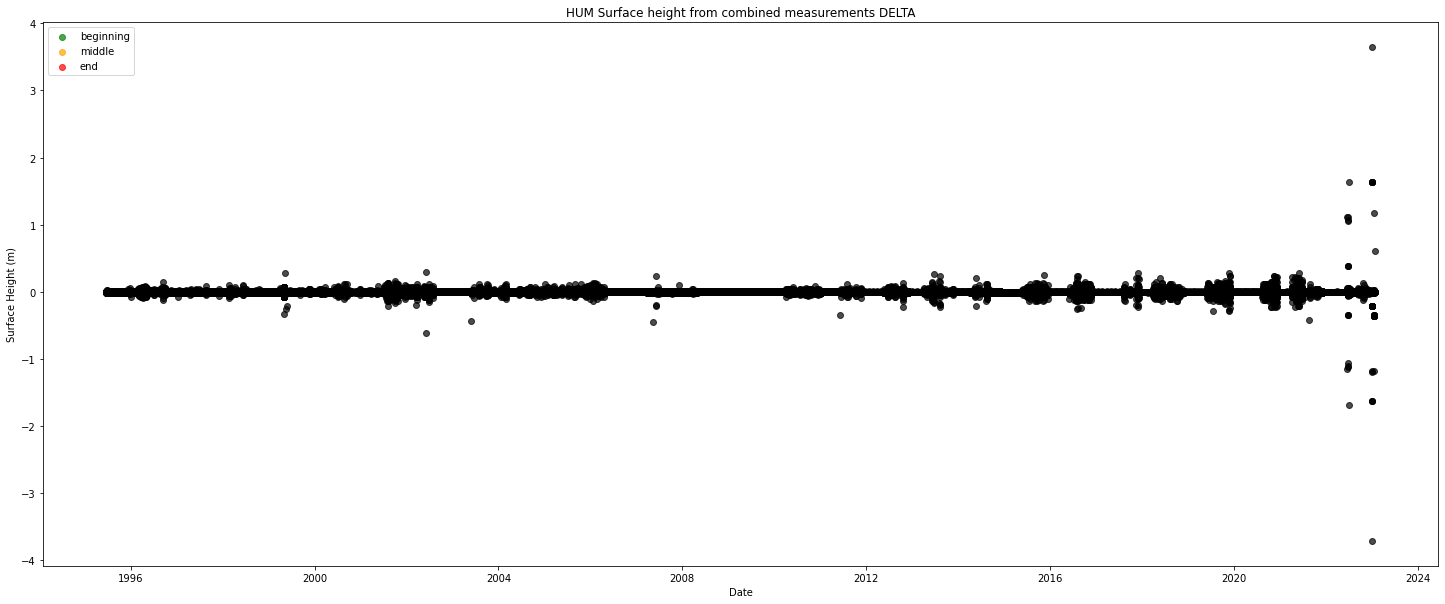

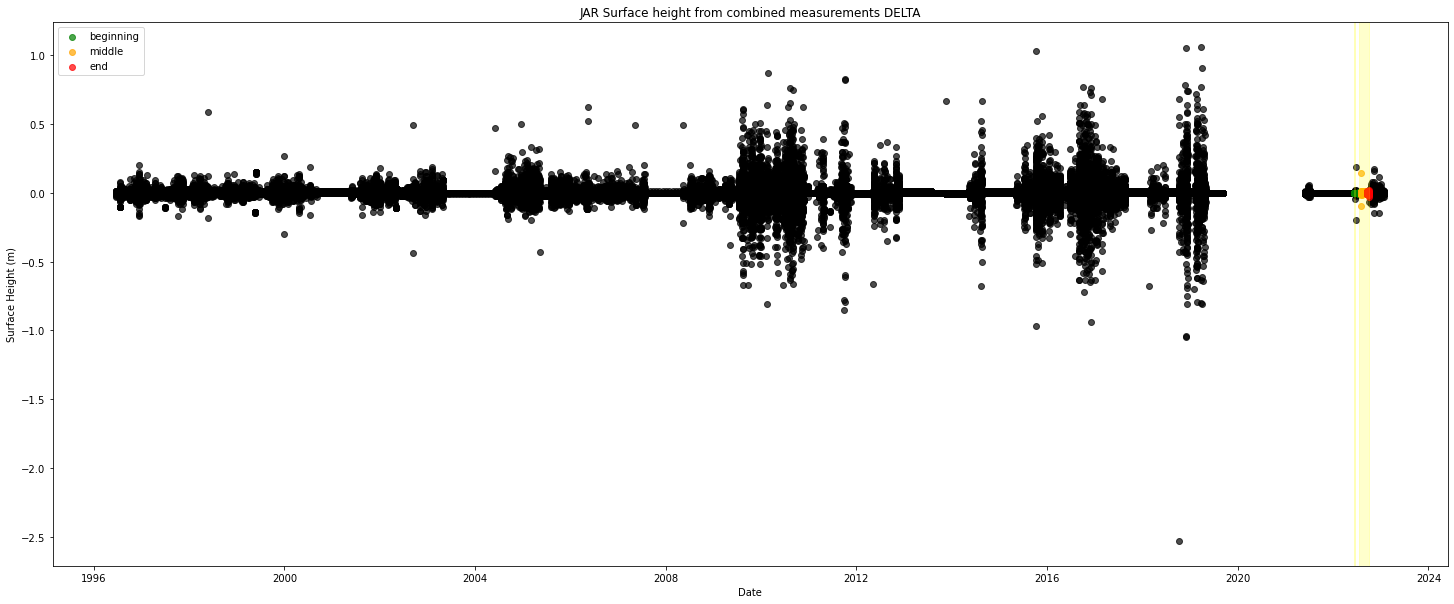

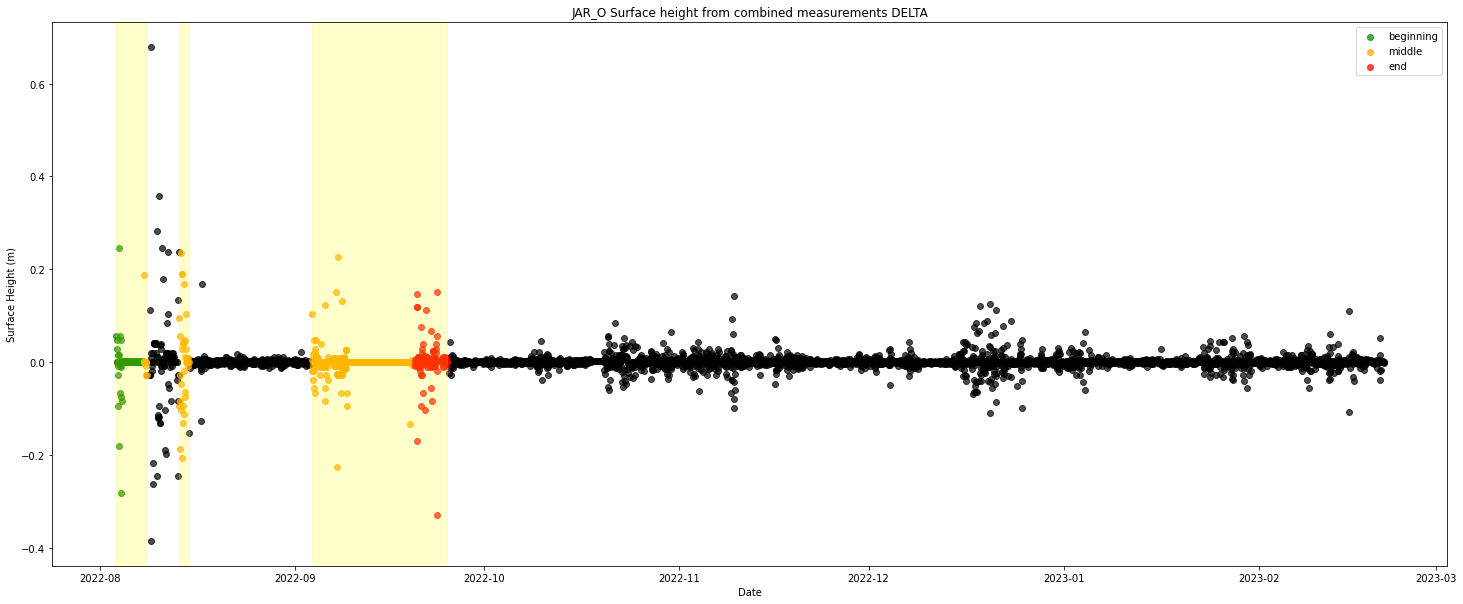

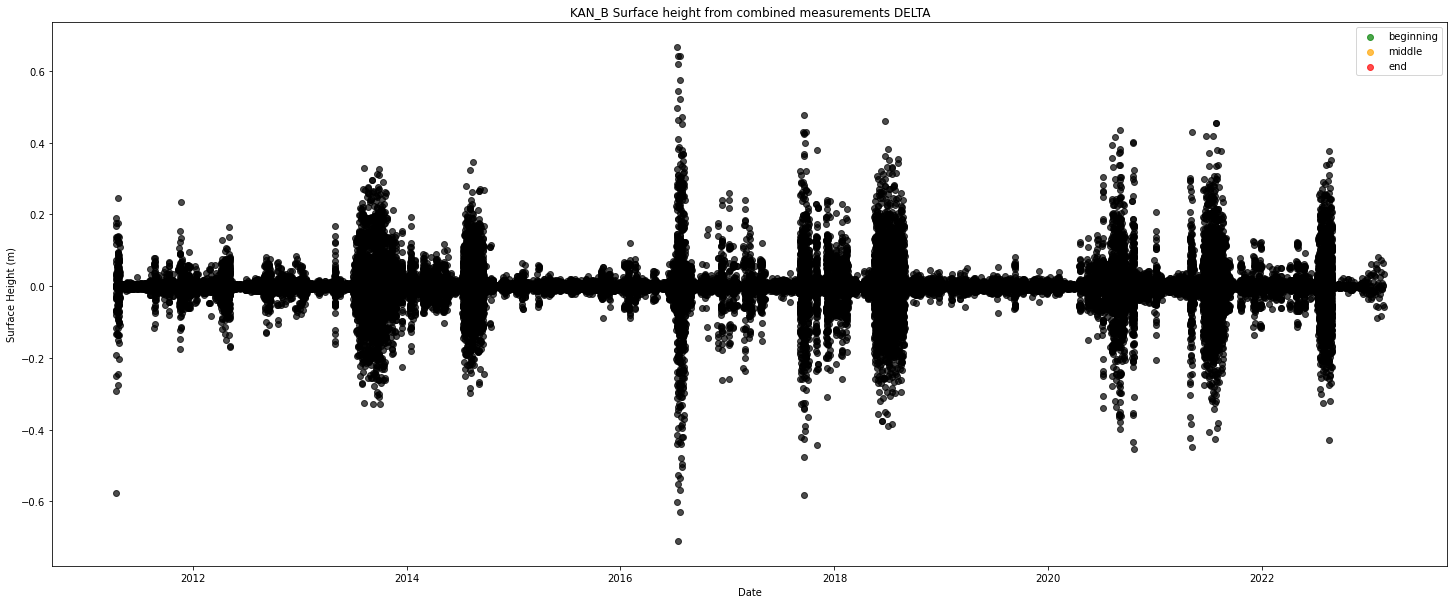

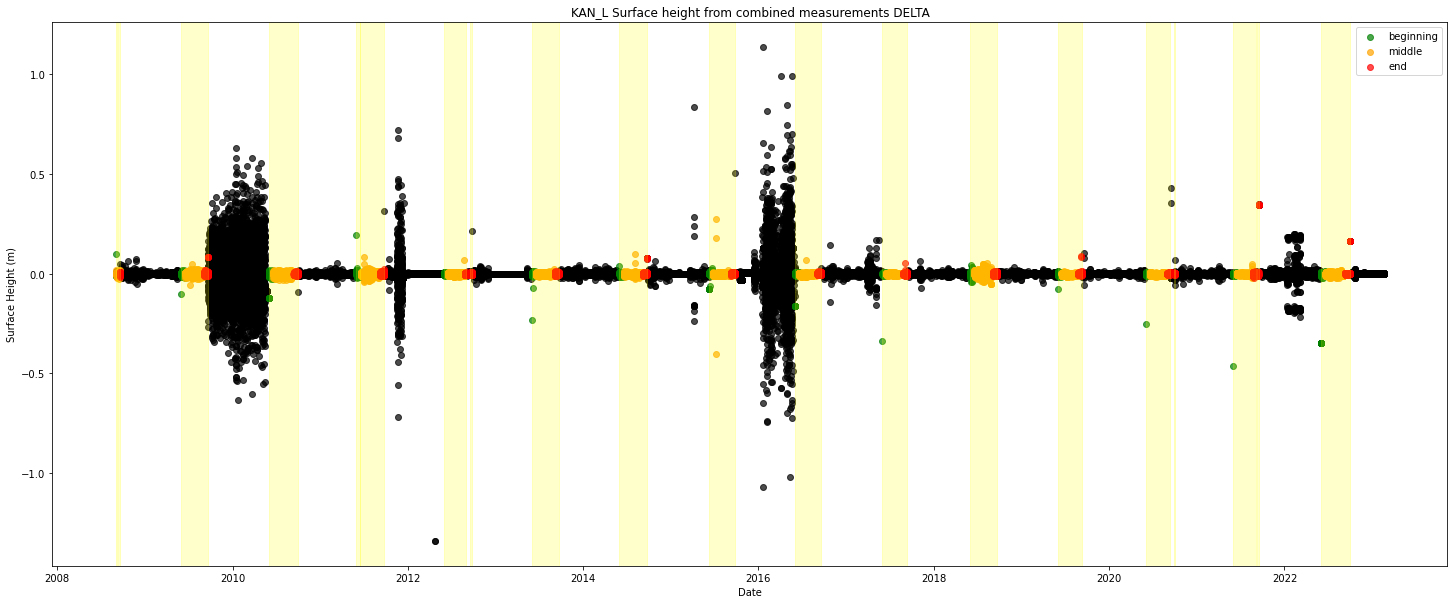

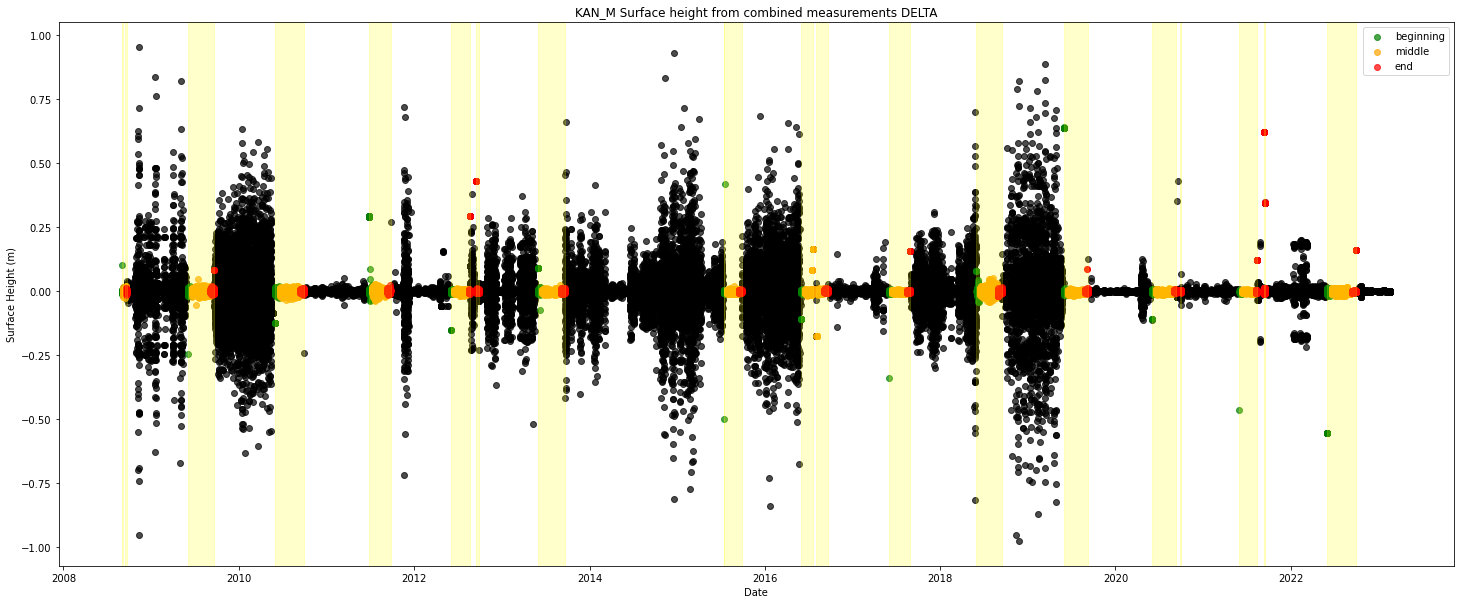

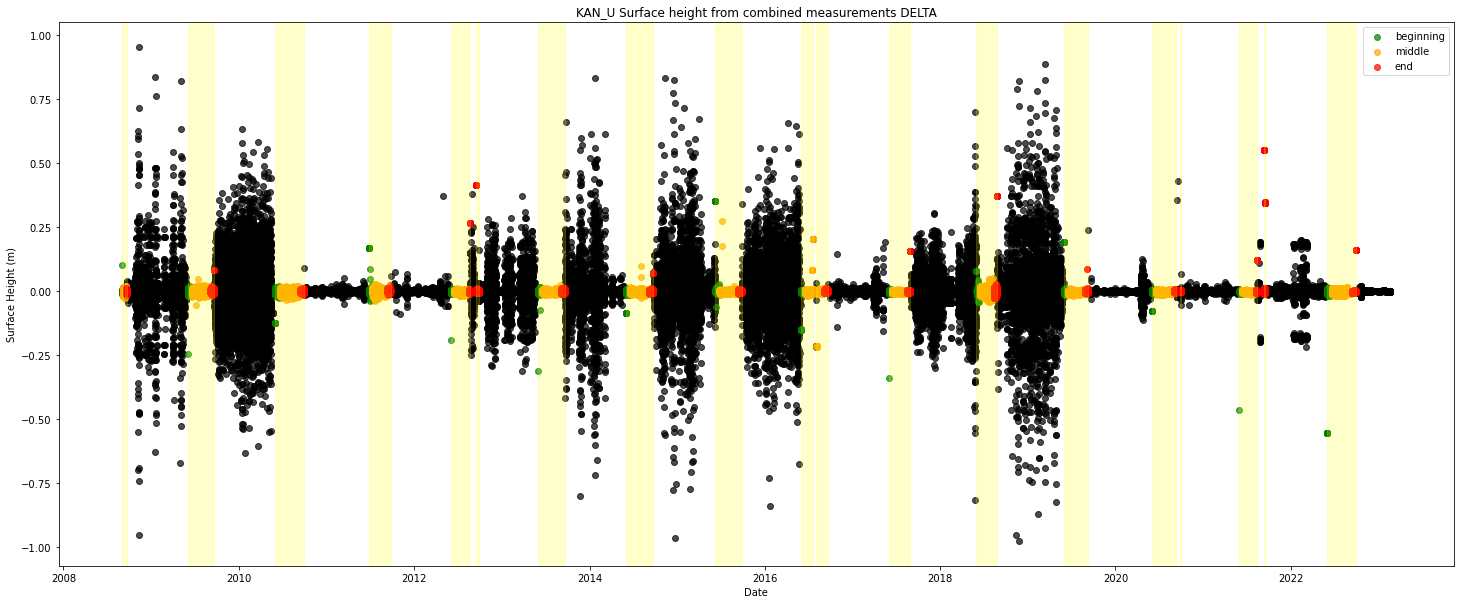

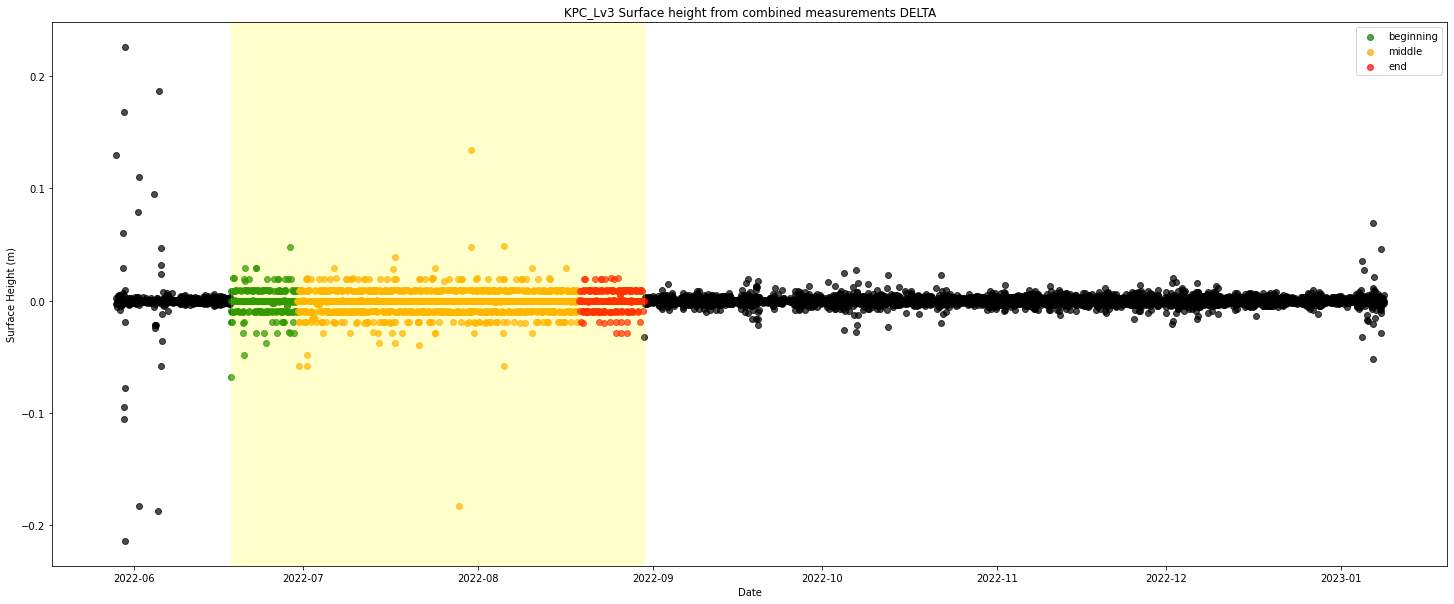

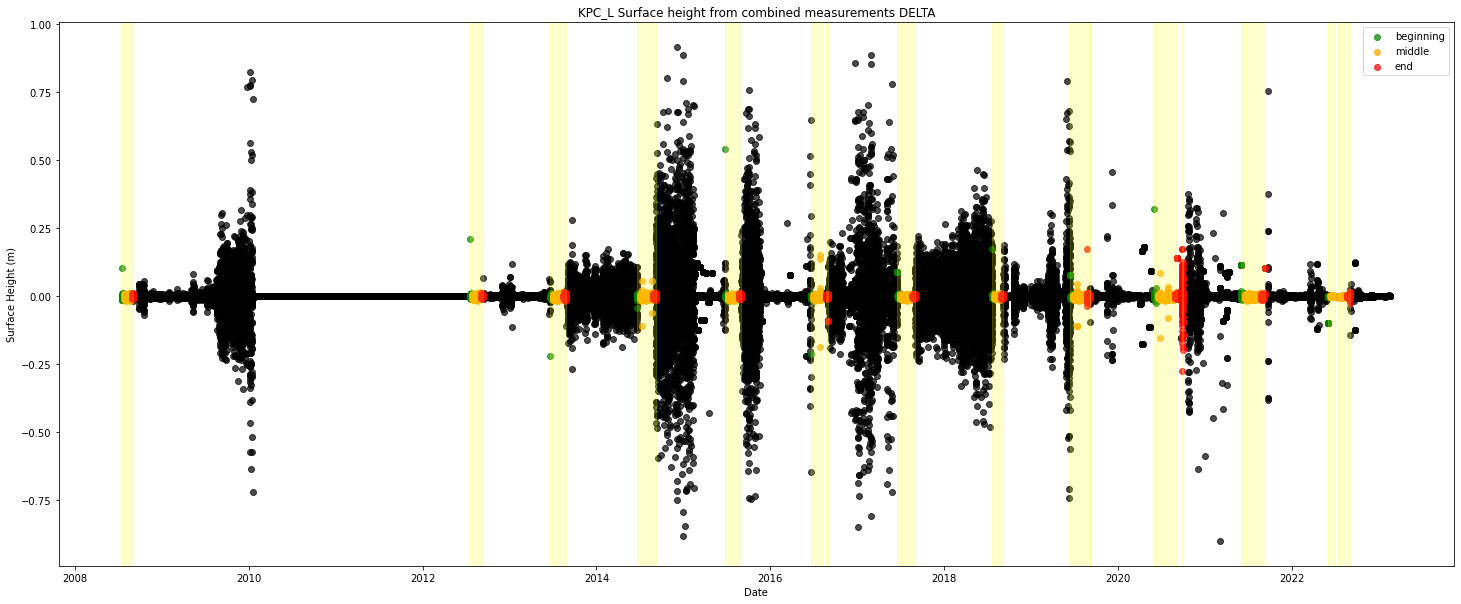

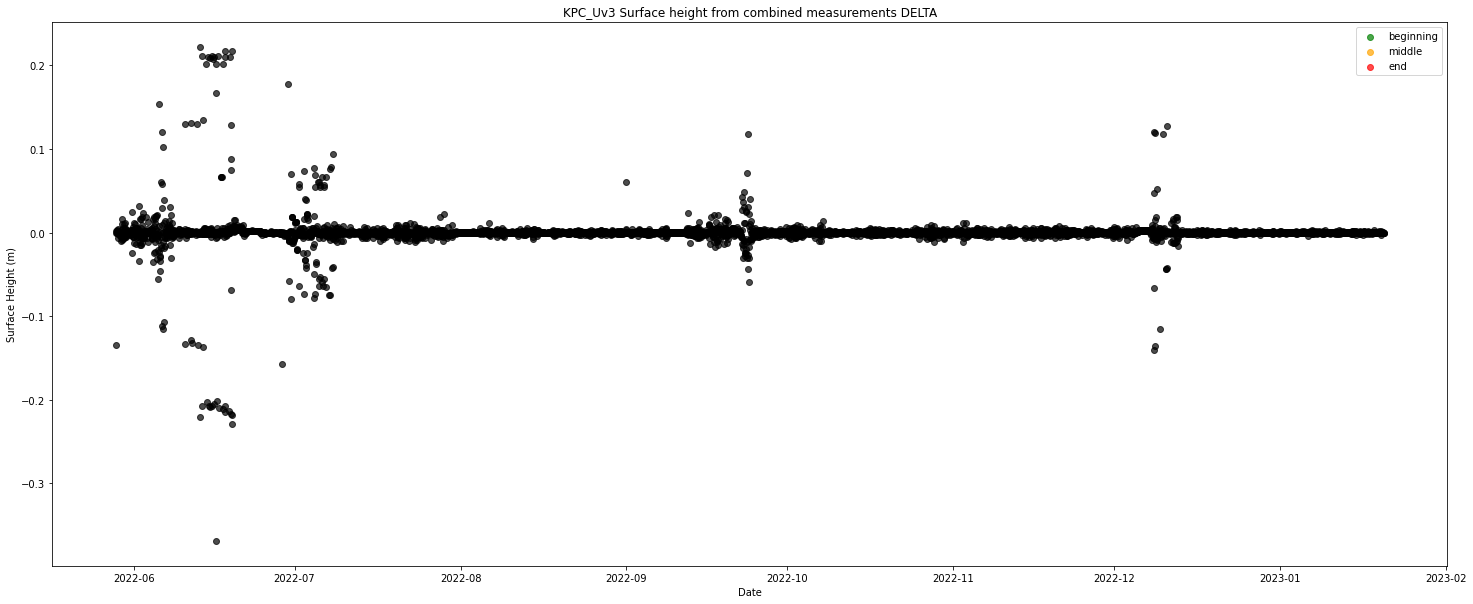

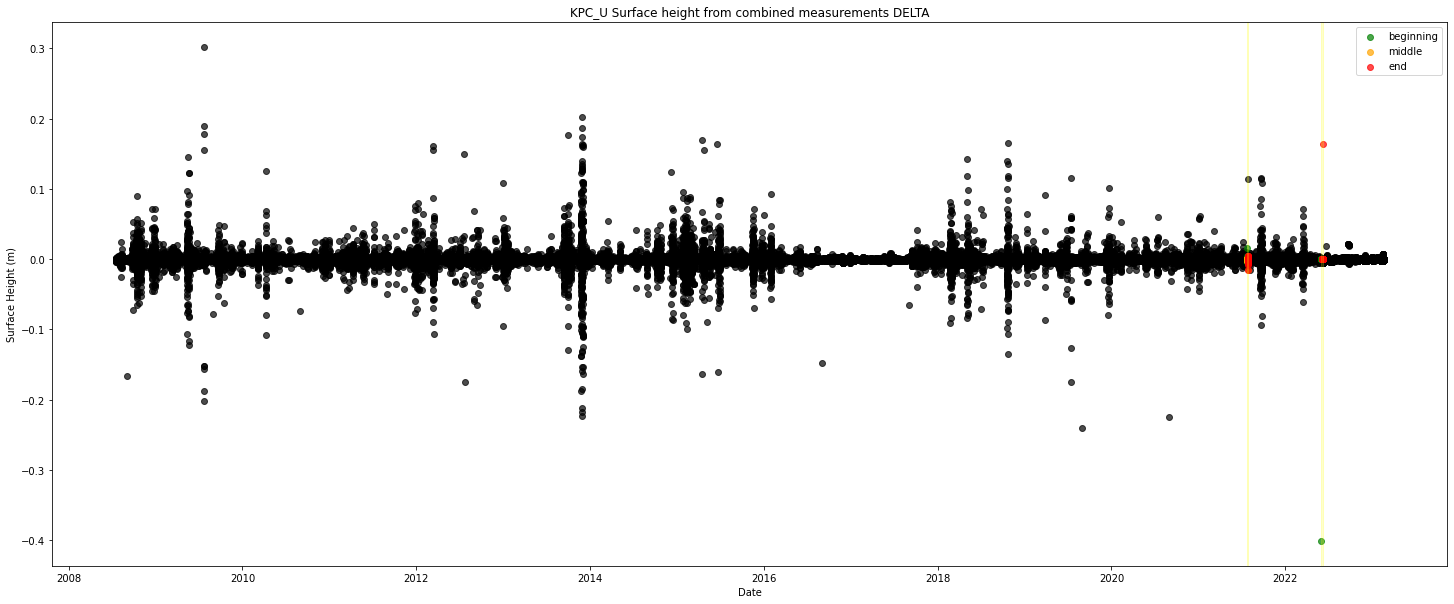

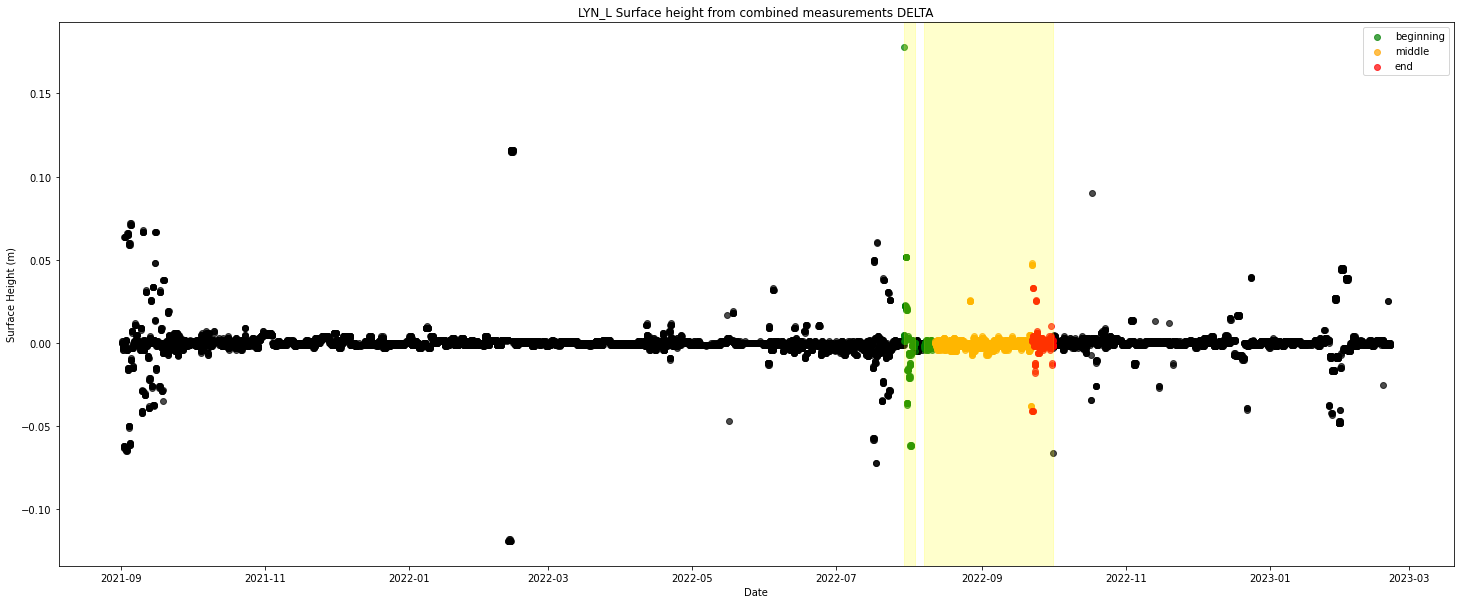

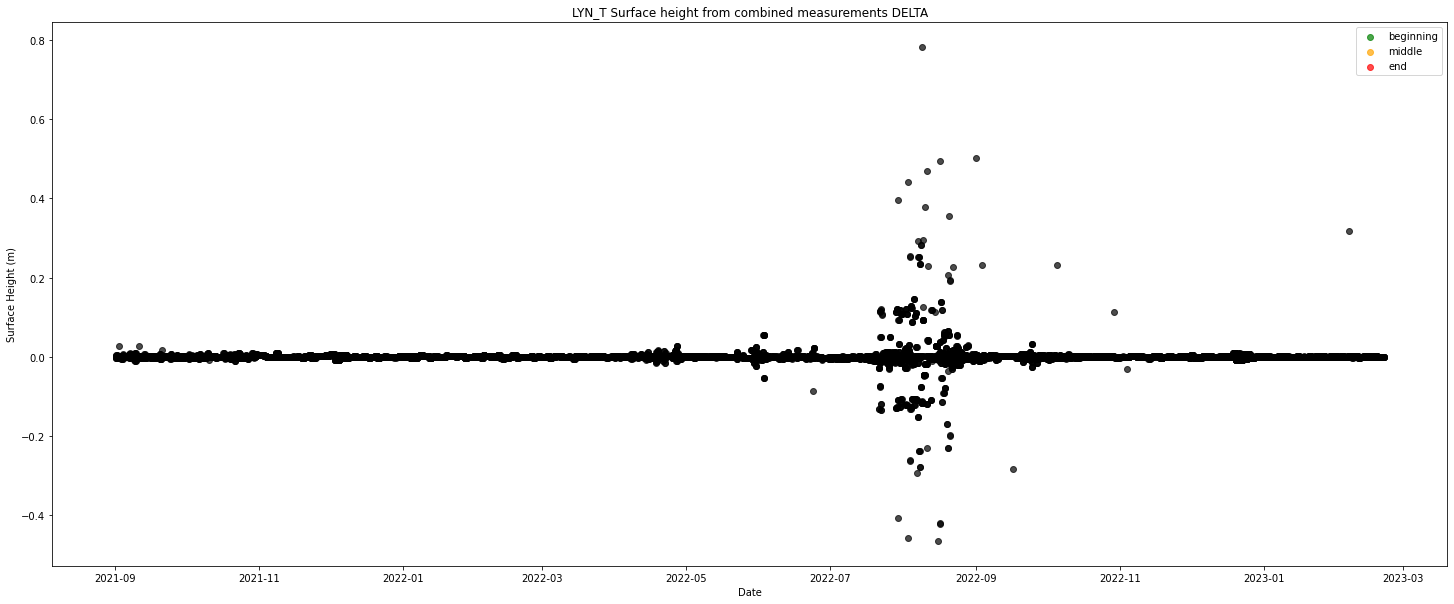

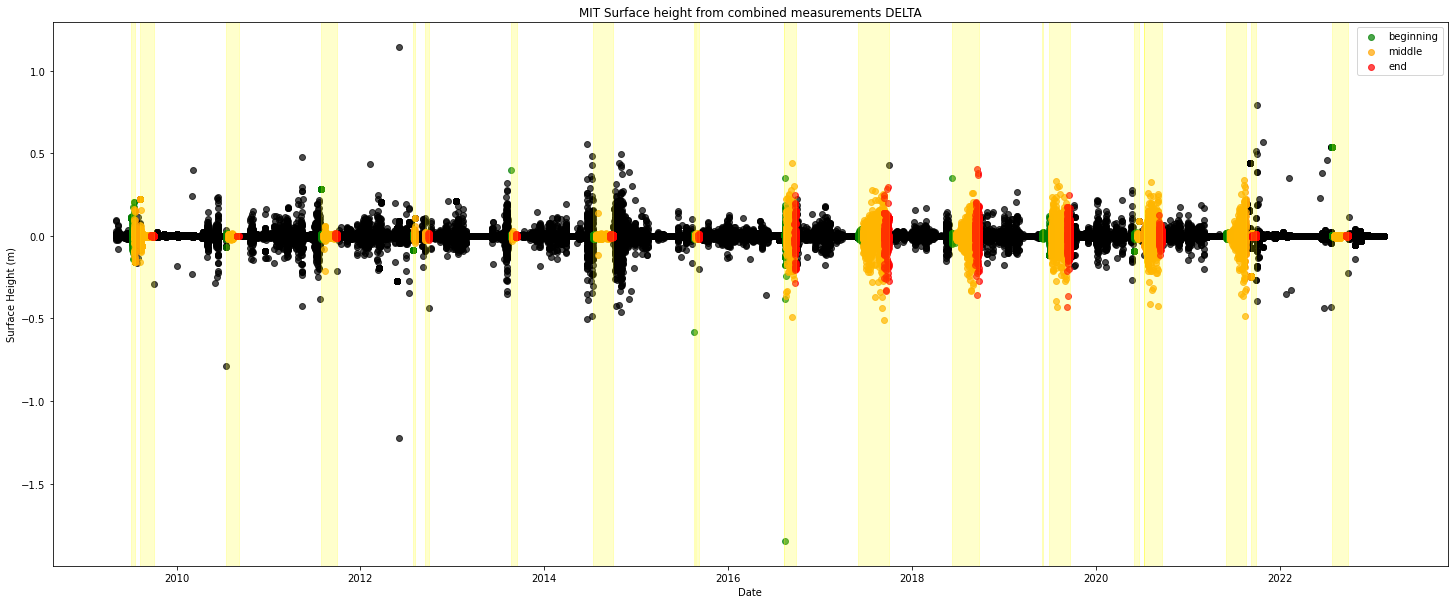

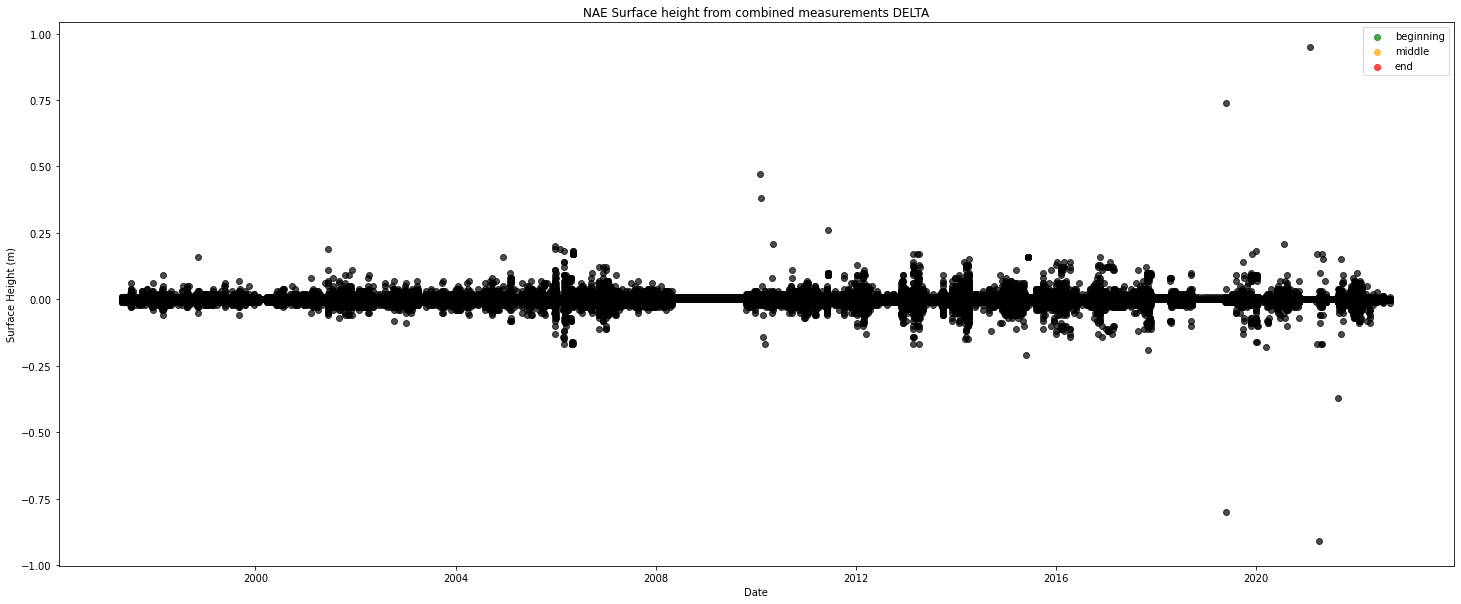

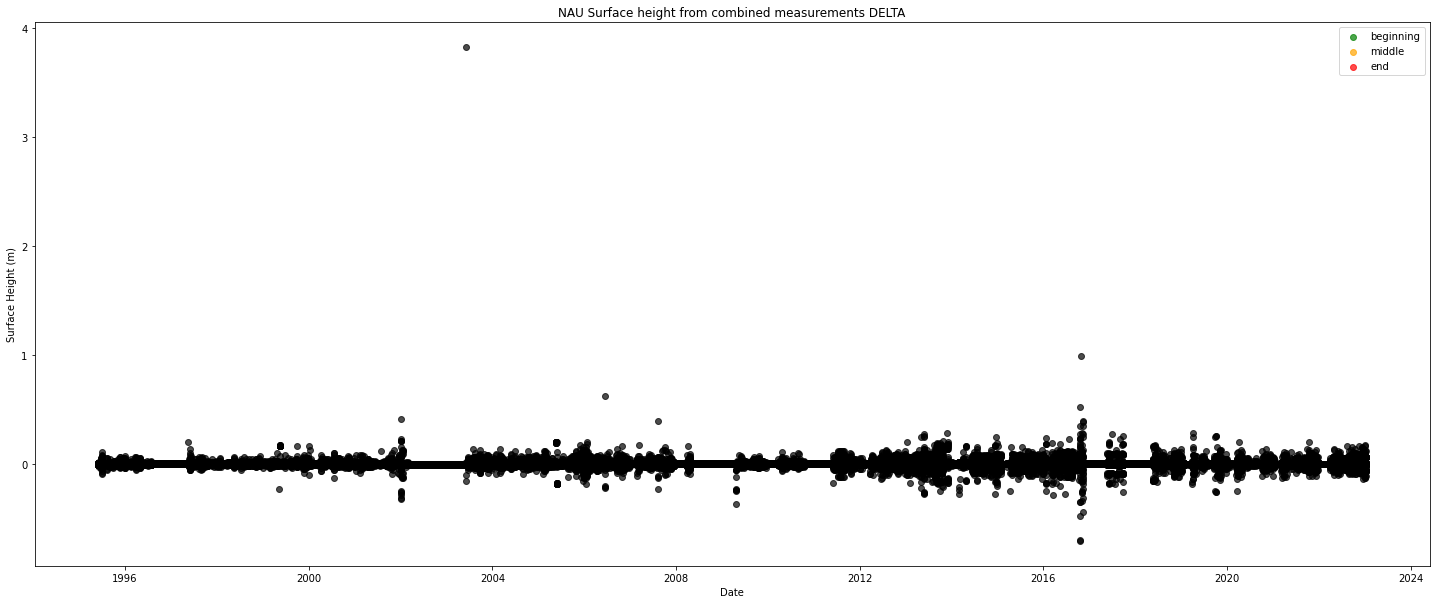

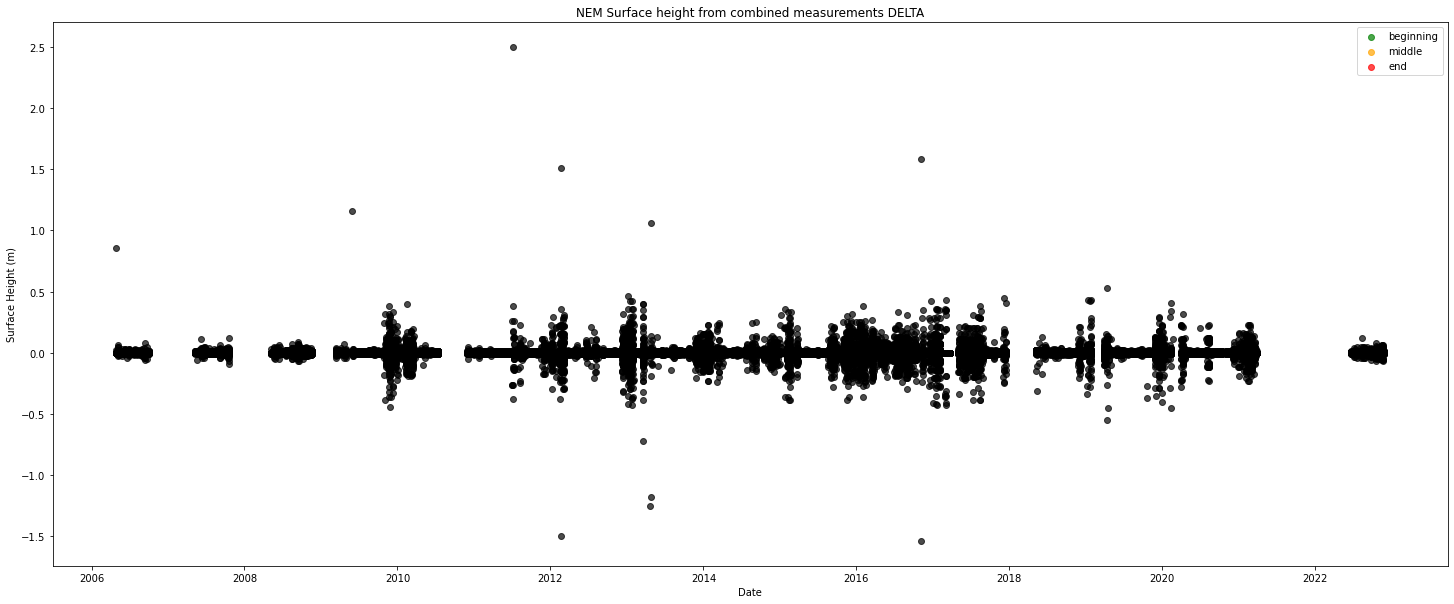

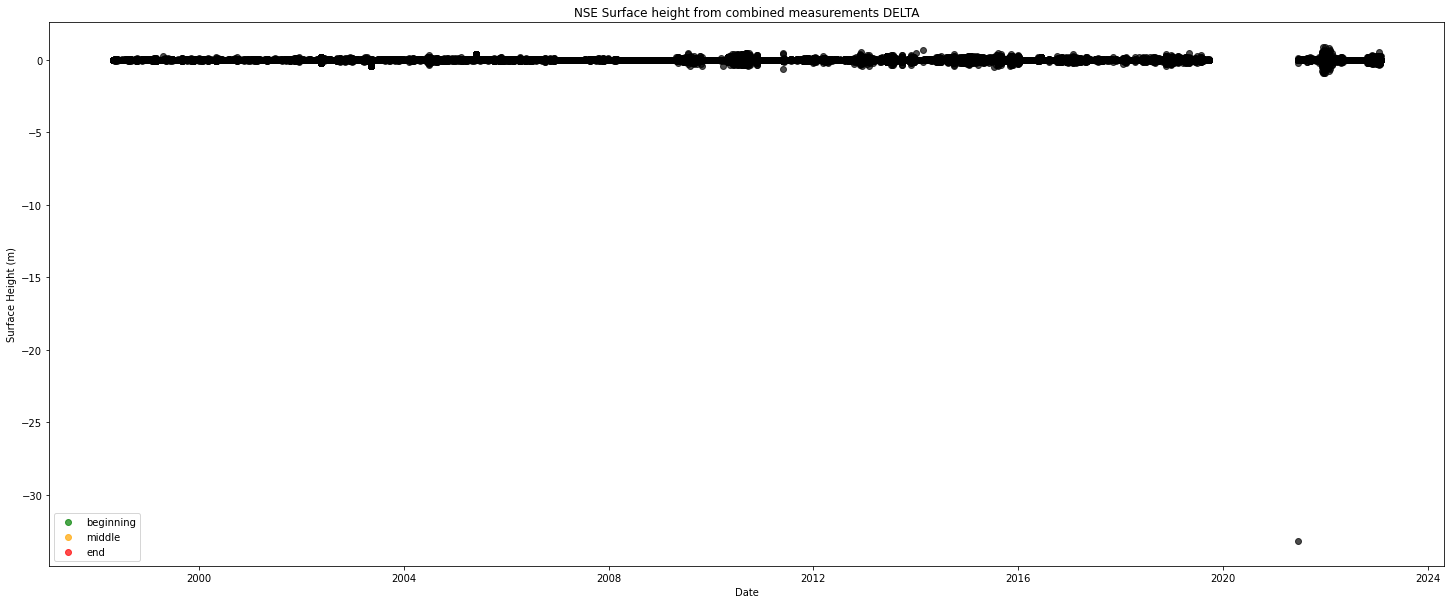

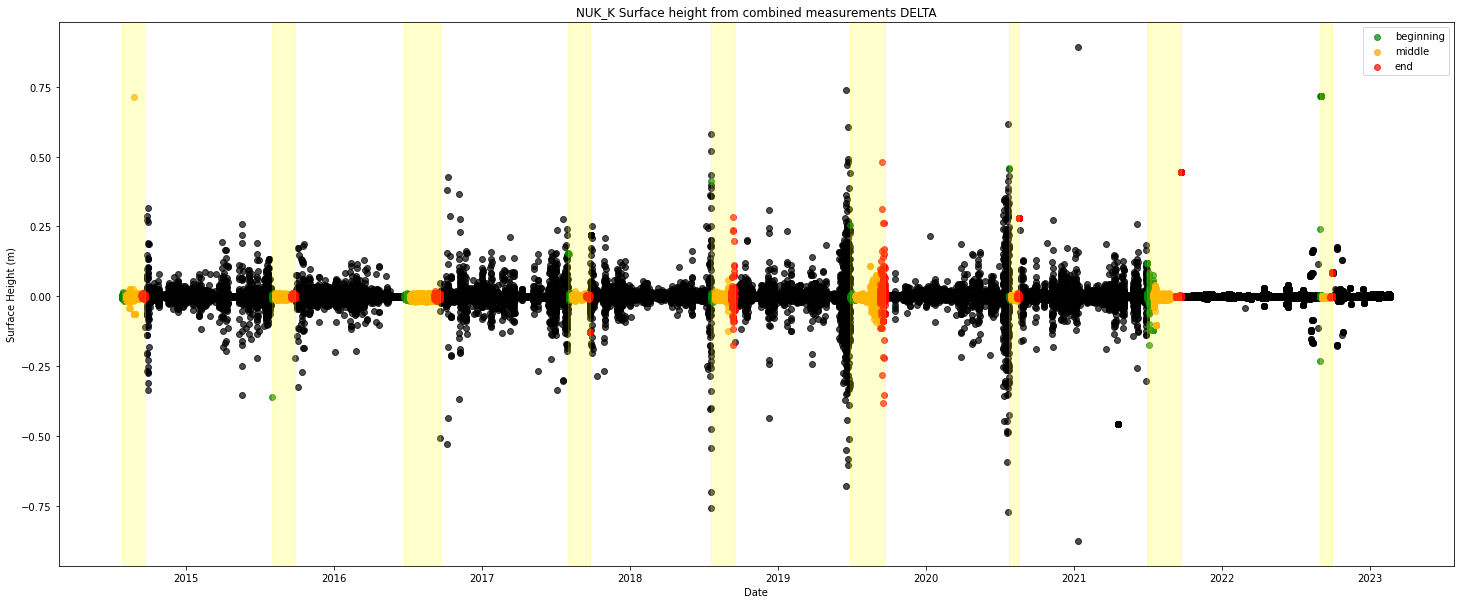

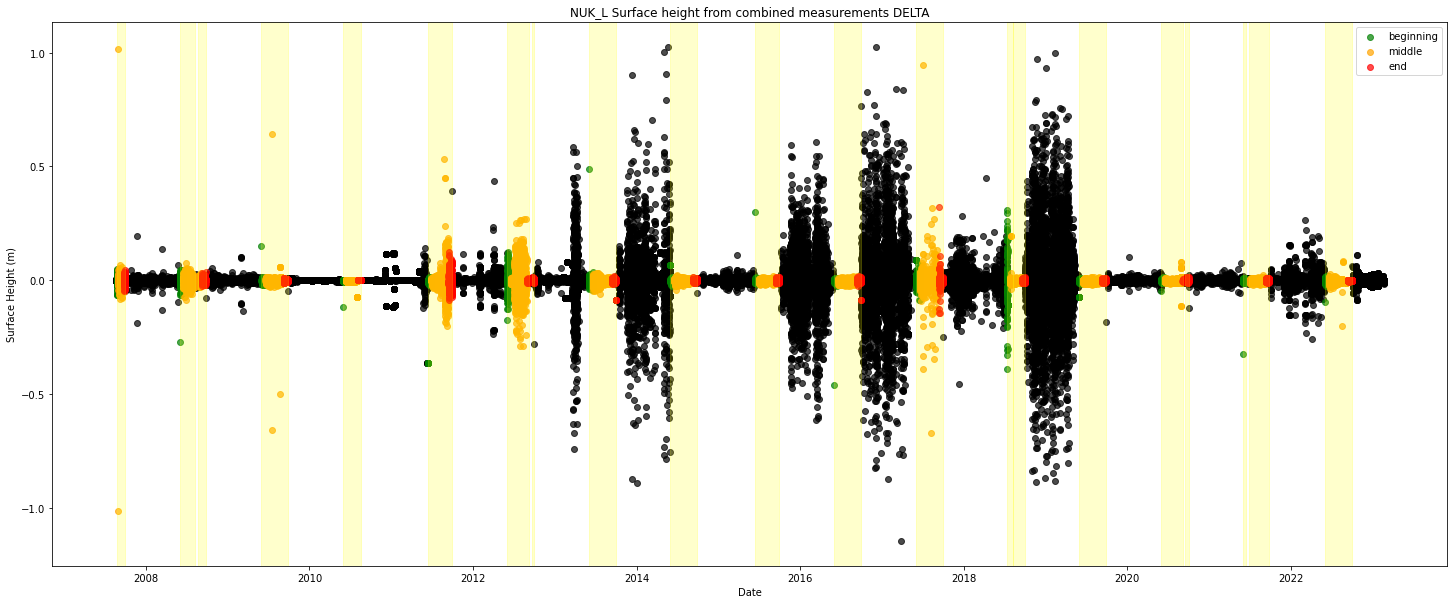

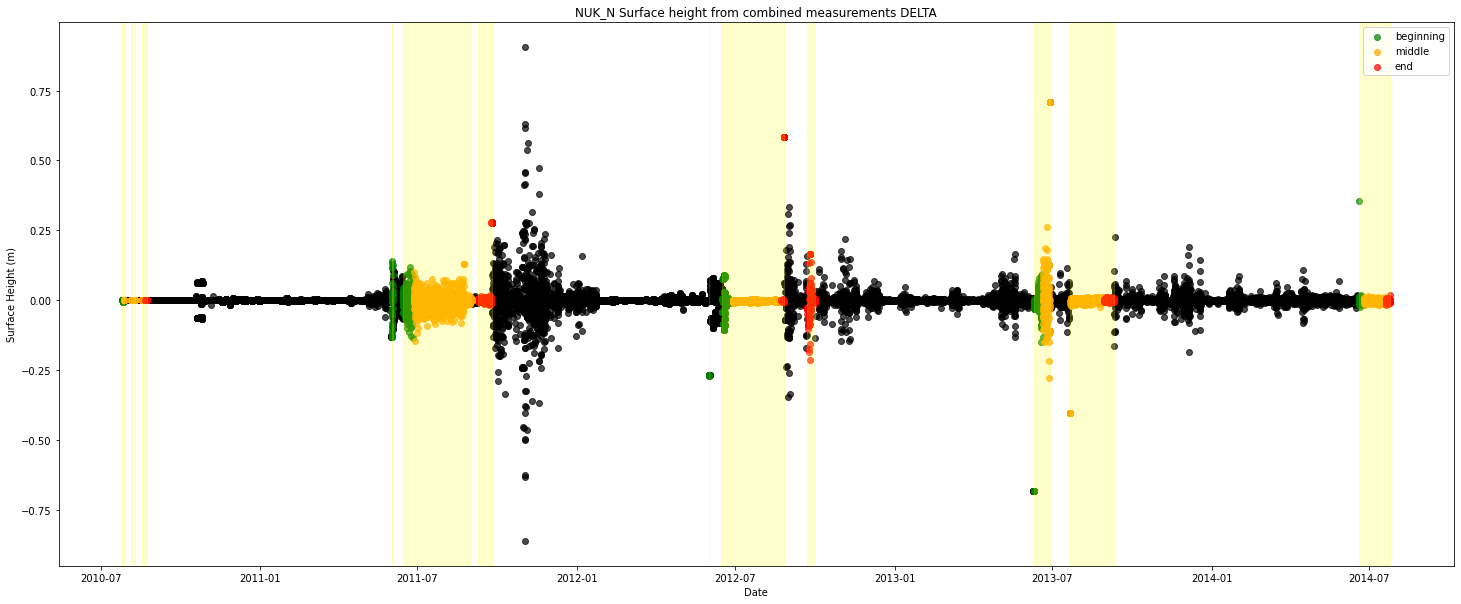

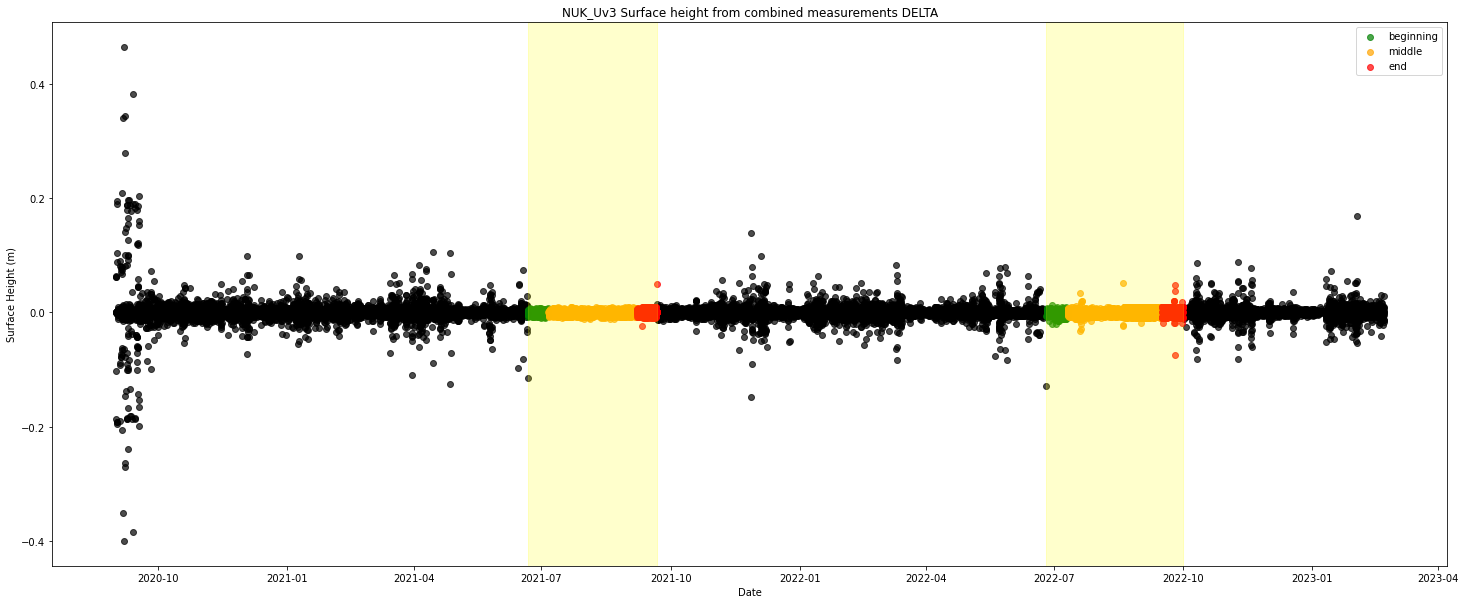

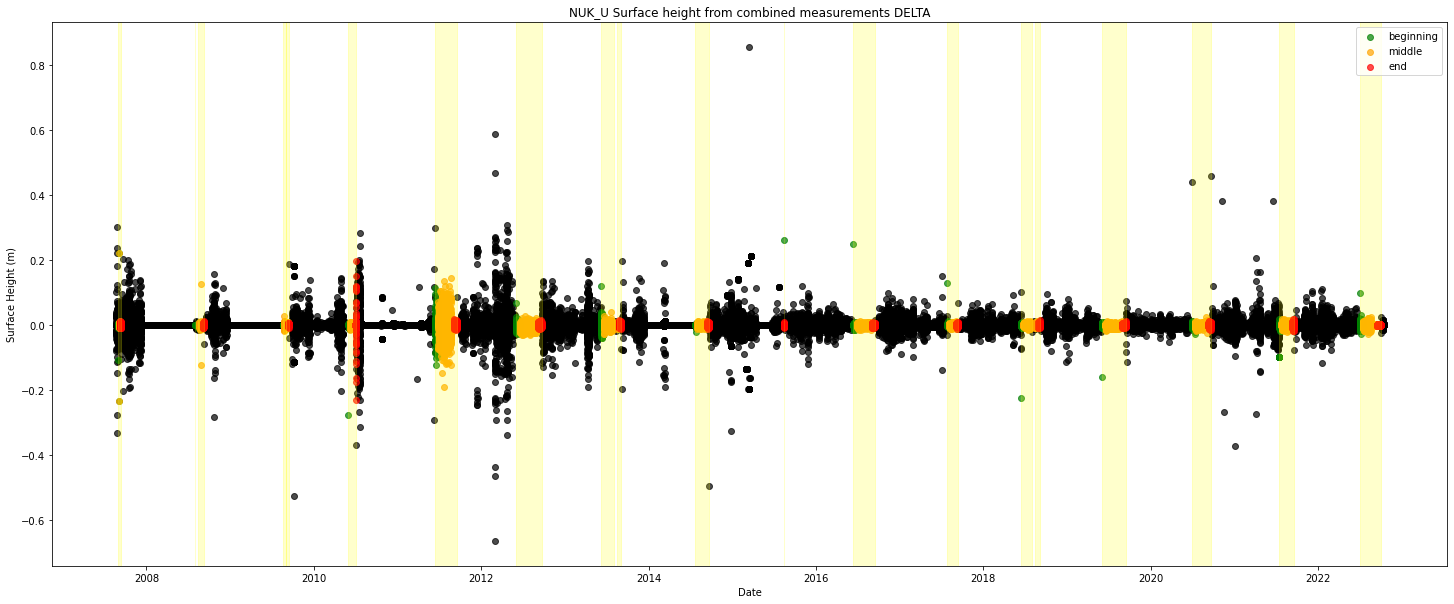

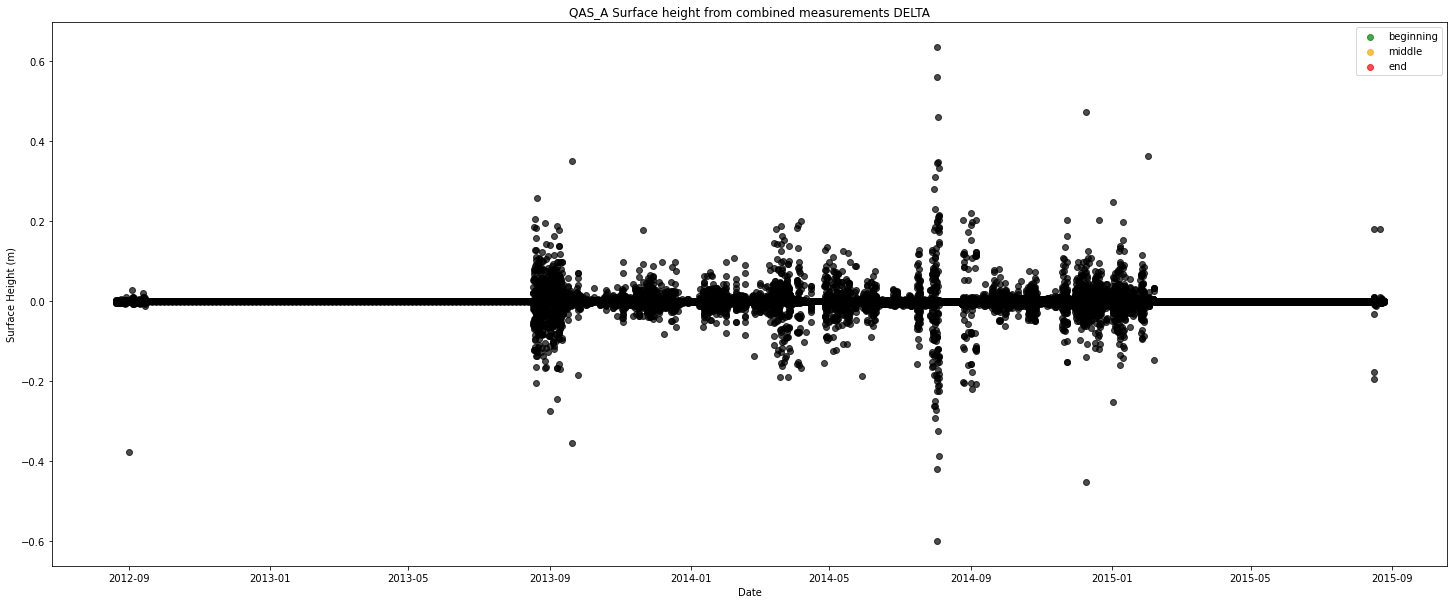

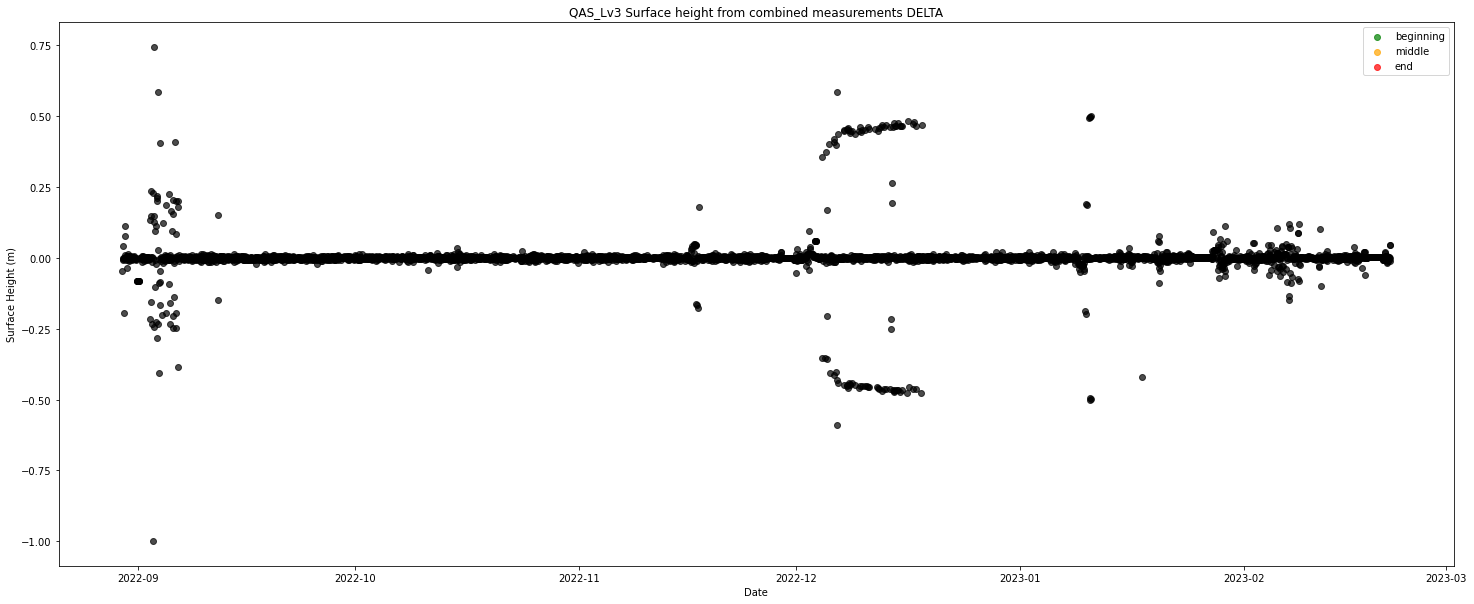

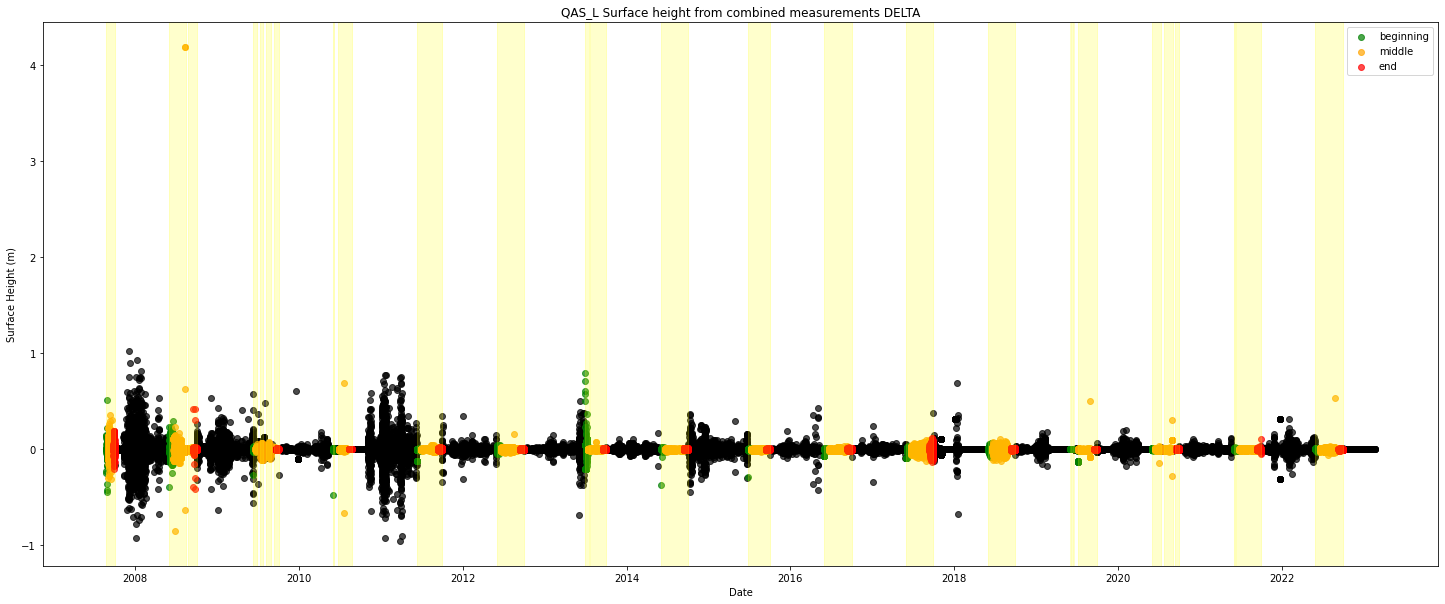

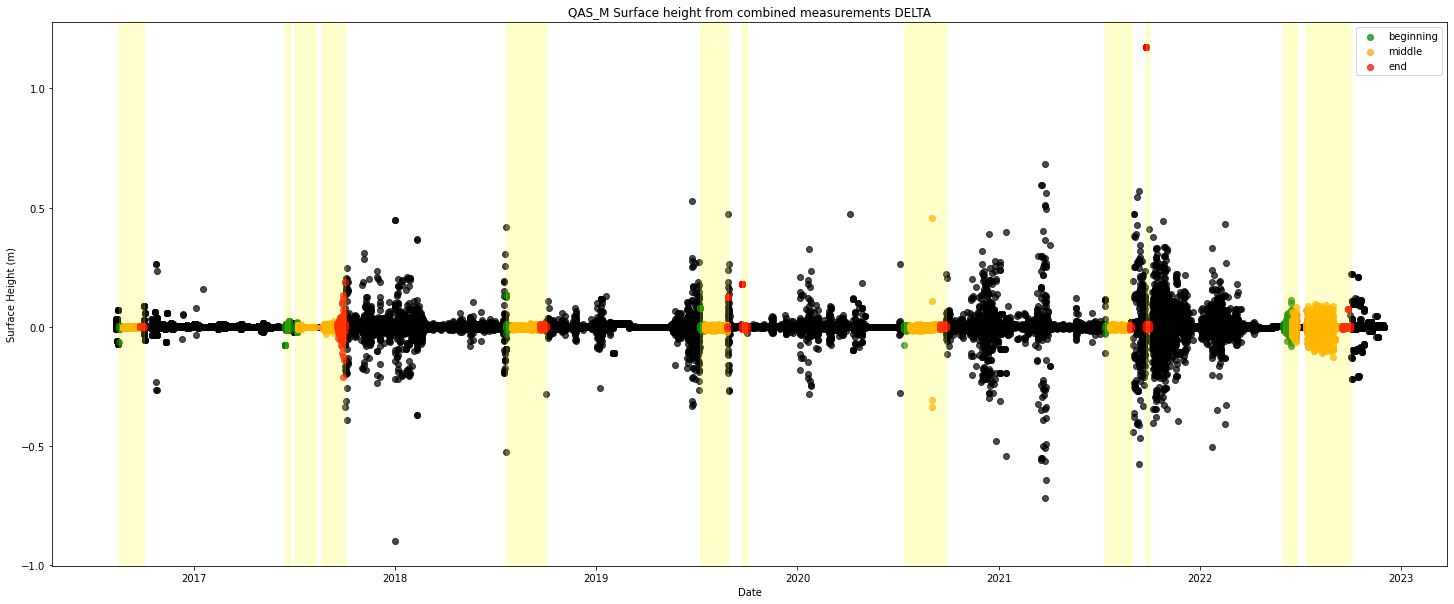

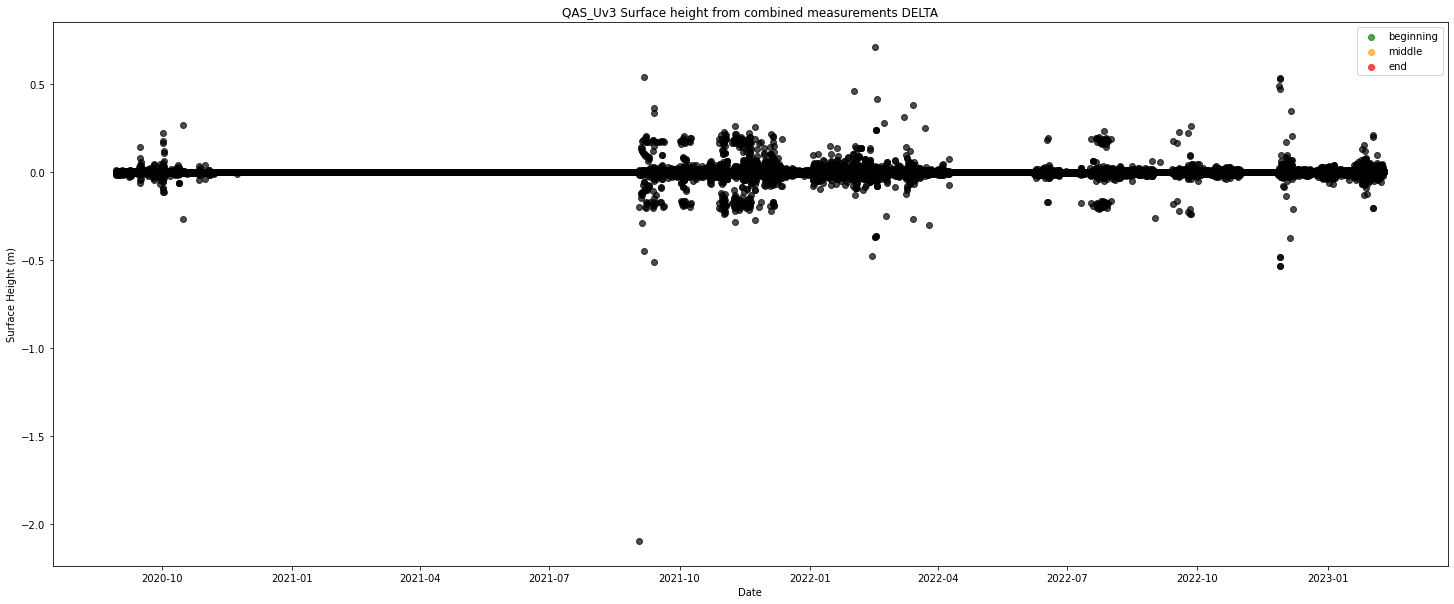

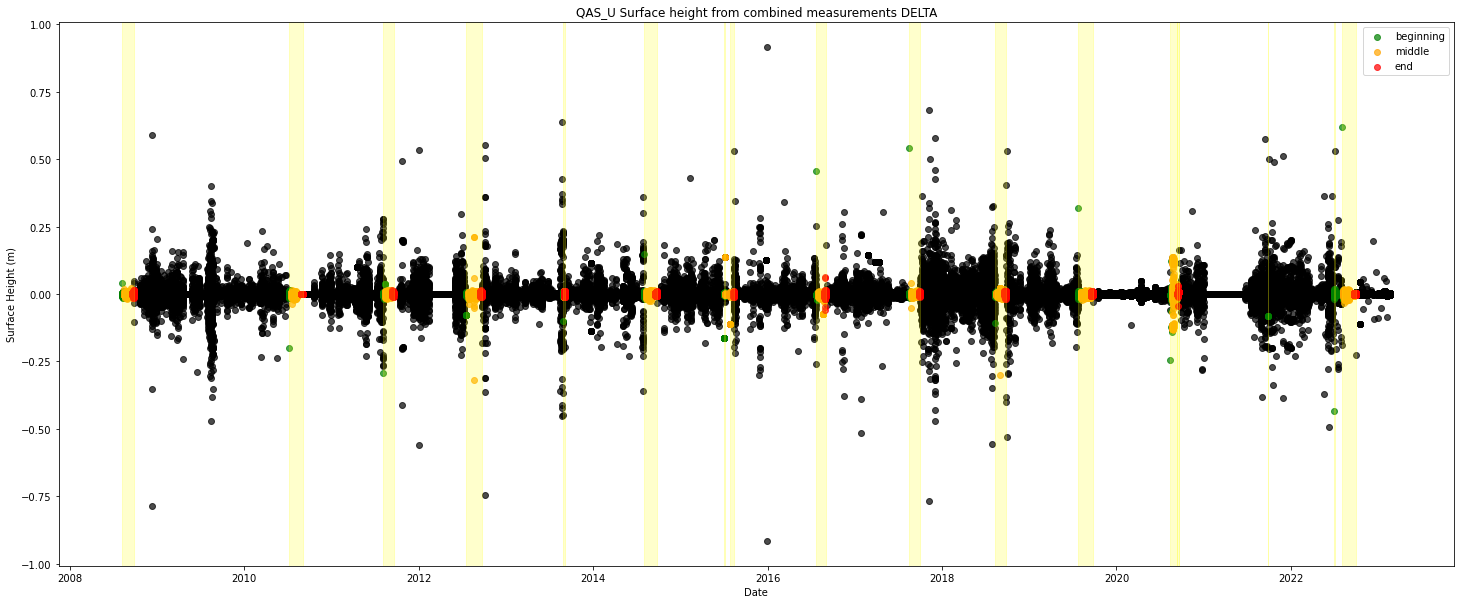

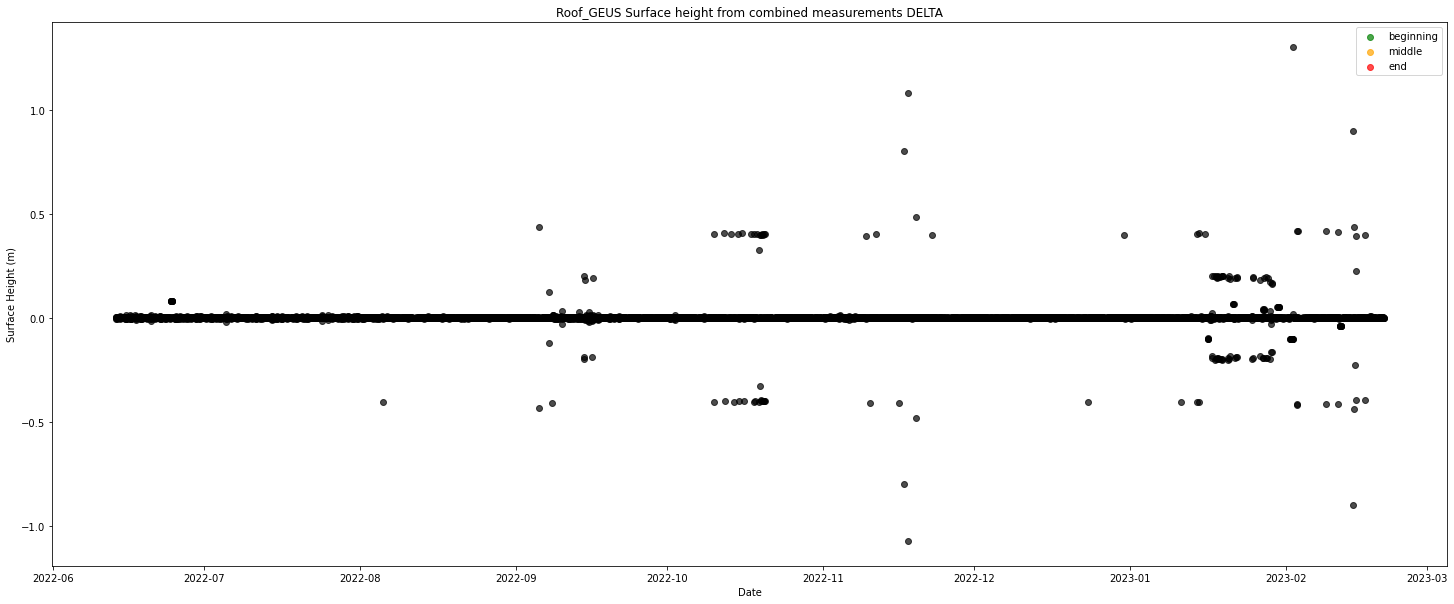

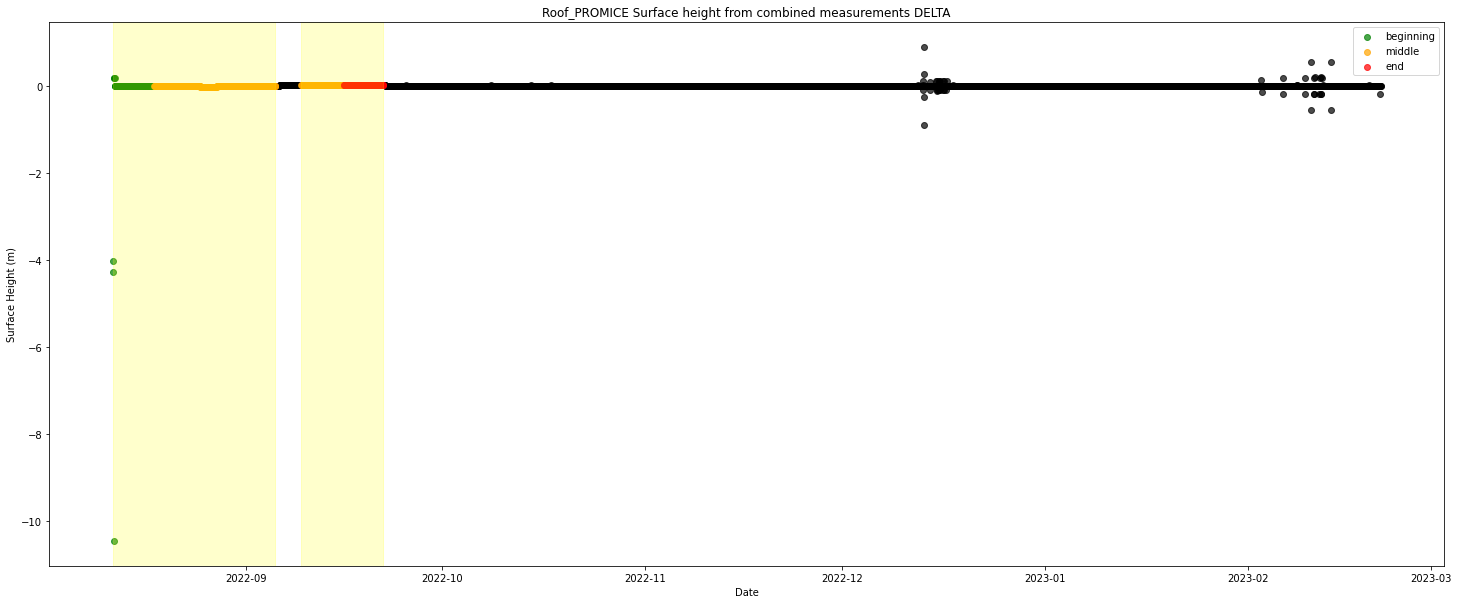

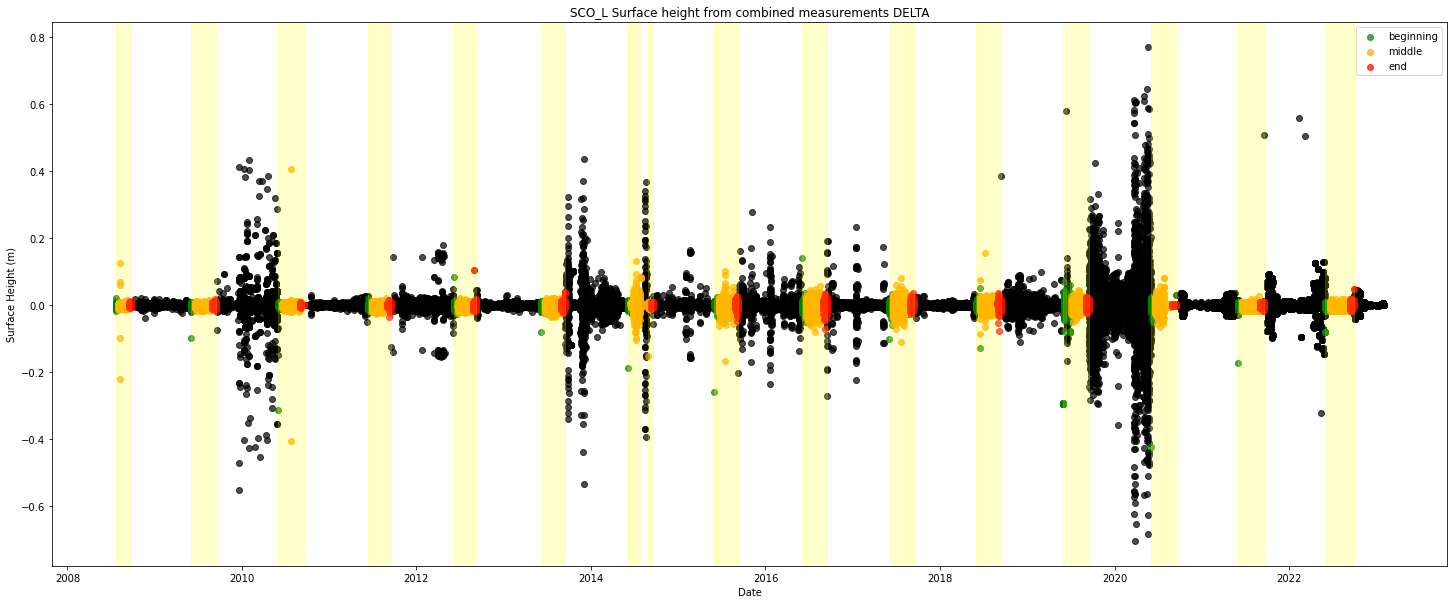

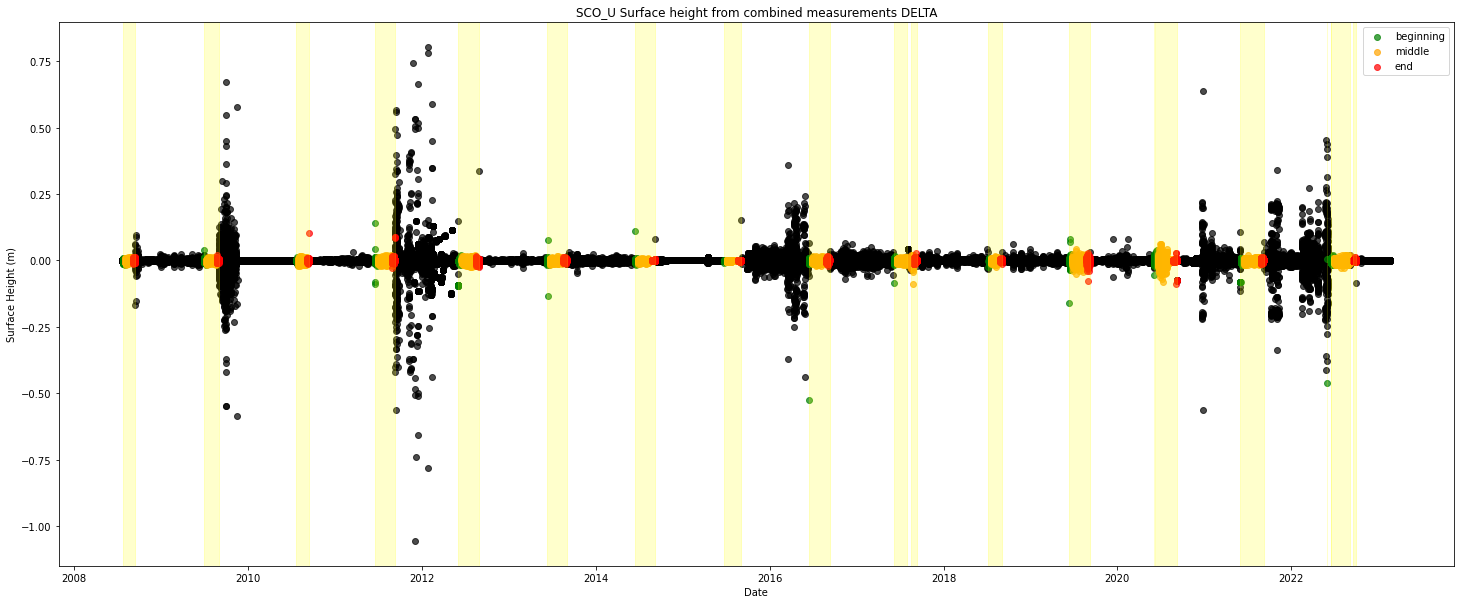

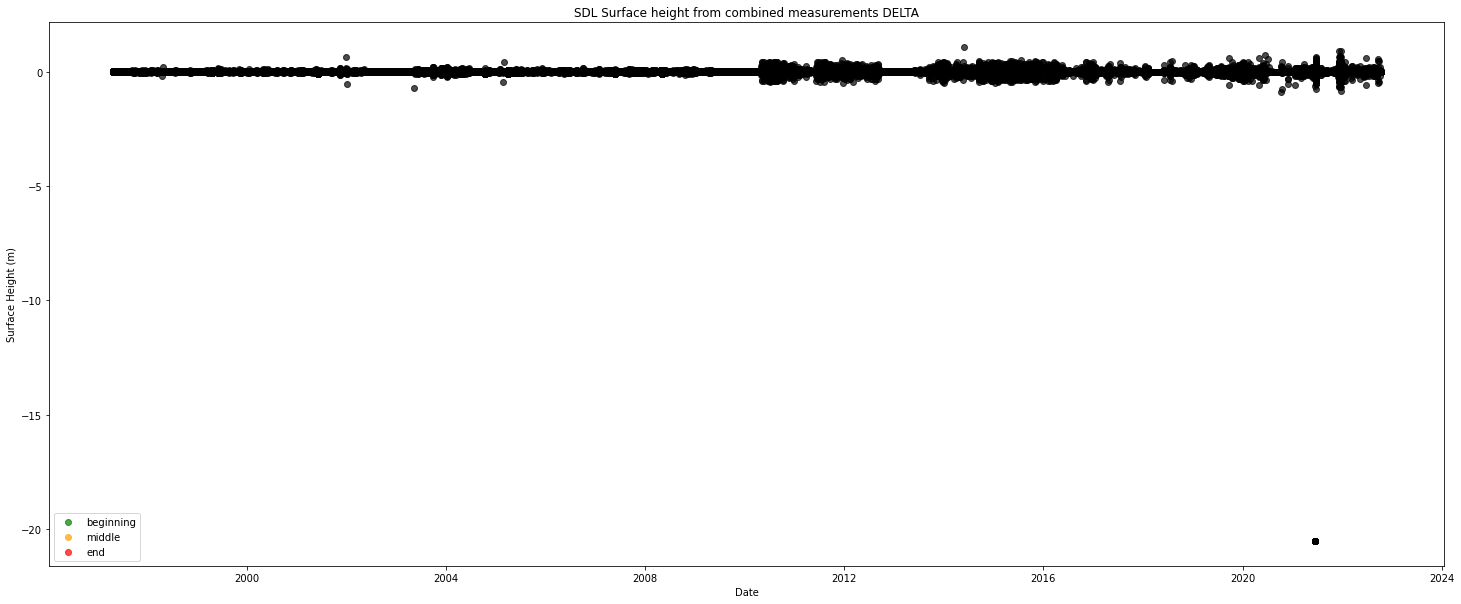

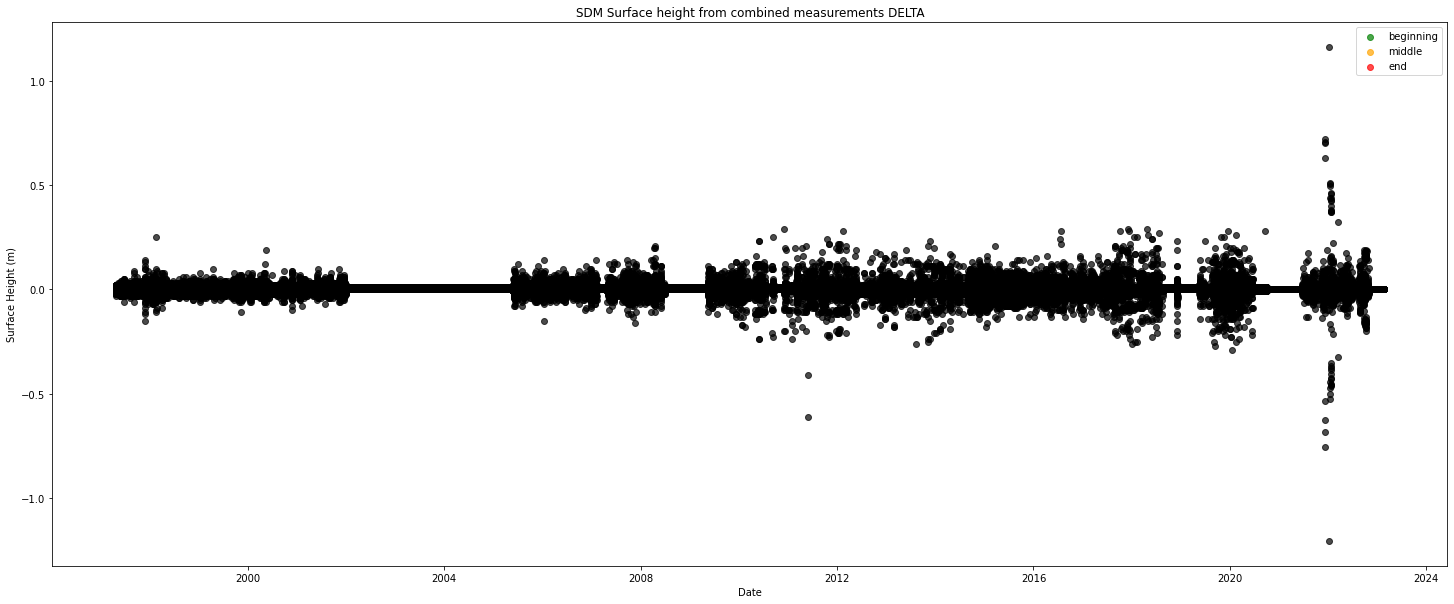

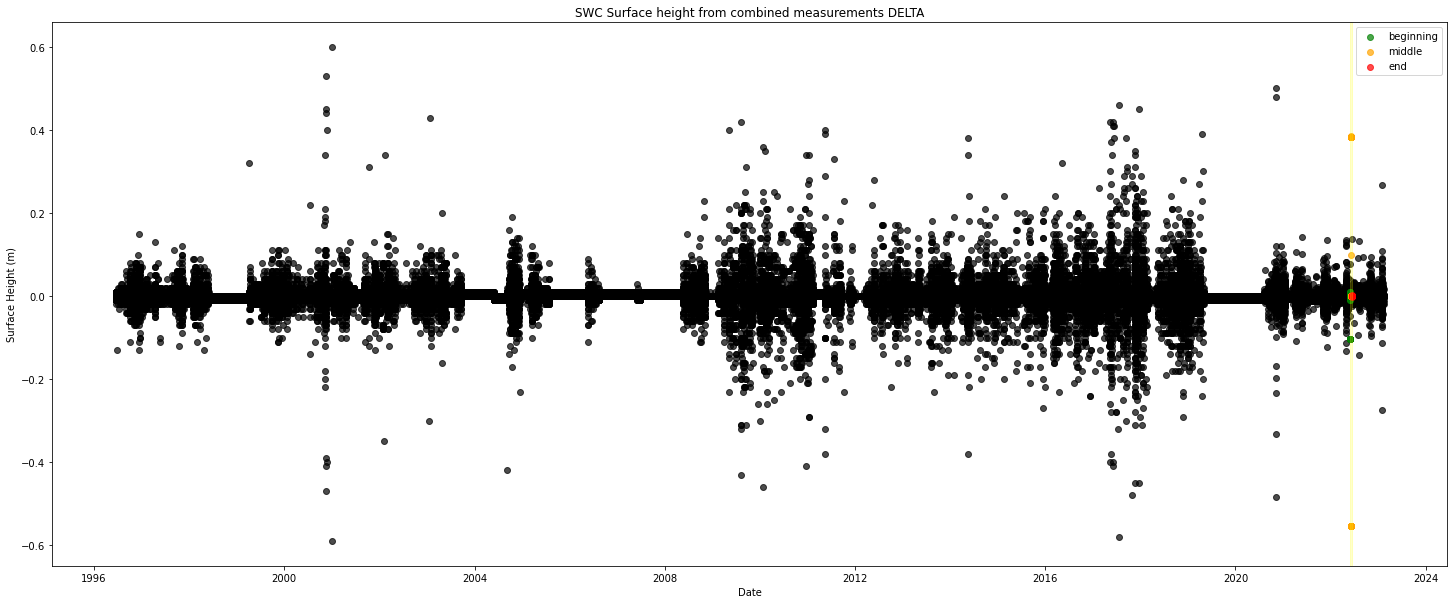

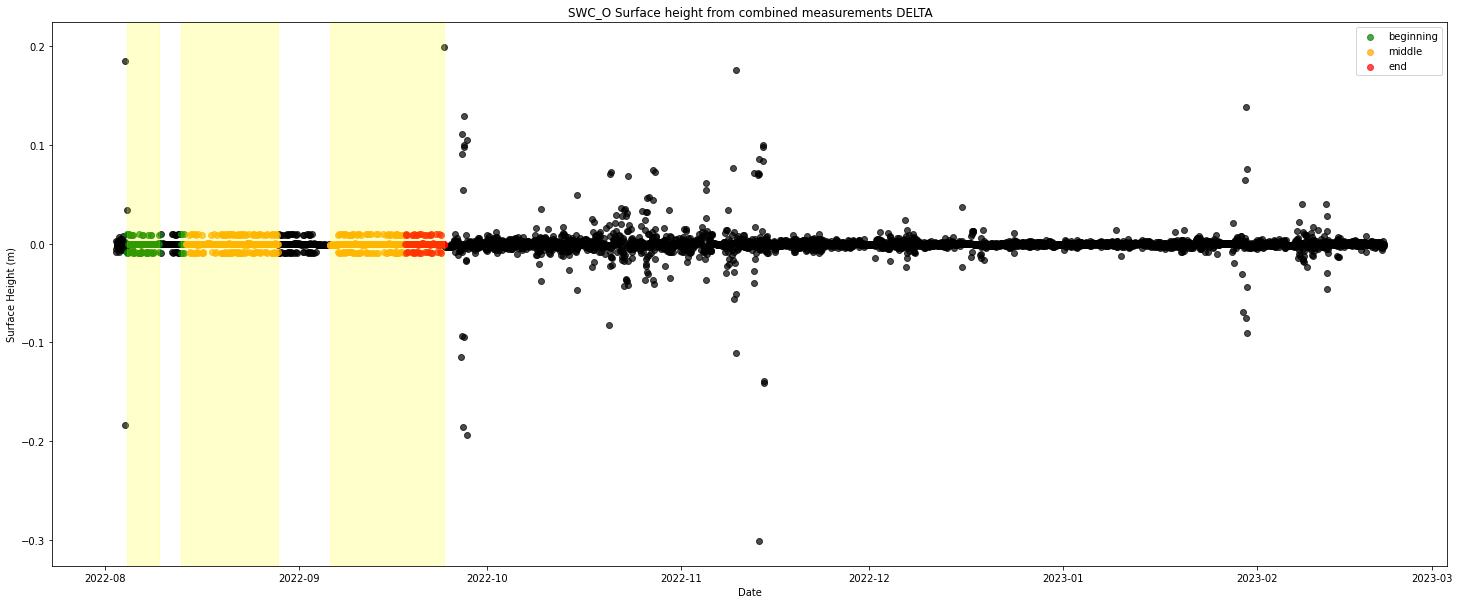

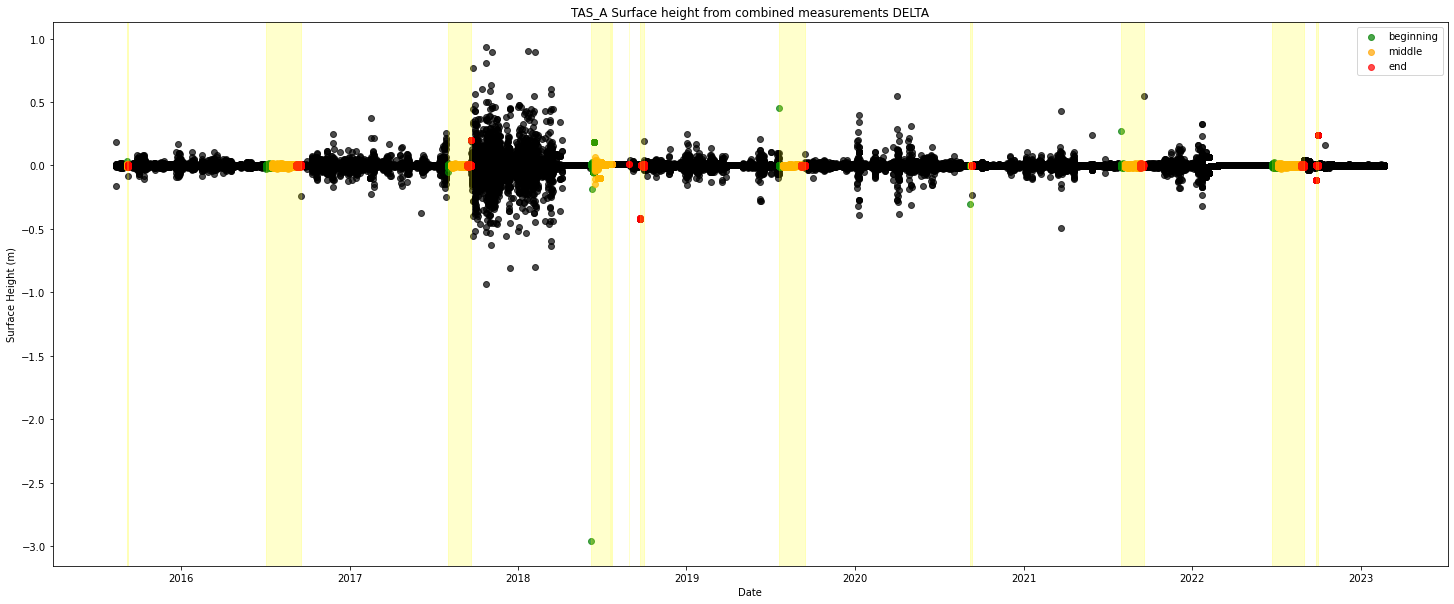

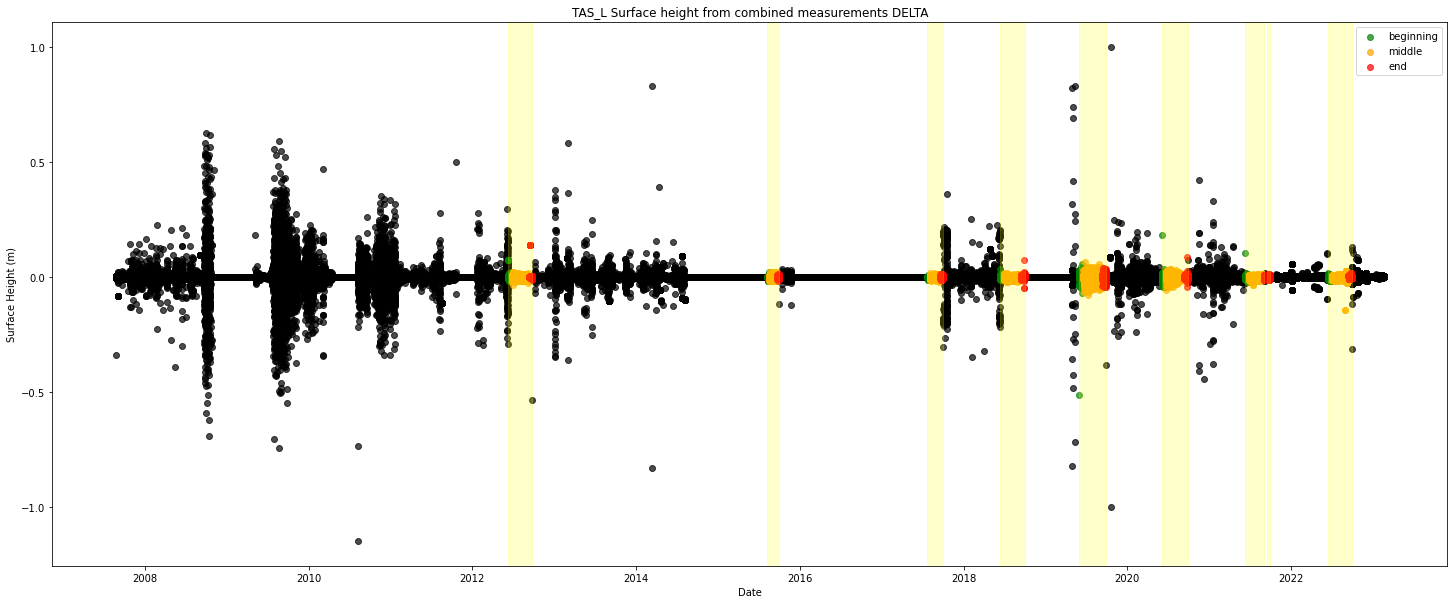

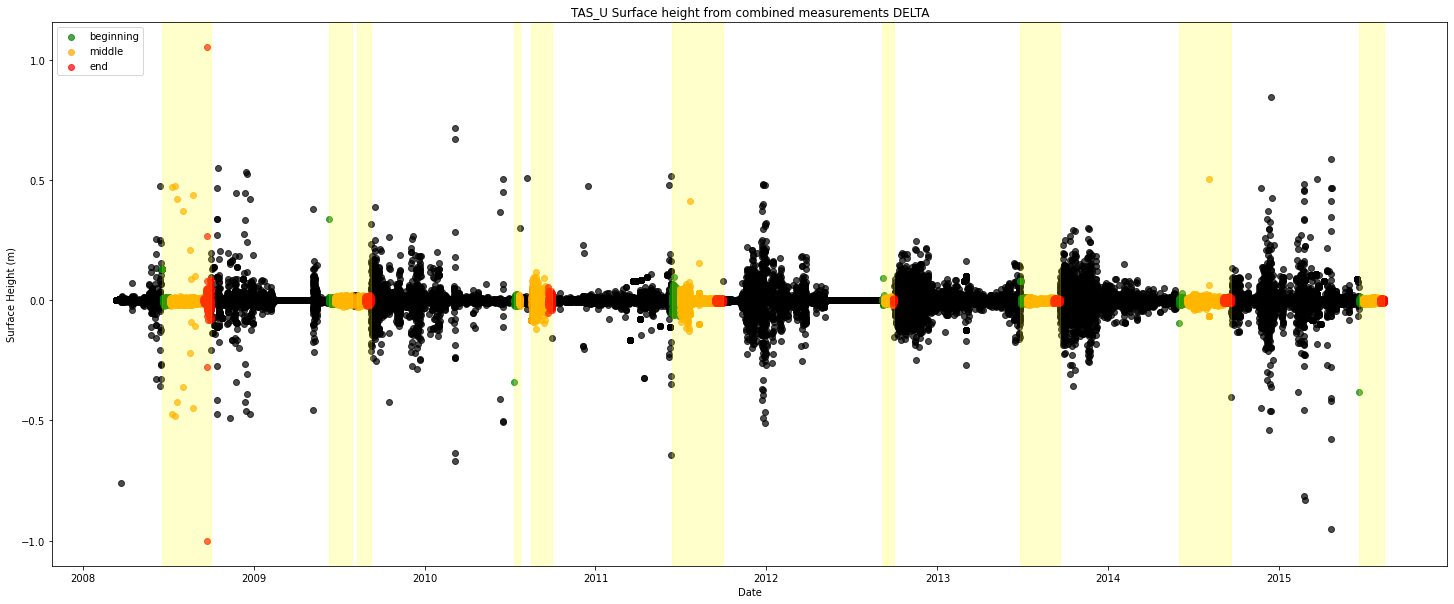

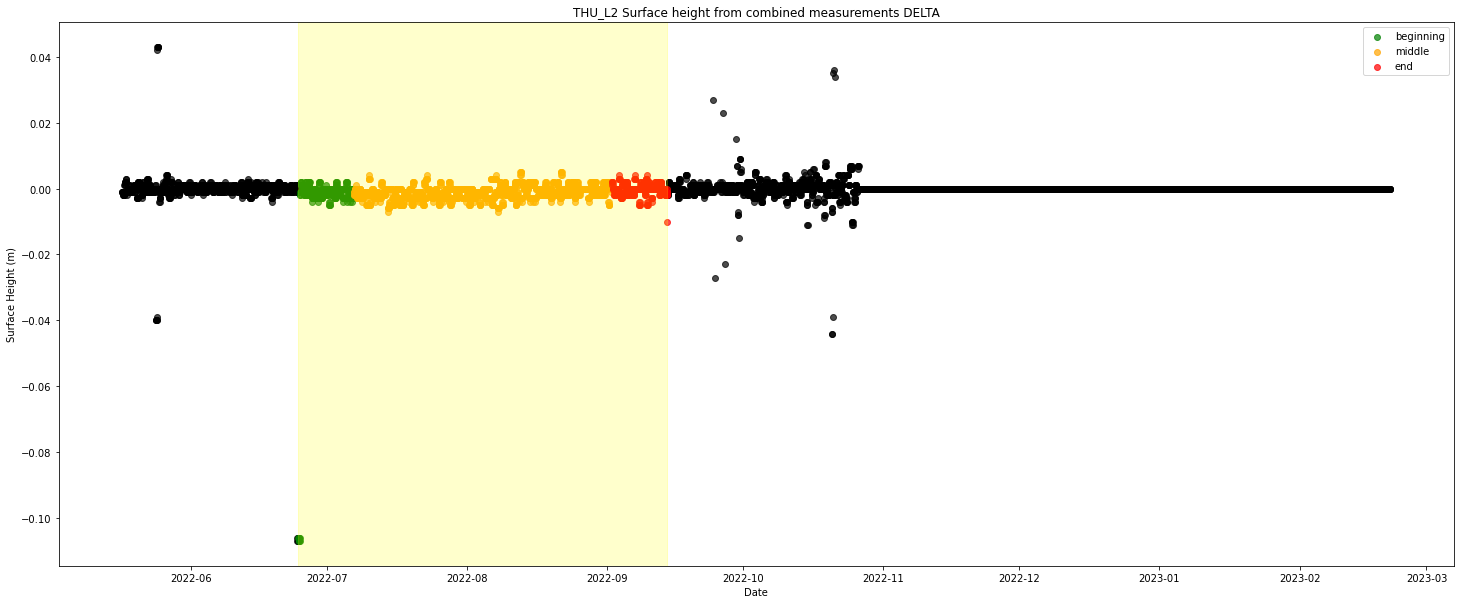

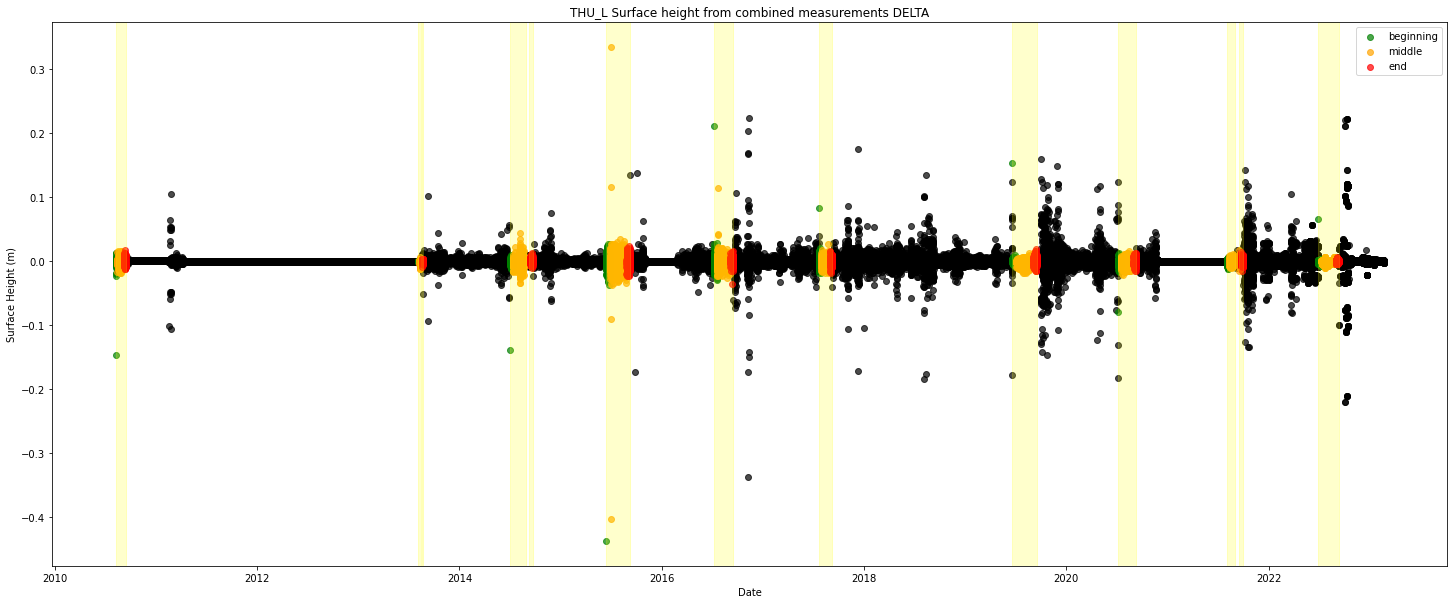

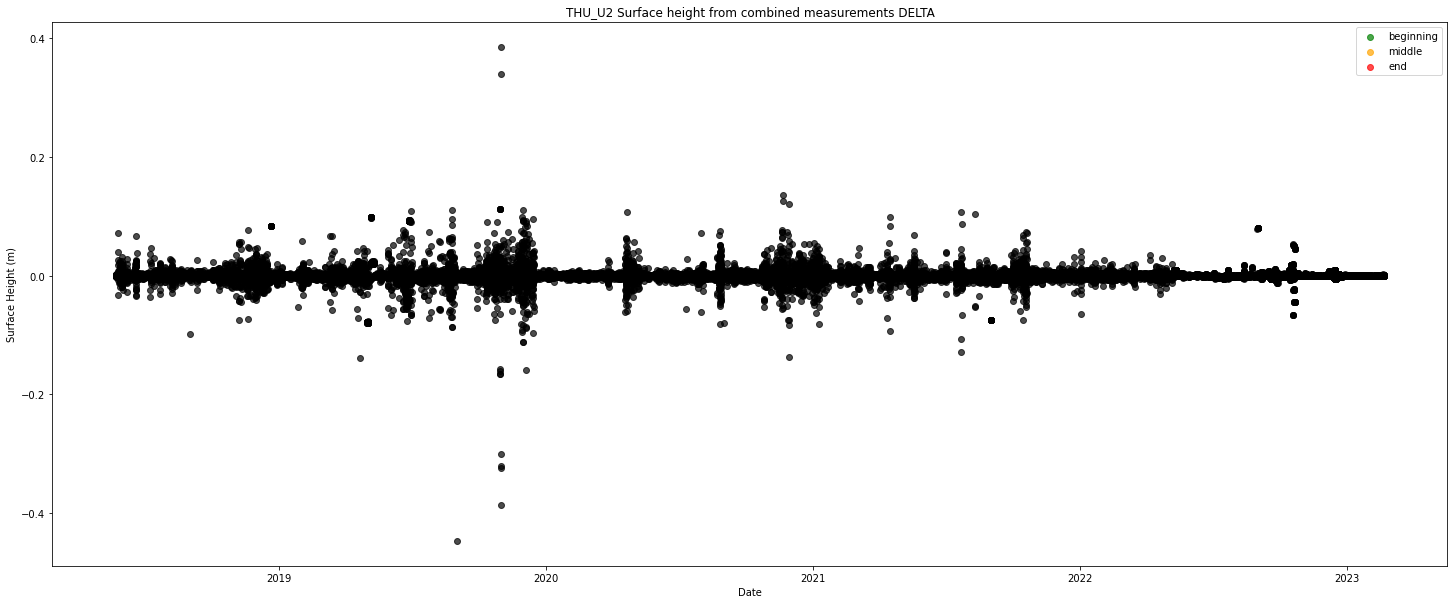

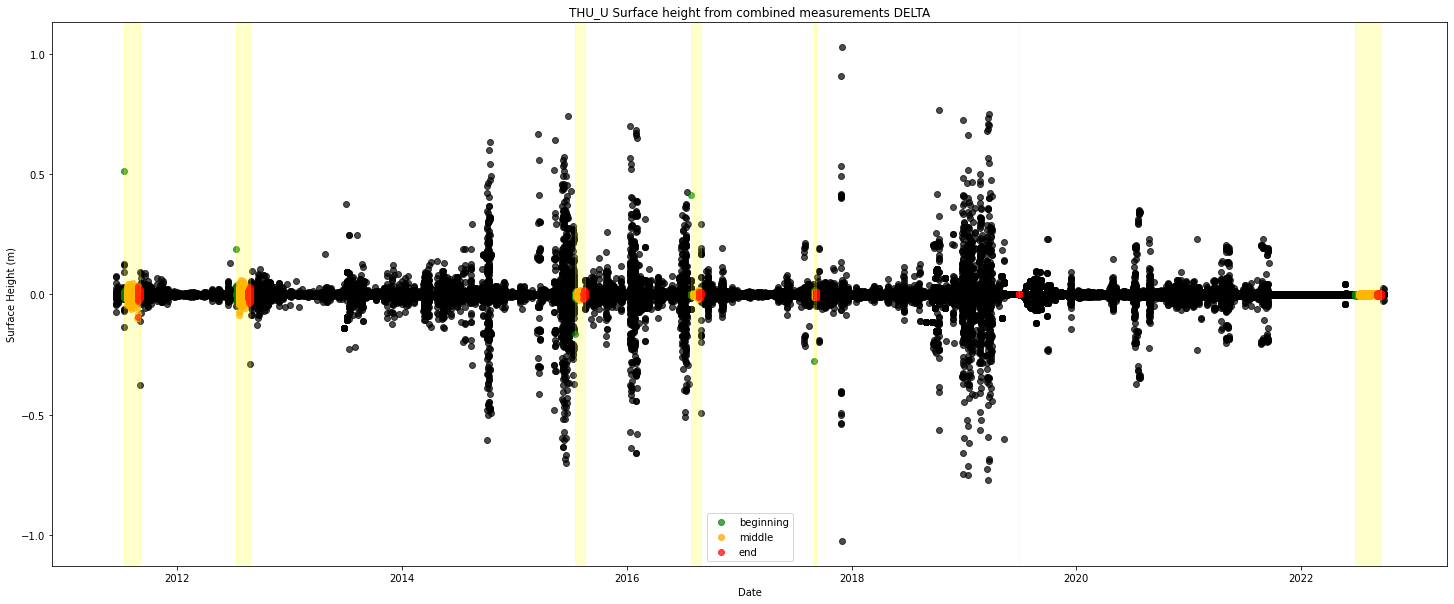

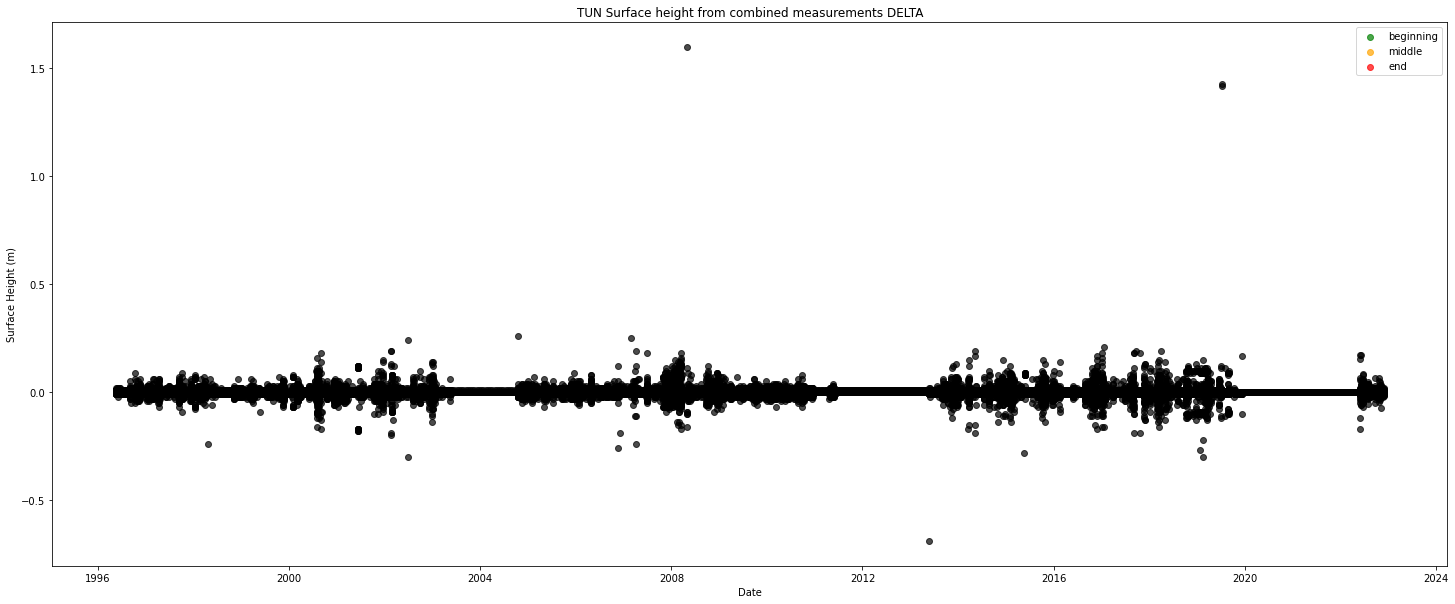

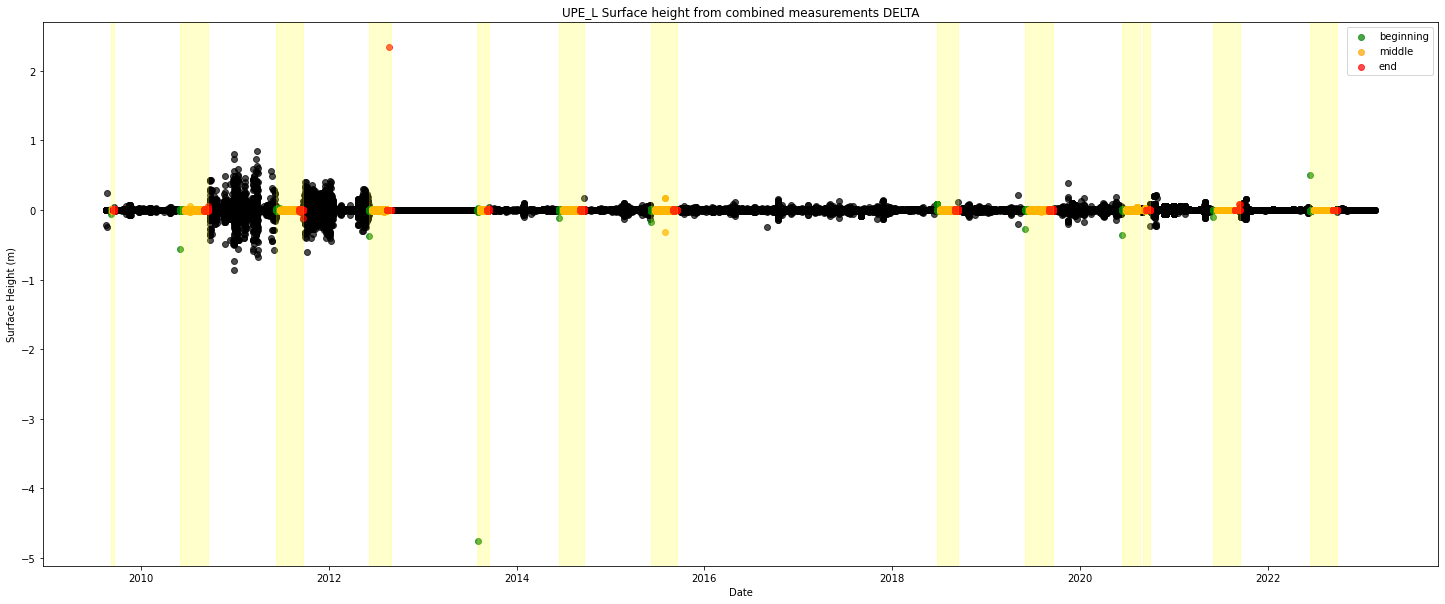

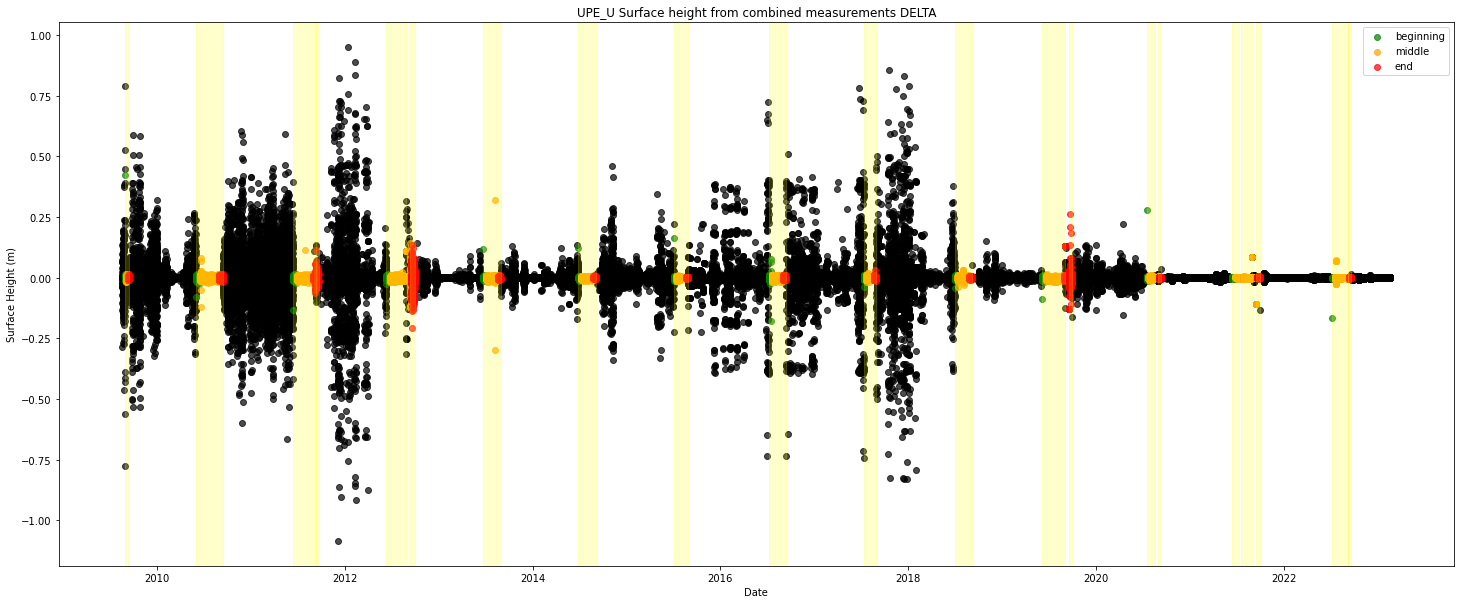

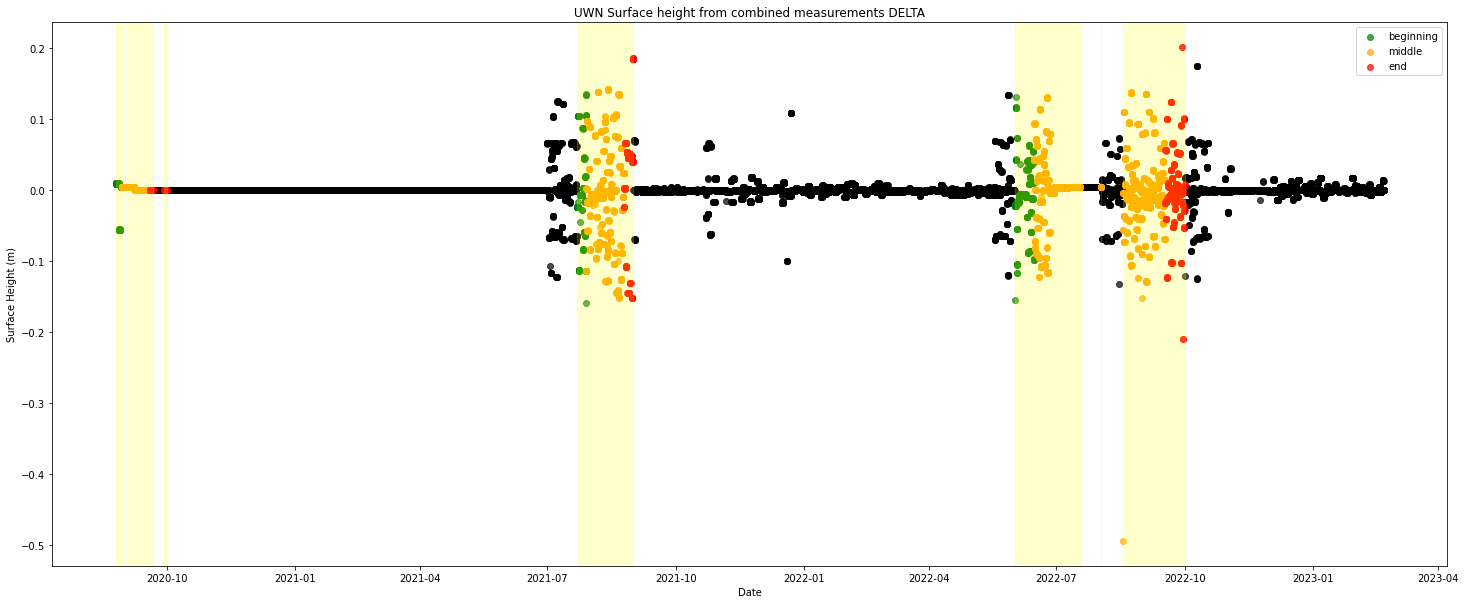

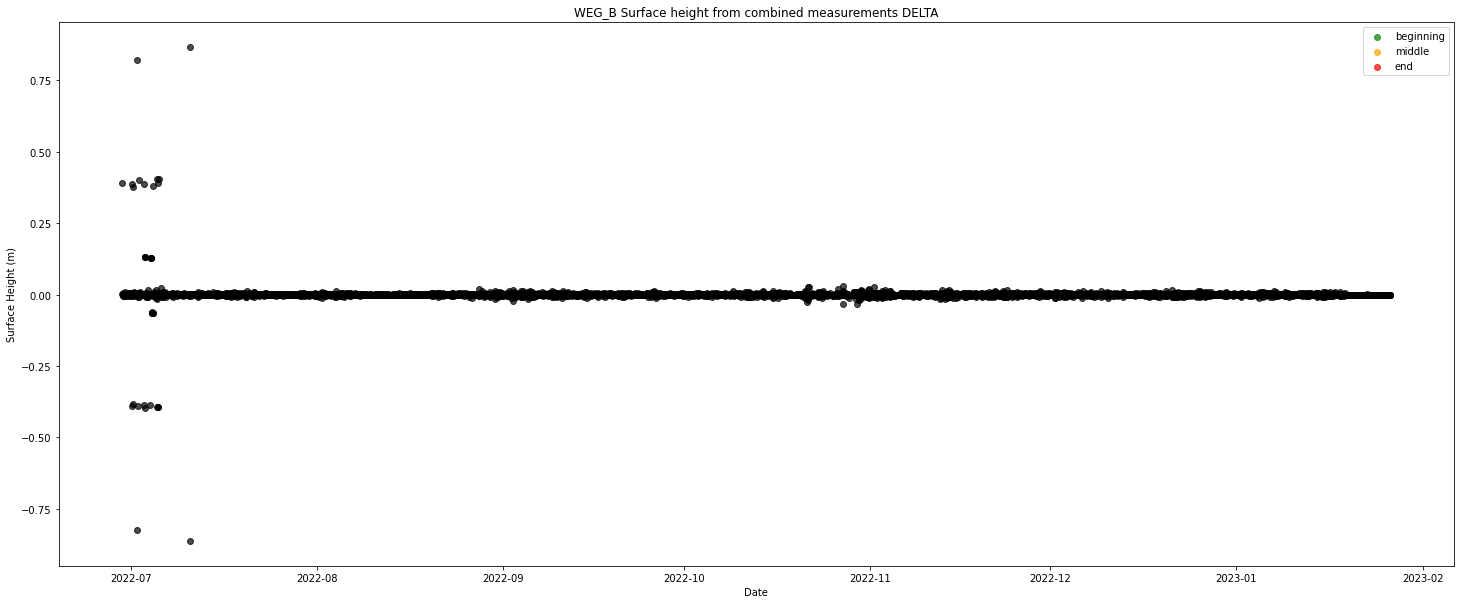

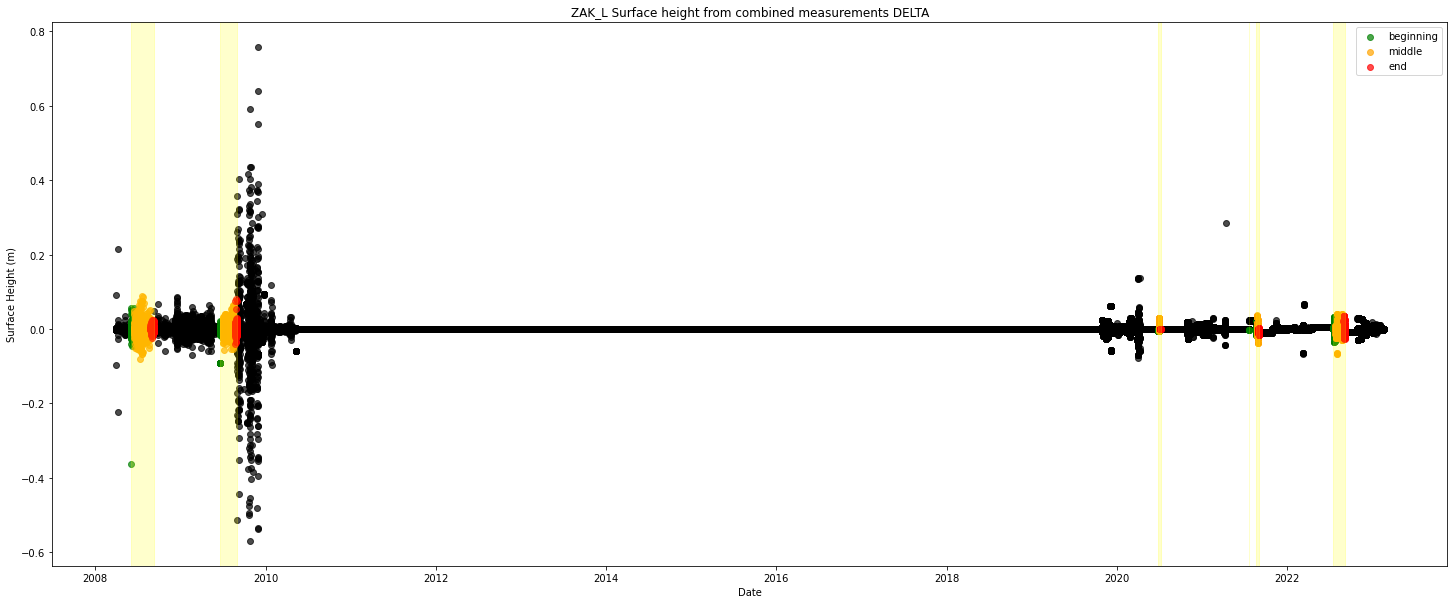

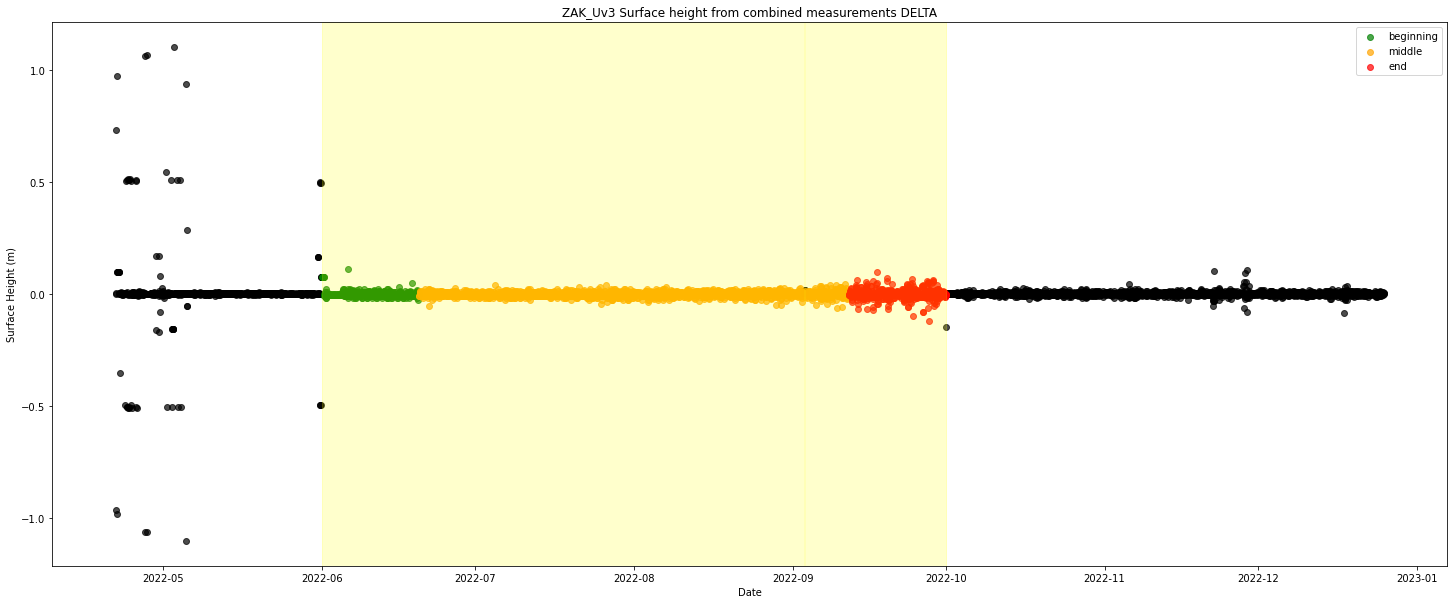

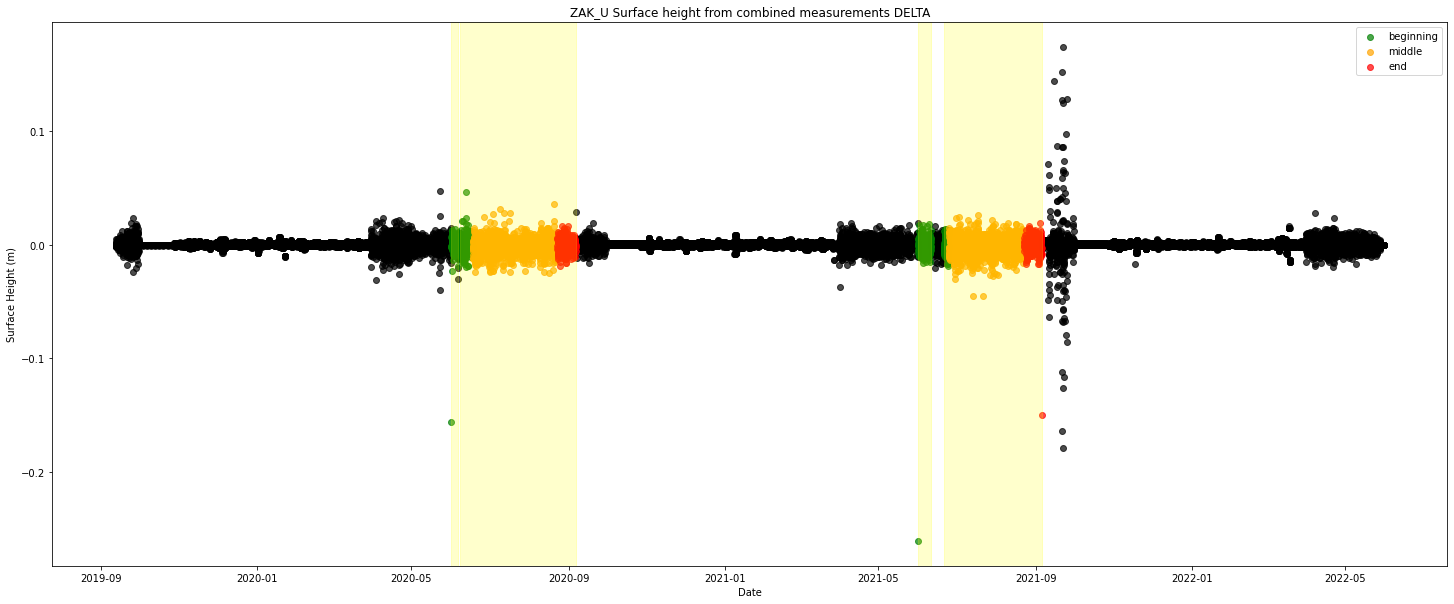

In [31]:
station = df["stid"].unique().tolist()

for i in station:
    plt_srf_height(Station = i, input_df = df, y = df['Surface height from combined measurements DELTA']) 